In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from gensim.models.word2vec import Word2Vec

In this section, you can decide which model for which corpus you want to use for your analysis. Here by default, it's the Academy corpus within the years 1720-2000. We tested over 10-year slides, it's clearly much less effective due to the small size of the French corpora.
After the load, put the path to your directory of models, and then select your range in "year in range".
This corpus seems much too small to be reliable however.

In [3]:
from collections import OrderedDict

models = OrderedDict([
    (year, Word2Vec.load('/home/odysseus/Téléchargements/hist-vec-master/acad/LemCorpAcad_models/{}.bin'.format(year)))
    for year in range(1720, 2000, 20)
])

In [4]:
def cosine_series(anchor, query):
    
    series = OrderedDict()
    
    for year, model in models.items():
        
        series[year] = (
            model.similarity(anchor, query)
            if query in model else 0
        )

    return series

In [5]:
import numpy as np
import statsmodels.api as sm

def lin_reg(series):

    x = np.array(list(series.keys()))
    y = np.array(list(series.values()))

    x = sm.add_constant(x)

    return sm.OLS(y, x).fit()

In [6]:
def plot_cosine_series(anchor, query, w=8, h=4):
    
    series = cosine_series(anchor, query)
    
    fit = lin_reg(series)

    x1 = list(series.keys())[0]
    x2 = list(series.keys())[-1]

    y1 = fit.predict()[0]
    y2 = fit.predict()[-1]
    
    print(query)
    
    plt.figure(figsize=(w, h))
    plt.ylim(0, 1)
    plt.title(query)
    plt.xlabel('Year')
    plt.ylabel('Similarity')
    plt.plot(list(series.keys()), list(series.values()))
    plt.plot([x1, x2], [y1, y2], color='gray', linewidth=0.5)
    plt.show()

# Similarity of a list of key terms to "littérature"

The cell below (which calls the methods above), shows how two words differ from one another <b>through time</b>, with <b>cosine</b> similarity. Here, we show how a list of selected concepts evolves compared to "littérature". You can manually change both below.

science


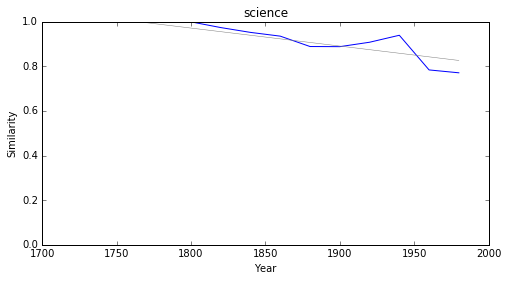

savoir


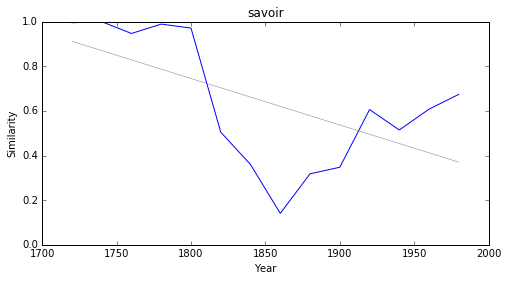

histoire


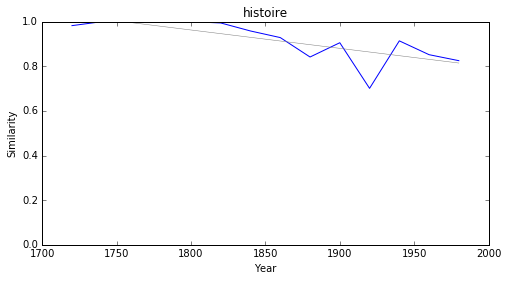

lettre


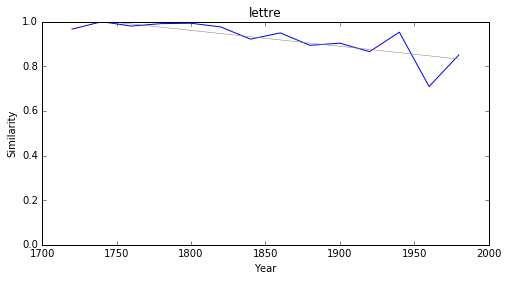

critique


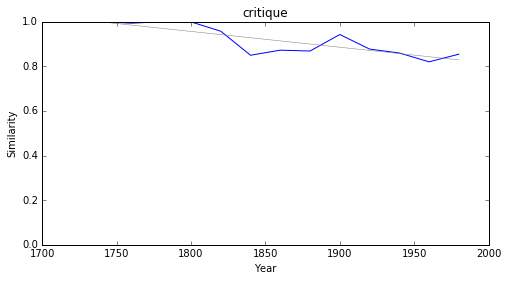

esprit


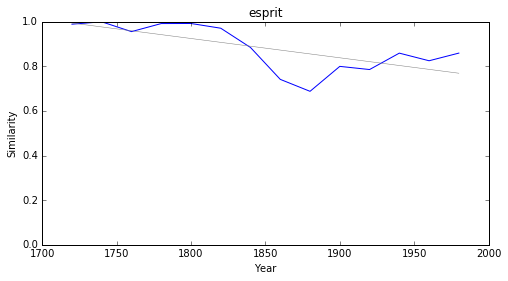

langue


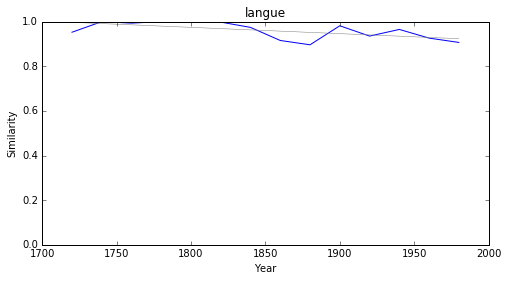

politique


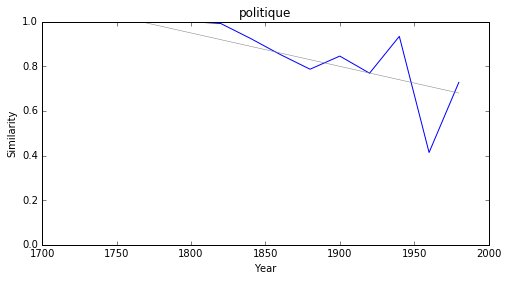

pouvoir


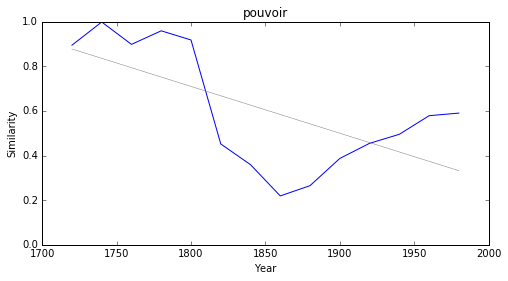

droit


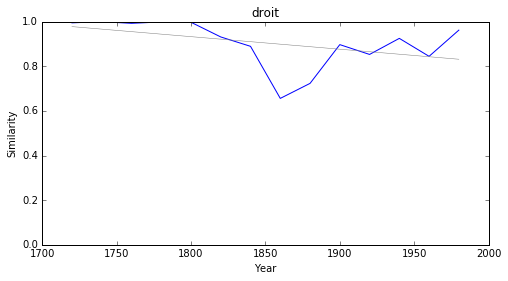

loi


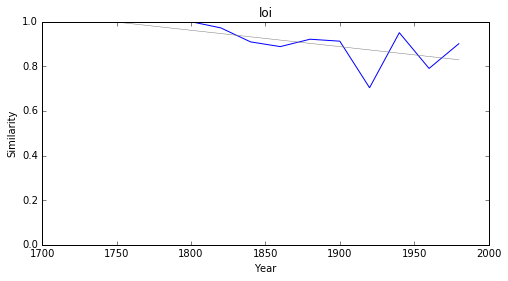

génie


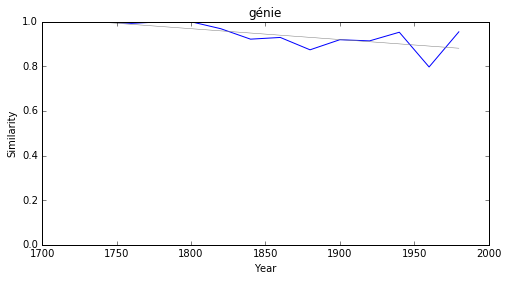

In [7]:
testList = ('littérature', 'science', 'savoir', 'histoire', 'lettre', 'critique', 'esprit', 'langue', 'politique', 
            'pouvoir', 'droit', 'loi', 'génie')

for idx, val in enumerate(testList):
    if idx>0:
        plot_cosine_series('littérature', val)

The two next cells get the 200 most similar terms to a specific term, from the training models, here "littérature".

In [8]:
def union_neighbor_vocab(anchor, topn=200):
    
    vocab = set()
    
    for year, model in models.items():
        similar = model.most_similar(anchor, topn=topn)
        vocab.update([s[0] for s in similar])
        
    return vocab

At this point, we'll do the same thing as above, and calculate, for each token in the 200 nearest terms to the main entry, the <b>proximity</b> of this term and its <b>significance</b>. The significance is calculated with the p value, that is to say that, below a certain threshold (0.05) we have a strong likelyhood that the result is sure and significant.

In [9]:
testList = ('littérature', 'science', 'savoir', 'histoire', 'lettre', 'critique', 'esprit', 'langue', 'politique', 
            'pouvoir', 'droit', 'loi', 'génie')
entries={}

for word in testList:
    data = []
    for token in union_neighbor_vocab(word):
    
        series = cosine_series(word, token)
        fit = lin_reg(series)
    
        if fit.pvalues[1] < 0.05:
            data.append((token, fit.params[1], fit.pvalues[1]))
    entries[word]=data

# Increasing

In this part, we want to show what terms <b>emerge</b> more and more with the main entry, that is to say each word of the given test list. The <b>"slope"</b> is the degree of progress, and the <b>"p" value</b> its efficiency. So here, the main emergence with "littérature" which is significant is "humanisme". All terms seem to be significant, except "fédéralisme", "welschinger", "maniere", "hennet", "réapparition", "deffence", "bourgin", "colonie", "naturalisme", "réalisme", "sillery", "gréco", "compétence", "symbolisme", "catholique", "japonais", "manuel", "romand", "topographie, "organisme", "prédominance". That is to say that those terms can be nearest, but that statistically they are not significant enough to be sure, while the others are more certain.

In this following cell, we show how the top ten most similar vectors change through time compared to the words in the test list : "humanisme" for example seems to be very rare before 1860, and then becomes more and more similar to "littérature". Those show the terms that were not similar in the beginning, but <b>tend to be more and more related</b> to "littérature". You should keep in mind the p values associated to each vector.

### <i><b>littérature</i></b>

              token     slope         p
157          métier  0.004854  0.000034
491            rêve  0.004845  0.000065
339         formule  0.004795  0.000036
392  responsabilité  0.004721  0.000064
284       romancier  0.004715  0.000043
494        aventure  0.004714  0.000092
359       certitude  0.004710  0.000023
282          vision  0.004686  0.000091
30          essence  0.004683  0.000052
328           souci  0.004681  0.000070



métier


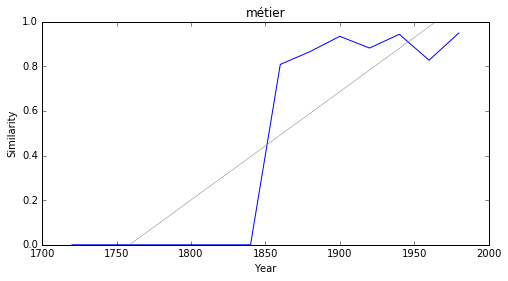

rêve


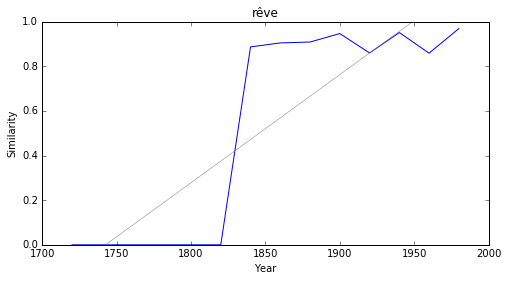

formule


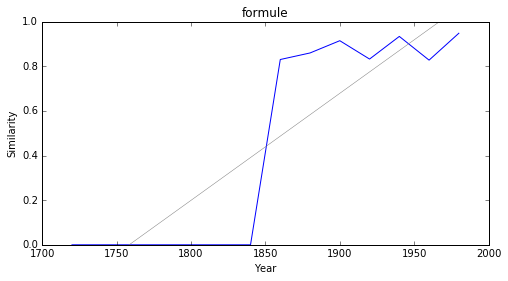

responsabilité


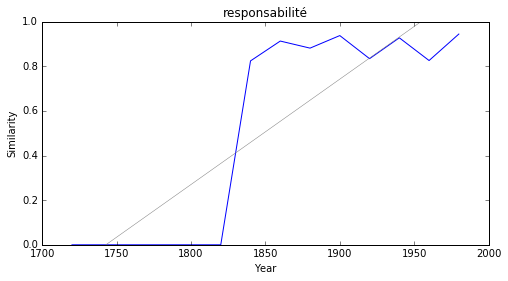

romancier


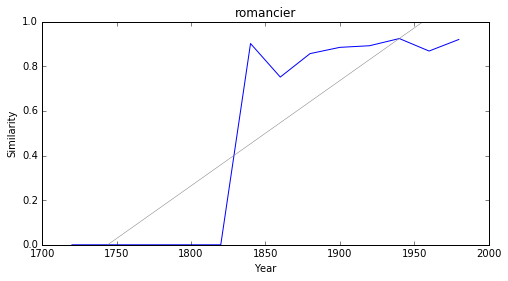

aventure


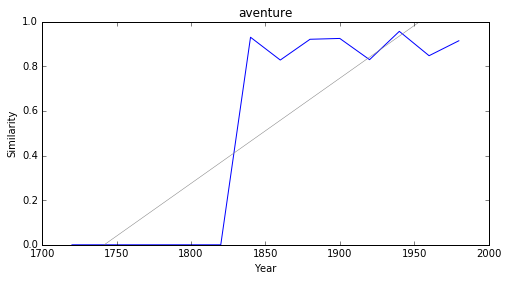

certitude


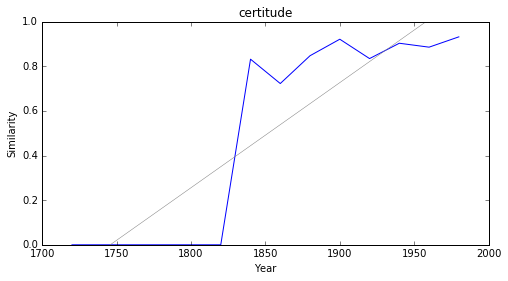

vision


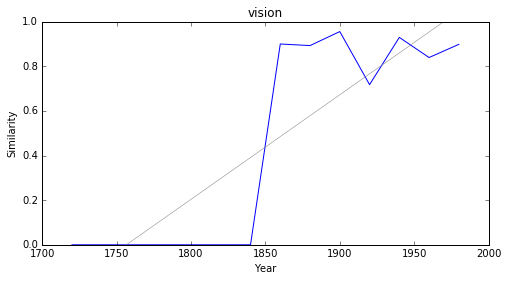

essence


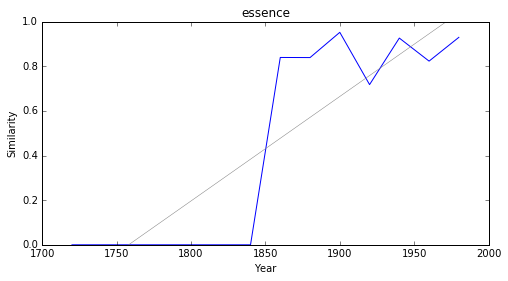

souci


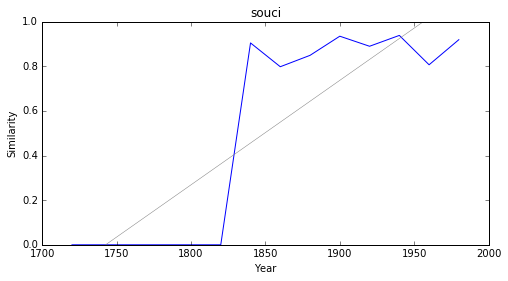

### <i><b>science</i></b>

          token     slope         p
317       souci  0.004531  0.000050
34      essence  0.004523  0.000023
693    mystique  0.004515  0.000031
275      vision  0.004492  0.000034
433    problème  0.004492  0.000065
396  communauté  0.004487  0.000024
485    aventure  0.004478  0.000054
499   évolution  0.004468  0.000015
469   technique  0.004420  0.000033
136     cerveau  0.004418  0.000036



souci


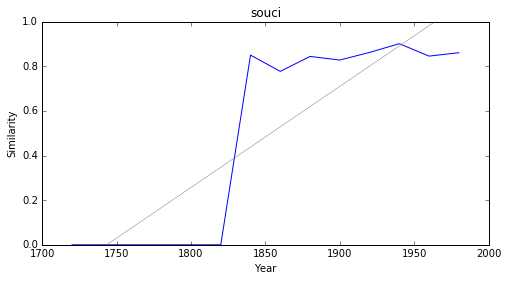

essence


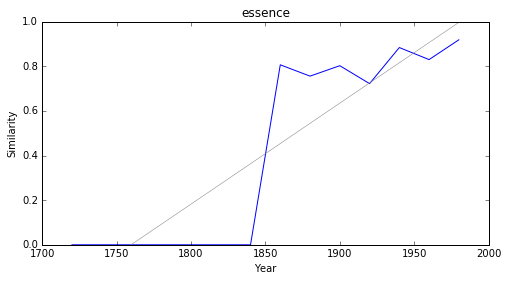

mystique


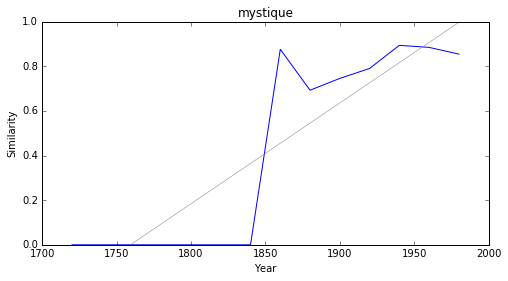

vision


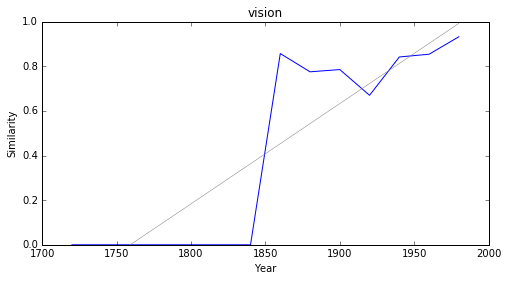

problème


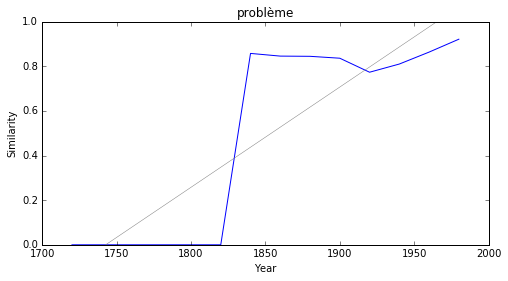

communauté


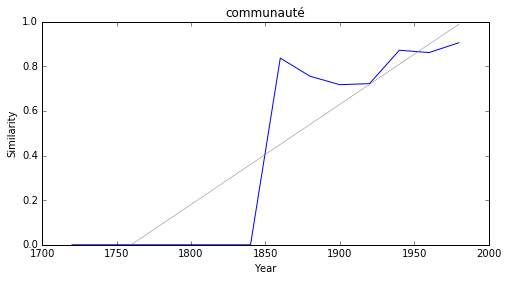

aventure


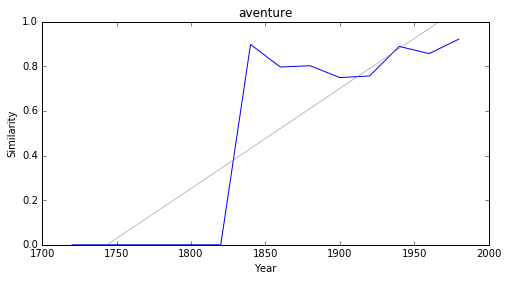

évolution


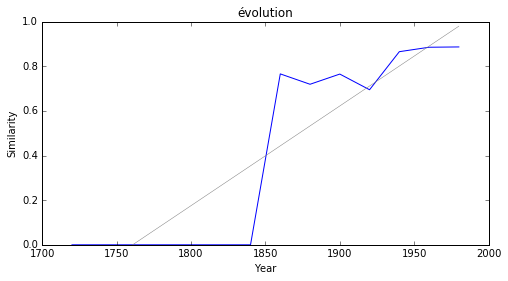

technique


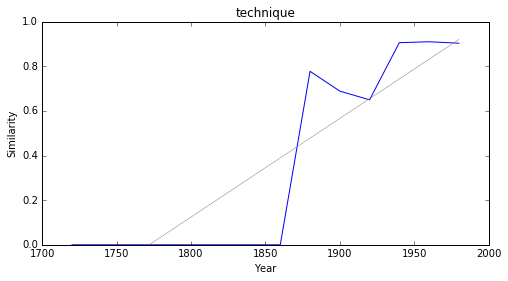

cerveau


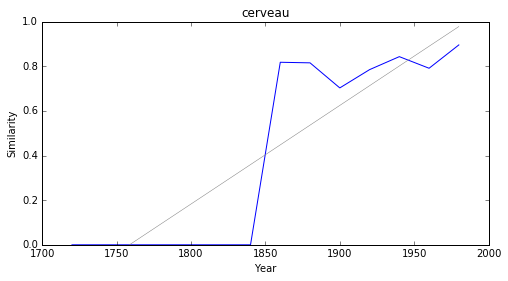

### <i><b>savoir</i></b>

          token     slope         p
251    imaginer  0.004319  0.000016
25         vite  0.003960  0.000022
181   constater  0.003885  0.000016
502    affirmer  0.003885  0.000090
437    insister  0.003838  0.000059
433  soupçonner  0.003814  0.000114
70        façon  0.003797  0.000017
163         cas  0.003784  0.000007
40     déplaire  0.003768  0.000210
303      quelqu  0.003754  0.000009



imaginer


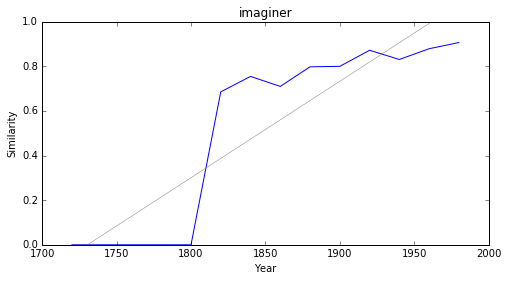

vite


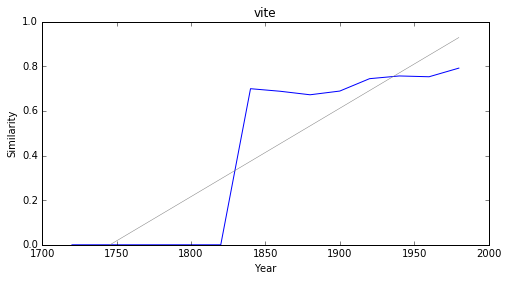

constater


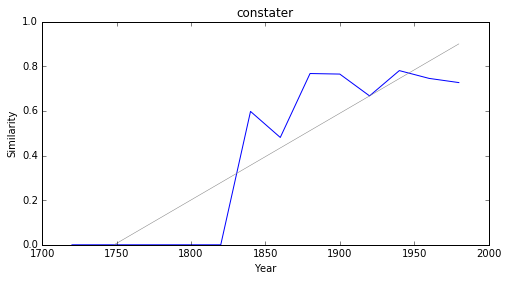

affirmer


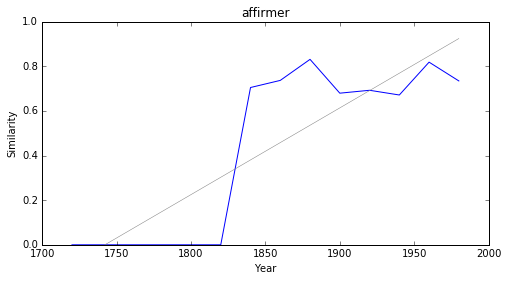

insister


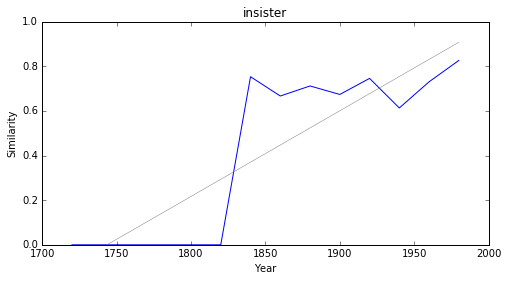

soupçonner


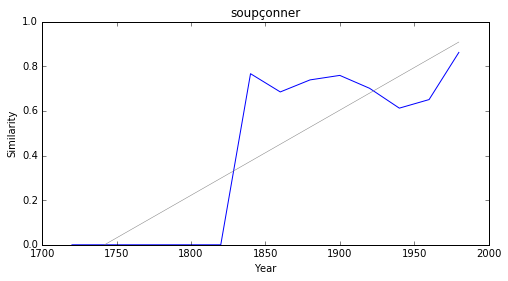

façon


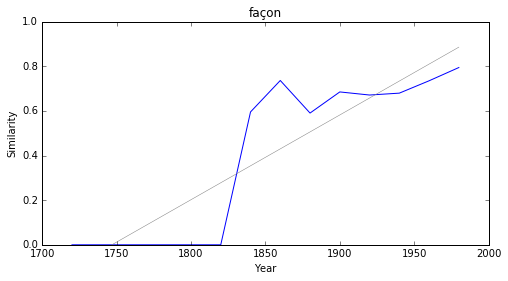

cas


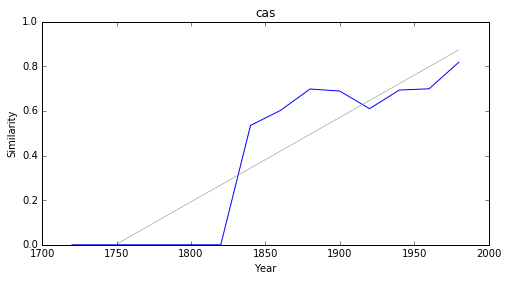

déplaire


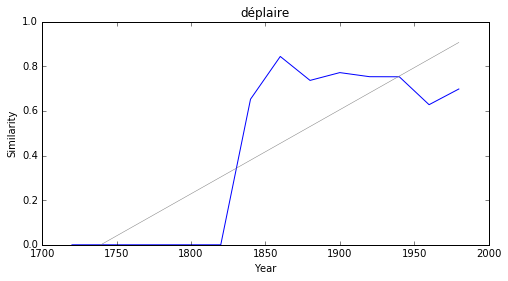

quelqu


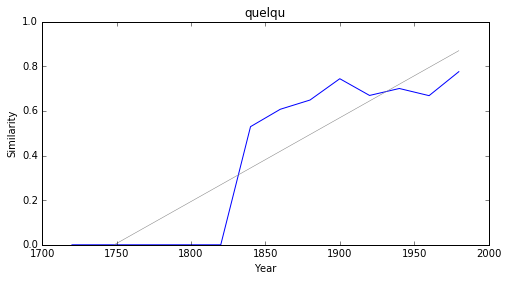

### <i><b>histoire</i></b>

          token     slope         p
476    aventure  0.004294  0.000076
266      vision  0.004263  0.000061
472        rêve  0.004213  0.000095
630       thème  0.004181  0.000035
547      paysan  0.004173  0.000034
719        dame  0.004165  0.000333
33      essence  0.004161  0.000033
205     paysage  0.004140  0.000042
383  communauté  0.004124  0.000042
656      vallée  0.004121  0.000083



aventure


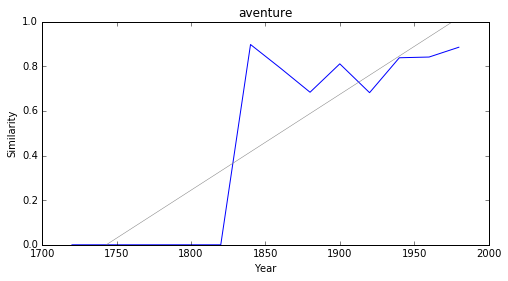

vision


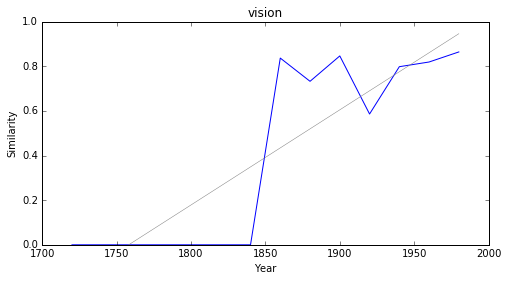

rêve


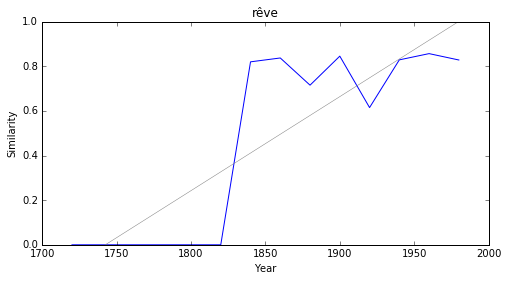

thème


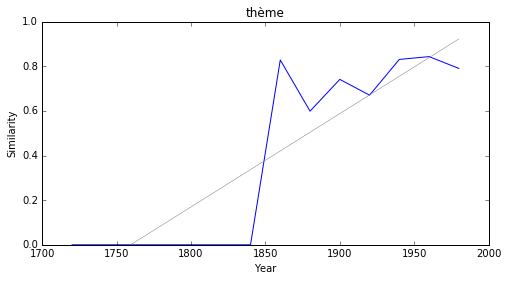

paysan


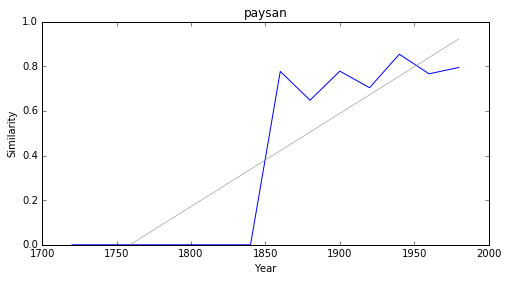

dame


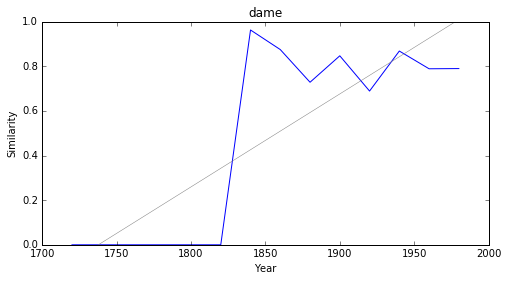

essence


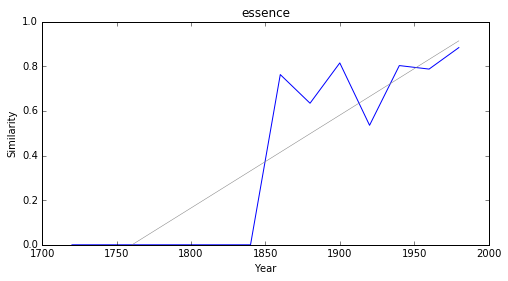

paysage


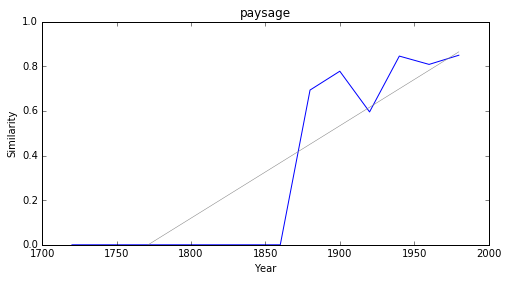

communauté


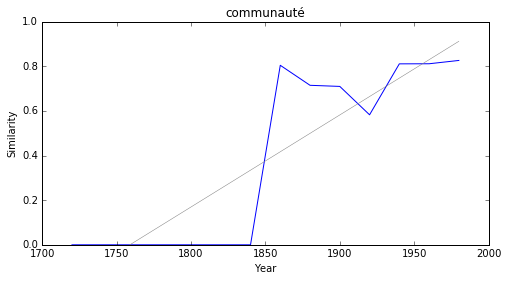

vallée


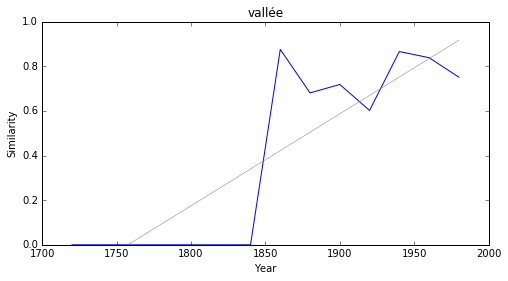

### <i><b>lettre</i></b>

         token     slope         p
731   camarade  0.004824  0.000023
423     paysan  0.004808  0.000026
926      lèvre  0.004779  0.000035
41       thèse  0.004754  0.000010
158   aventure  0.004737  0.000049
812     cheval  0.004733  0.000021
716  formation  0.004730  0.000032
169    article  0.004729  0.000053
544      train  0.004723  0.000019
679     vallée  0.004723  0.000052



camarade


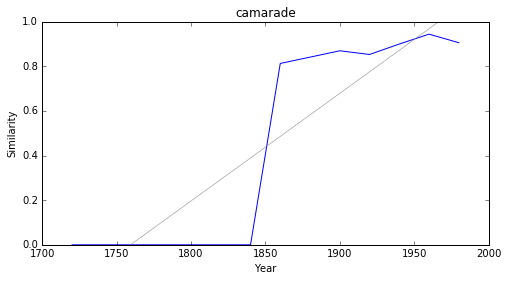

paysan


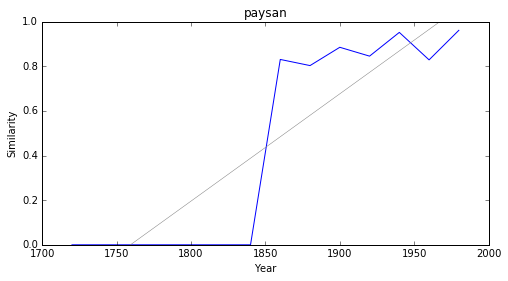

lèvre


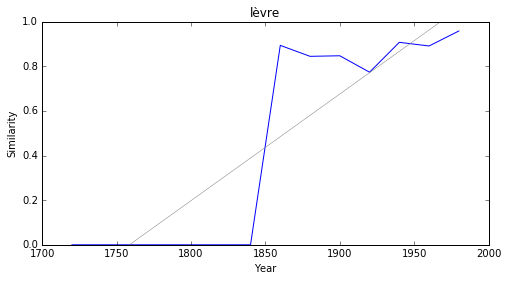

thèse


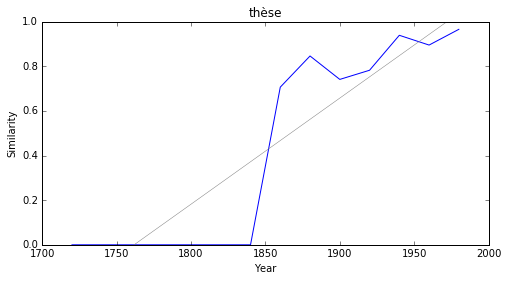

aventure


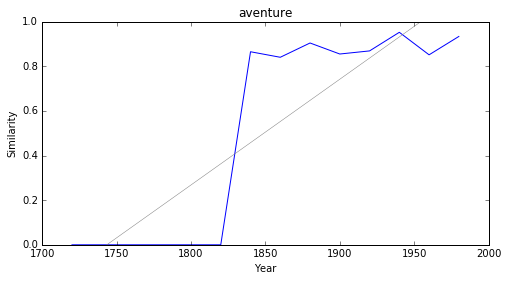

cheval


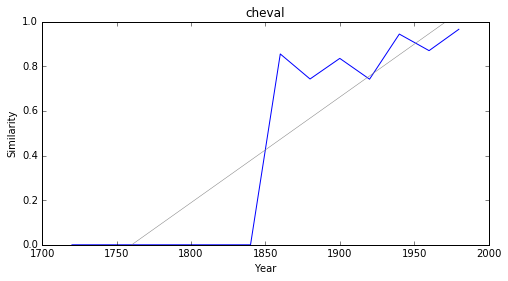

formation


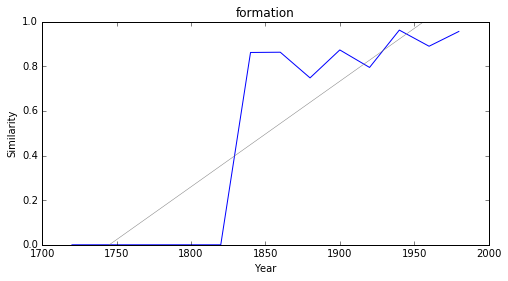

article


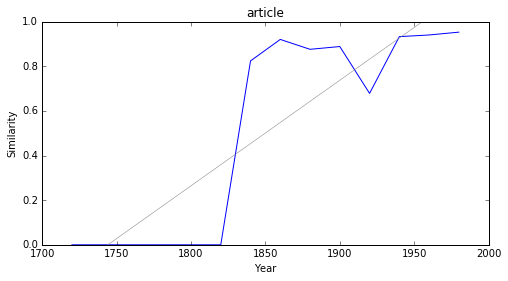

train


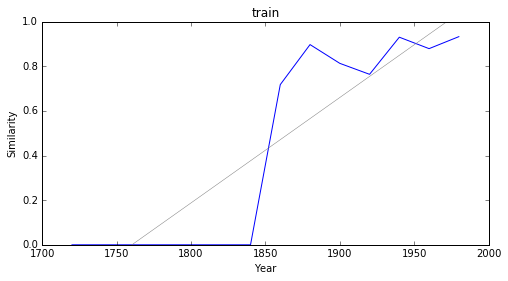

vallée


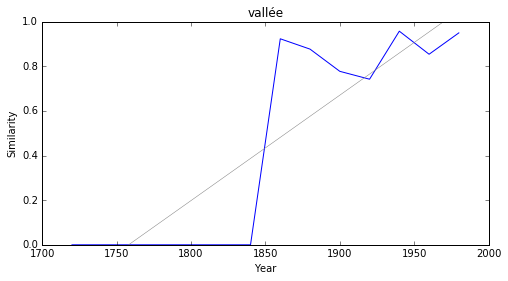

### <i><b>critique</i></b>

          token     slope         p
126  définition  0.004784  0.000079
50       métier  0.004776  0.000105
104     formule  0.004773  0.000077
101   romancier  0.004724  0.000082
79     vocation  0.004705  0.000102
359      pudeur  0.004680  0.000106
865     définir  0.004658  0.000099
1         péché  0.004637  0.000061
951      proche  0.004637  0.000085
784       façon  0.004628  0.000113



définition


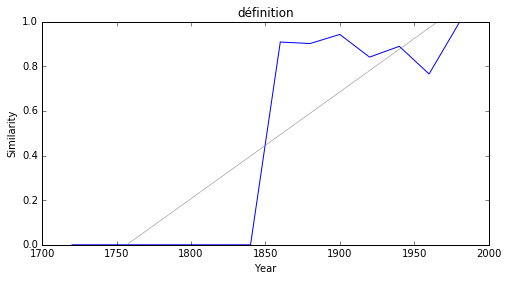

métier


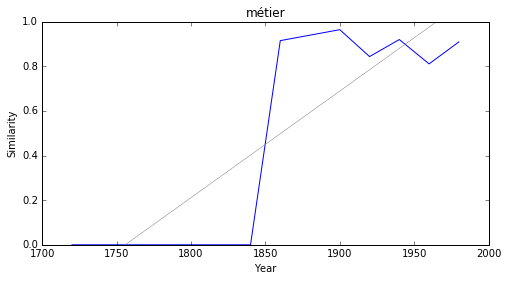

formule


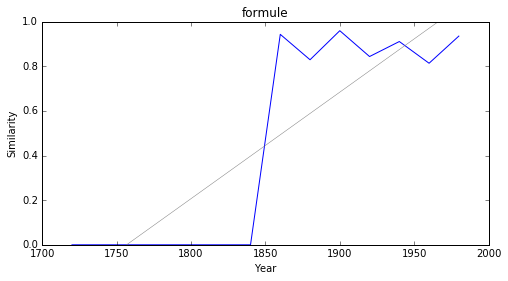

romancier


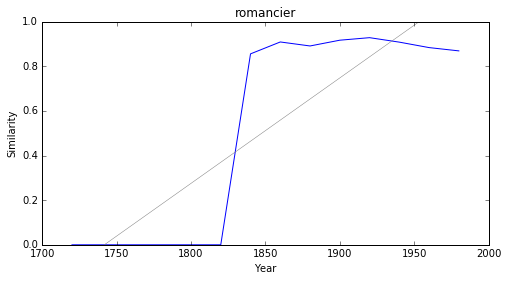

vocation


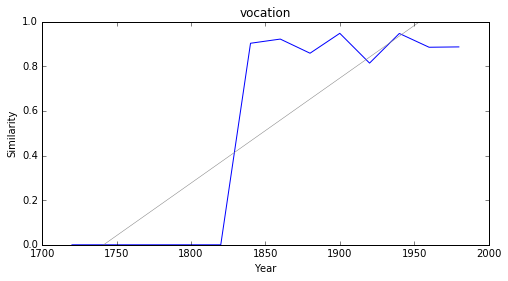

pudeur


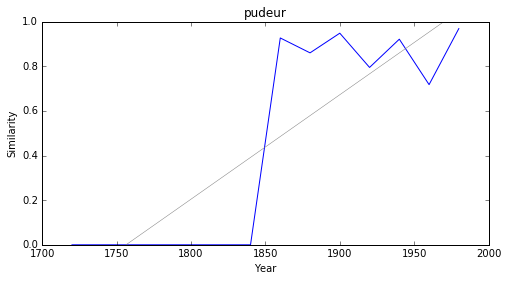

définir


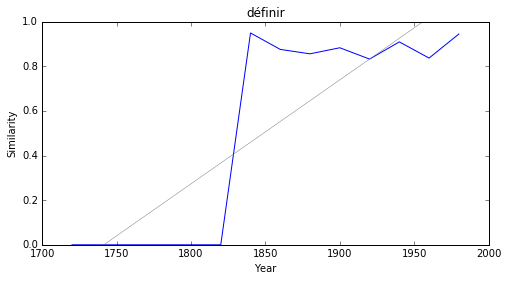

péché


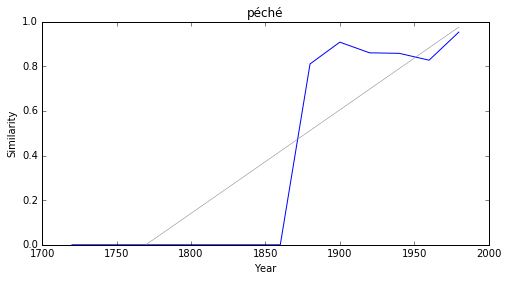

proche


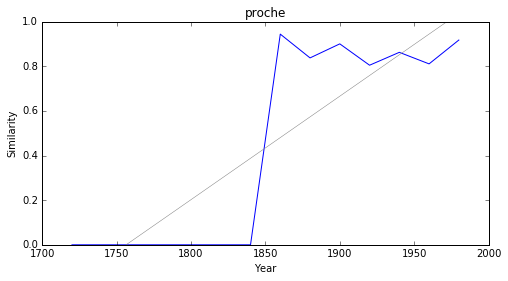

façon


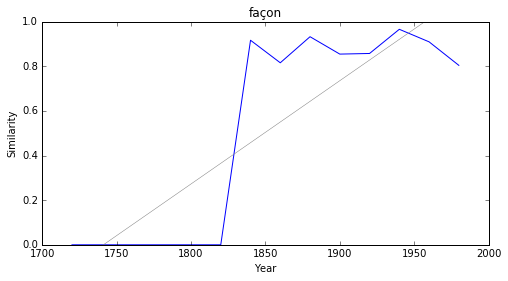

### <i><b>esprit</i></b>

              token     slope         p
282           souci  0.004413  0.000010
375        problème  0.004171  0.000029
84            façon  0.004167  0.000009
30          essence  0.004166  0.000013
414            rêve  0.004161  0.000037
419        aventure  0.004116  0.000034
133          métier  0.004097  0.000023
329  responsabilité  0.004092  0.000014
246          vision  0.004088  0.000025
138         réalité  0.004044  0.000102



souci


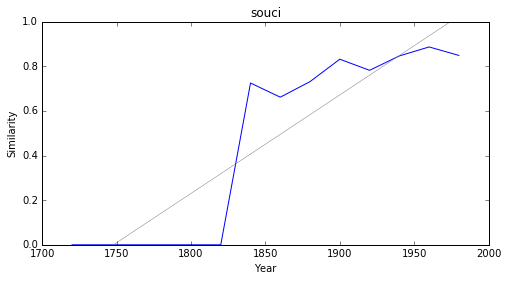

problème


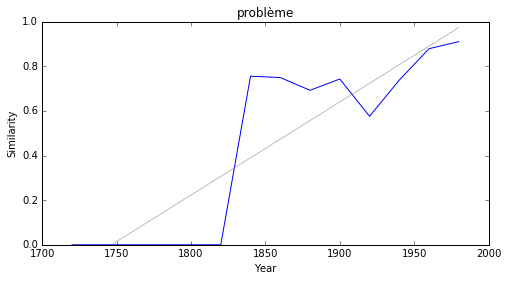

façon


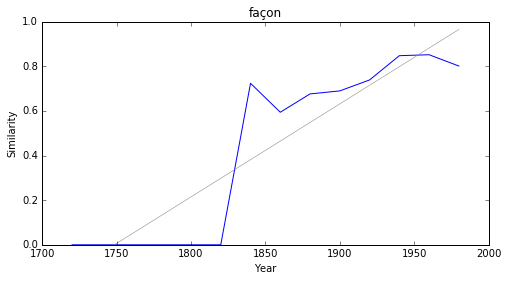

essence


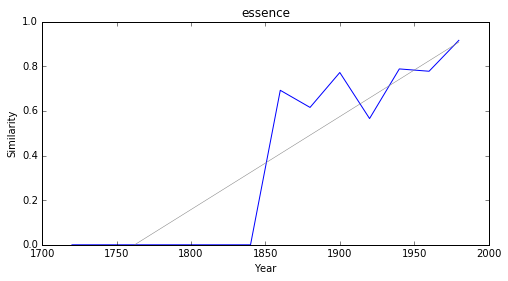

rêve


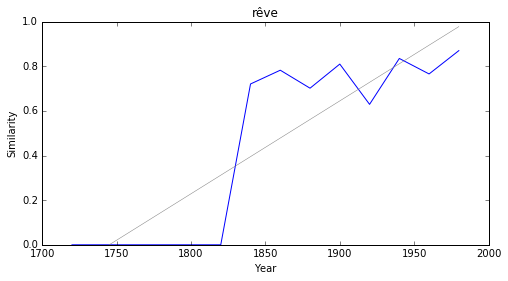

aventure


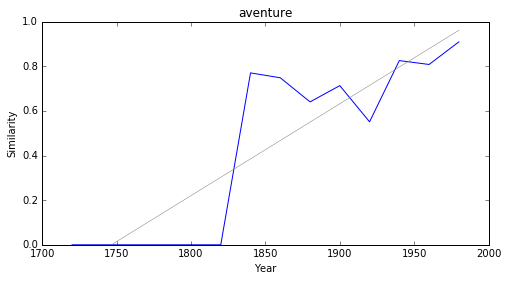

métier


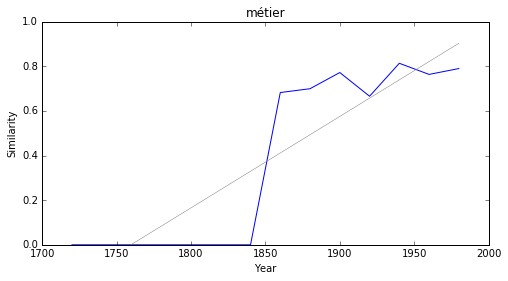

responsabilité


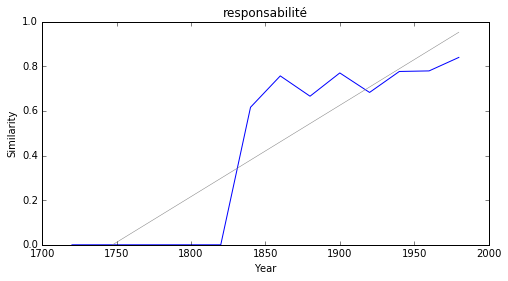

vision


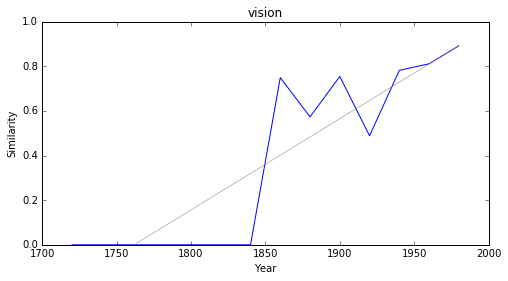

réalité


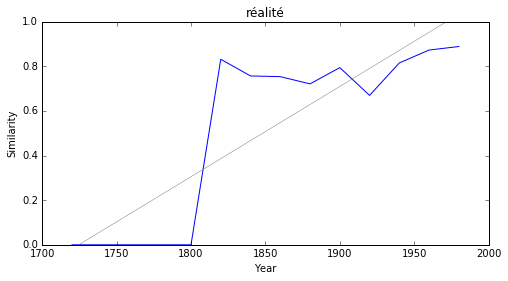

### <i><b>langue</i></b>

              token     slope         p
270          vision  0.004795  0.000060
145          métier  0.004783  0.000055
481            rêve  0.004764  0.000097
488        aventure  0.004741  0.000090
29          essence  0.004695  0.000034
644           thème  0.004640  0.000053
375    personnalité  0.004638  0.000080
604         défaite  0.004616  0.000122
383  responsabilité  0.004612  0.000091
318           souci  0.004610  0.000095



vision


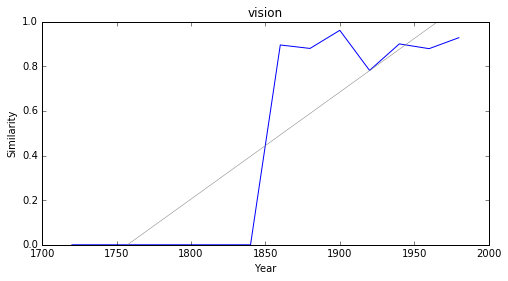

métier


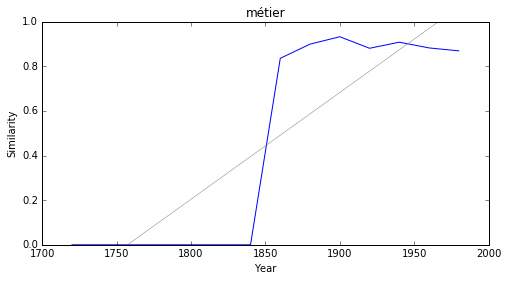

rêve


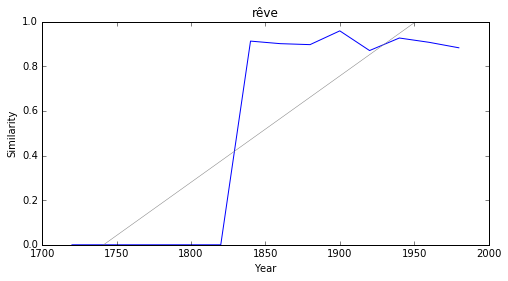

aventure


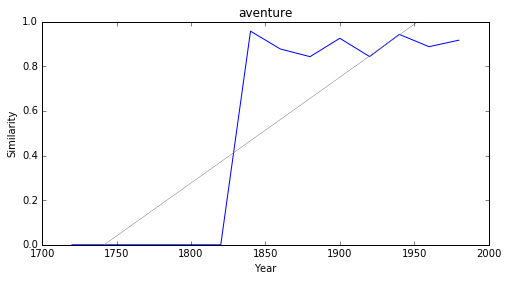

essence


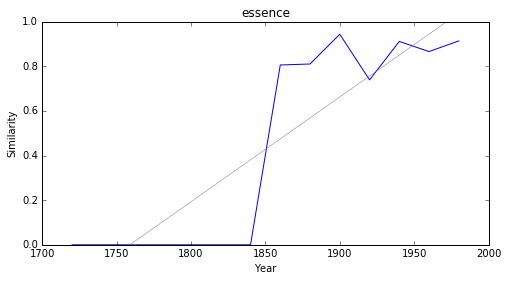

thème


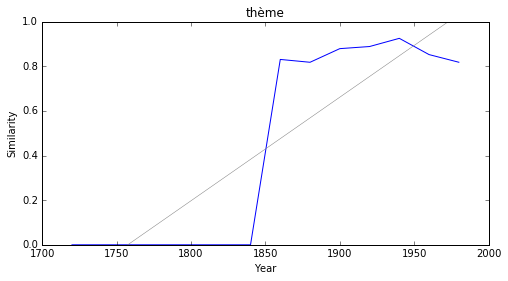

personnalité


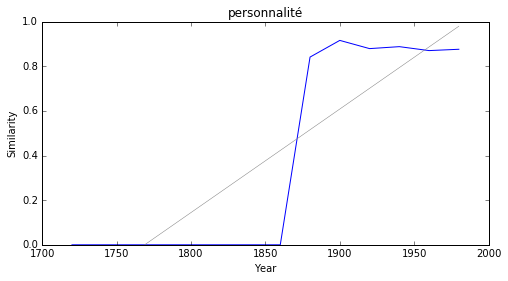

défaite


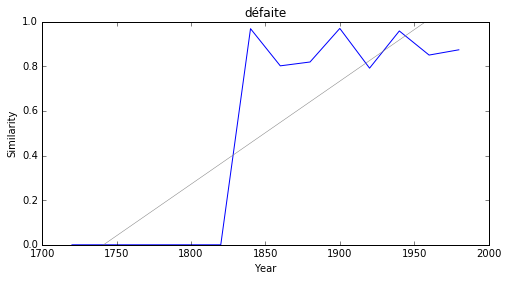

responsabilité


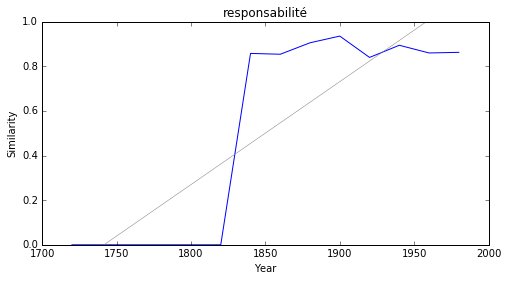

souci


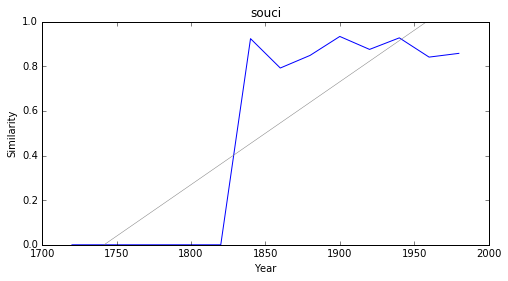

### <i><b>politique</i></b>

          token     slope         p
747    mystique  0.004481  0.000024
413  communauté  0.004465  0.000014
468    économie  0.004421  0.000038
673  économique  0.004420  0.000032
35      essence  0.004365  0.000040
495   technique  0.004360  0.000027
359  individuel  0.004360  0.000063
533   évolution  0.004353  0.000017
498  catholique  0.004343  0.000038
56      conflit  0.004337  0.000046



mystique


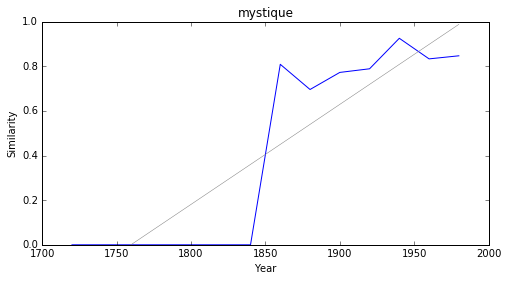

communauté


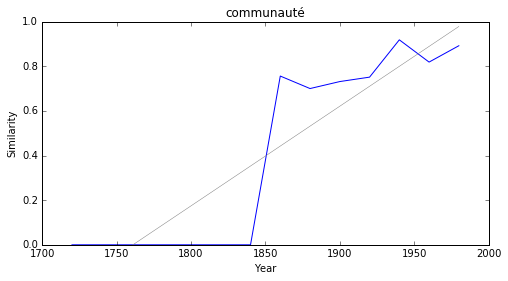

économie


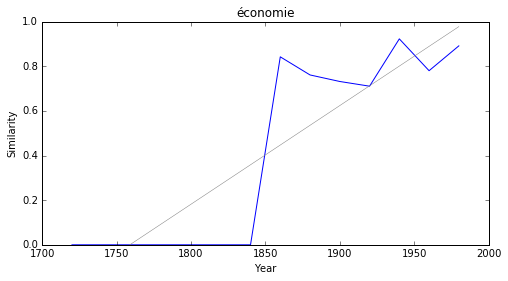

économique


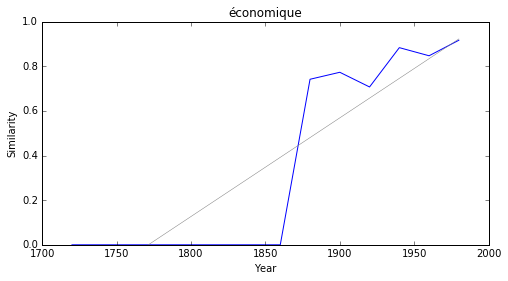

essence


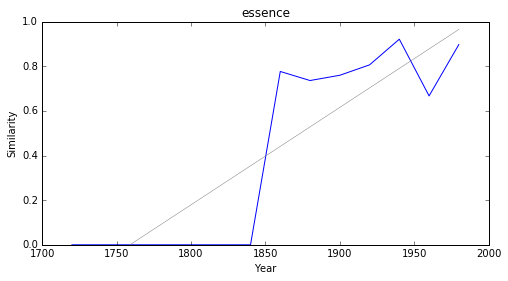

technique


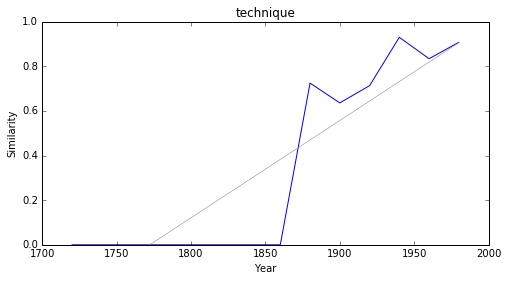

individuel


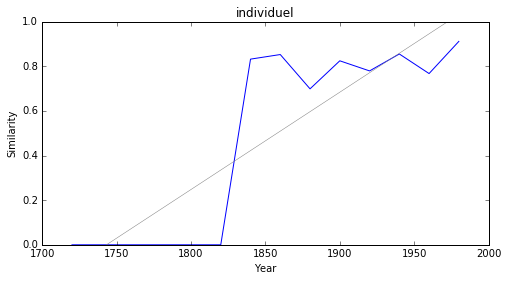

évolution


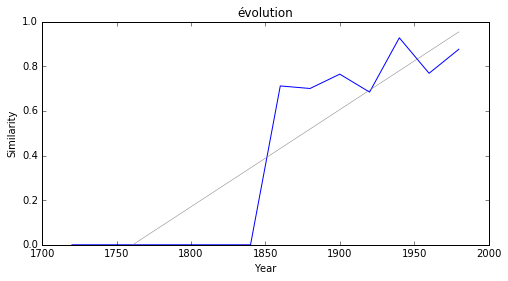

catholique


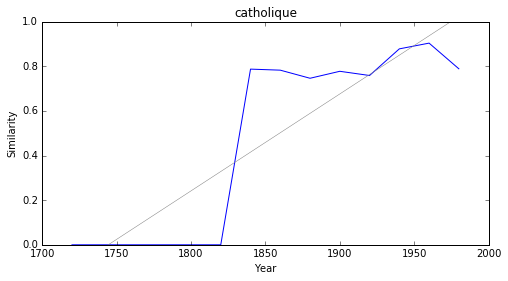

conflit


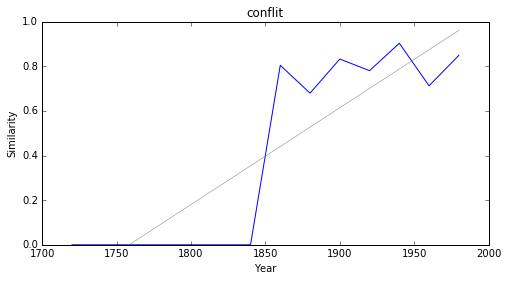

### <i><b>pouvoir</i></b>

          token     slope         p
49      parfois  0.003613  0.000046
233    imaginer  0.003604  0.000084
457    affirmer  0.003602  0.000071
28         vite  0.003510  0.000042
243    importer  0.003461  0.000206
171   constater  0.003414  0.000062
394  soupçonner  0.003402  0.000429
279      quelqu  0.003340  0.000029
397    insister  0.003312  0.000095
235      mentir  0.003304  0.000092



parfois


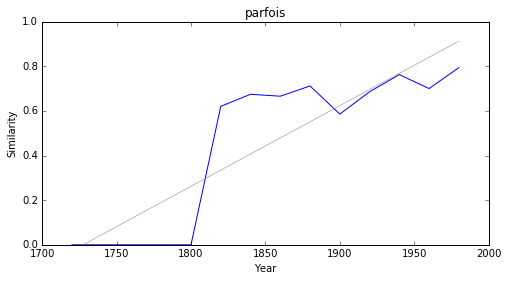

imaginer


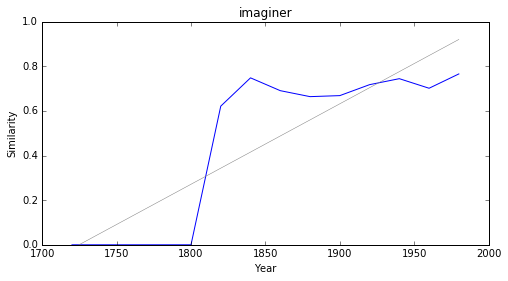

affirmer


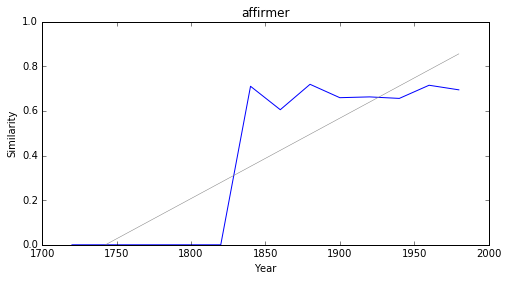

vite


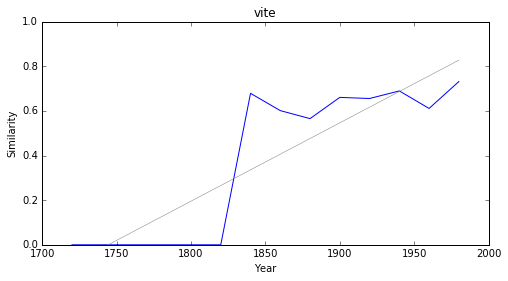

importer


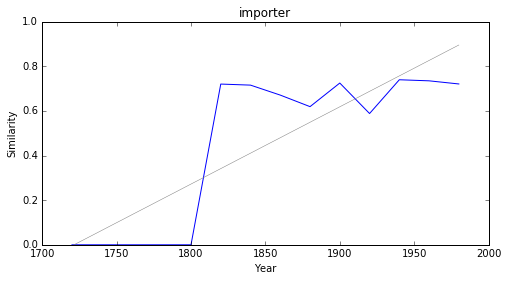

constater


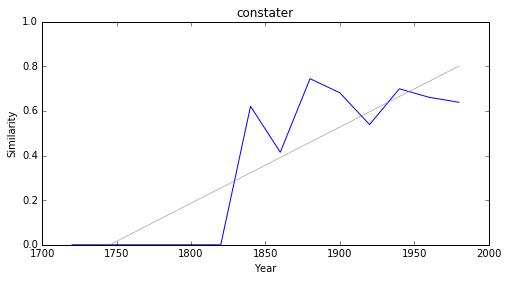

soupçonner


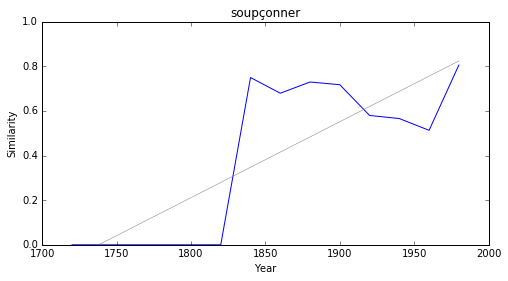

quelqu


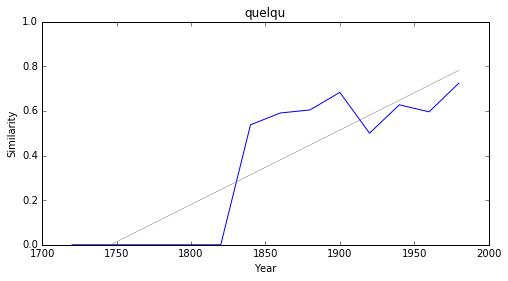

insister


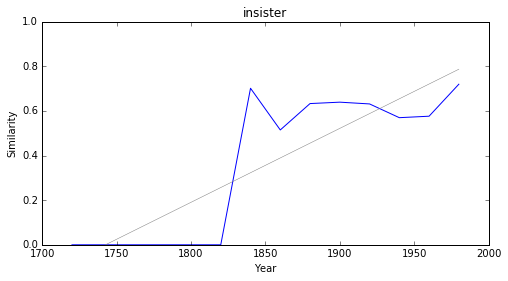

mentir


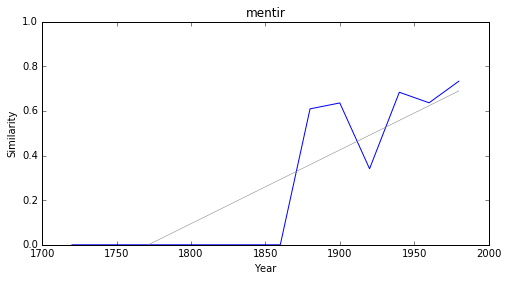

### <i><b>droit</i></b>

          token     slope         p
133      métier  0.004855  0.000020
516       somme  0.004782  0.000007
486      risque  0.004774  0.000020
289       souci  0.004769  0.000025
548  accommoder  0.004752  0.000020
91        façon  0.004739  0.000043
444        rêve  0.004739  0.000032
662     formule  0.004735  0.000008
346        pire  0.004730  0.000007
706    affirmer  0.004724  0.000014



métier


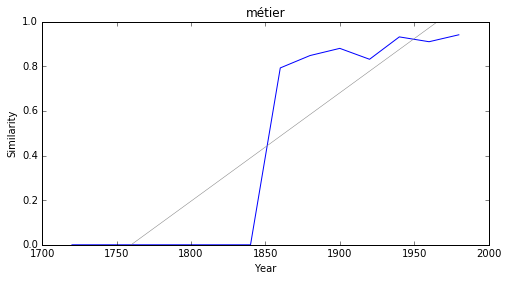

somme


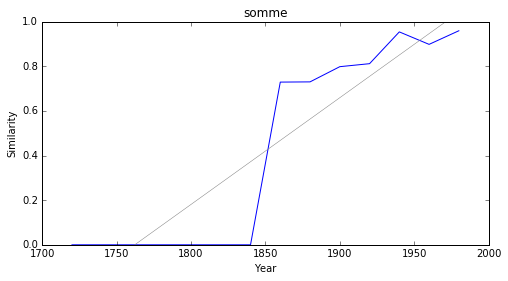

risque


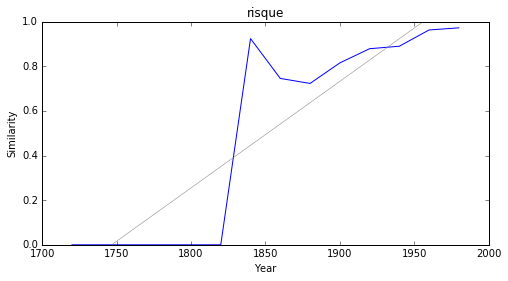

souci


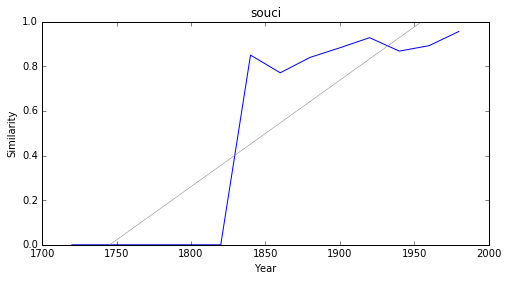

accommoder


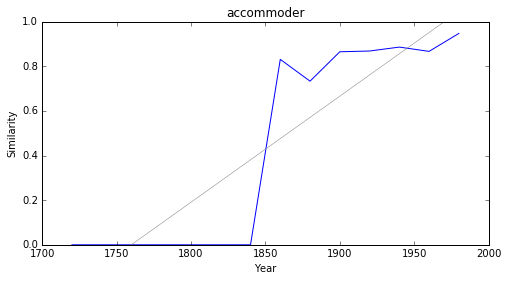

façon


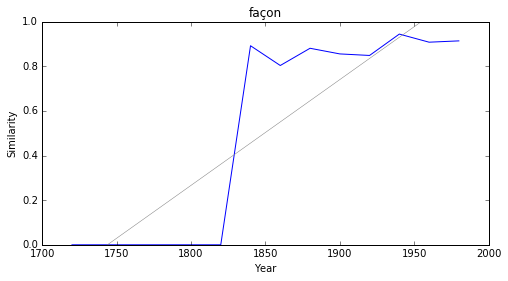

rêve


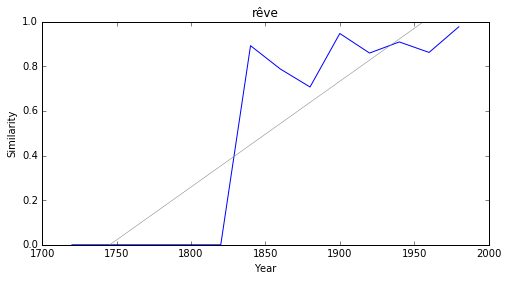

formule


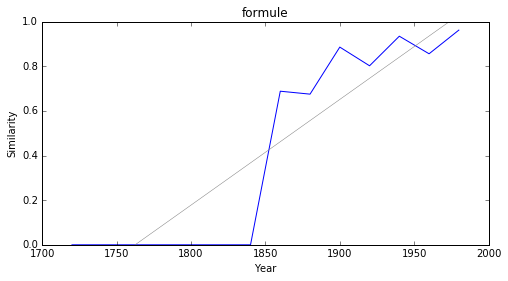

pire


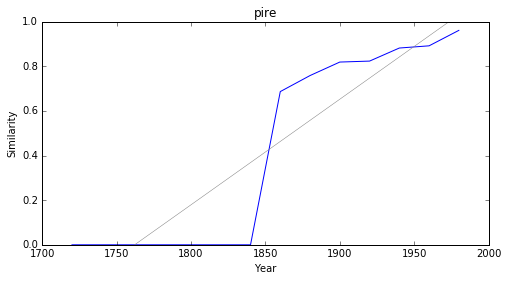

affirmer


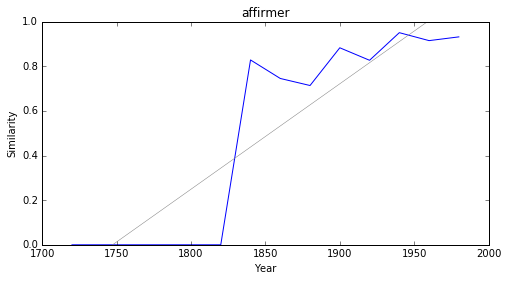

### <i><b>loi</i></b>

              token     slope         p
37          essence  0.004924  0.000017
281          vision  0.004914  0.000022
448        problème  0.004896  0.000025
388            pire  0.004886  0.000010
60          conflit  0.004858  0.000039
382  responsabilité  0.004835  0.000016
553        tendance  0.004832  0.000029
277           masse  0.004831  0.000040
237      discipline  0.004823  0.000025
325           souci  0.004822  0.000022



essence


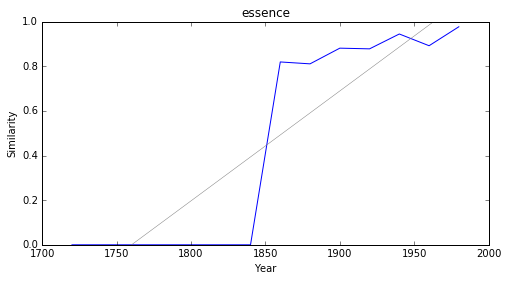

vision


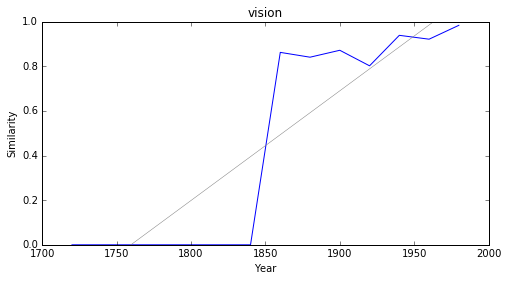

problème


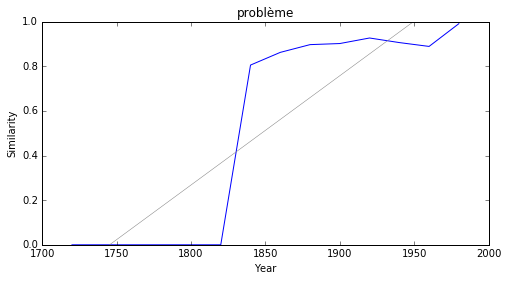

pire


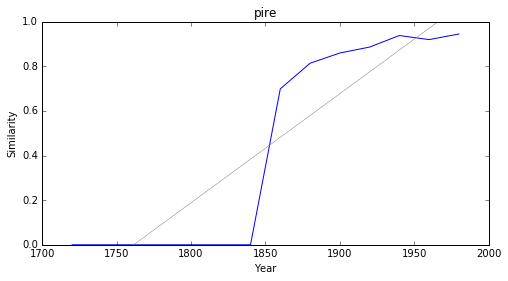

conflit


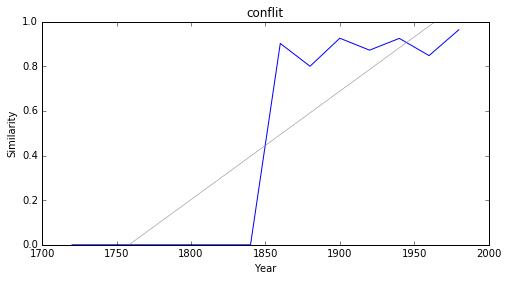

responsabilité


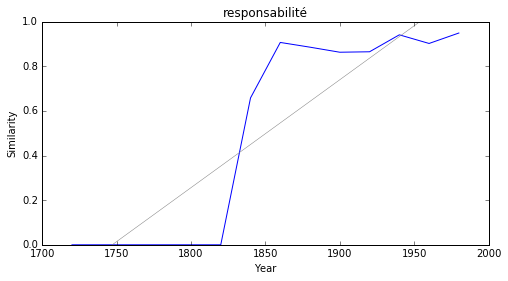

tendance


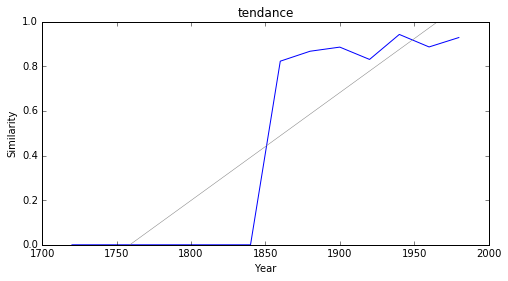

masse


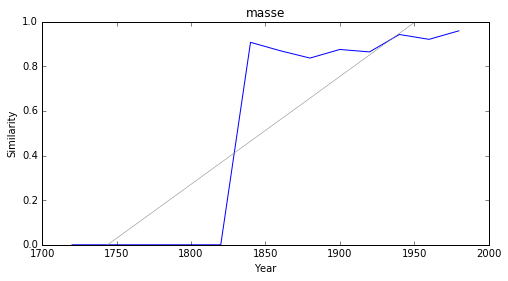

discipline


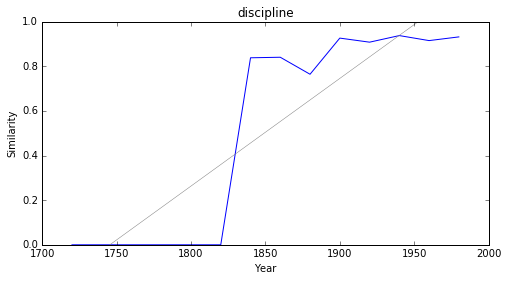

souci


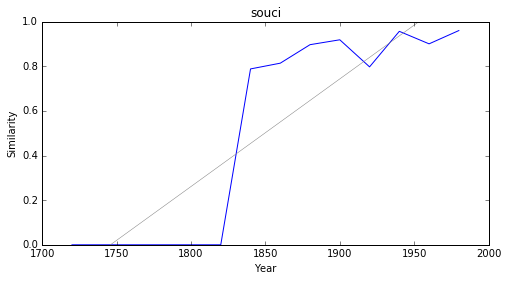

### <i><b>génie</i></b>

              token     slope         p
297           souci  0.004894  0.000019
459            rêve  0.004834  0.000054
137          métier  0.004817  0.000033
360            pire  0.004776  0.000009
654         formule  0.004768  0.000026
674        mystique  0.004766  0.000021
414        problème  0.004719  0.000044
358  responsabilité  0.004719  0.000027
196        attitude  0.004702  0.000014
255          vision  0.004699  0.000057



souci


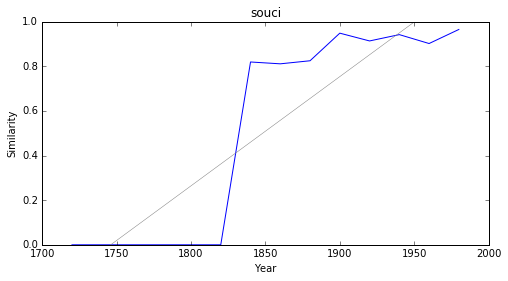

rêve


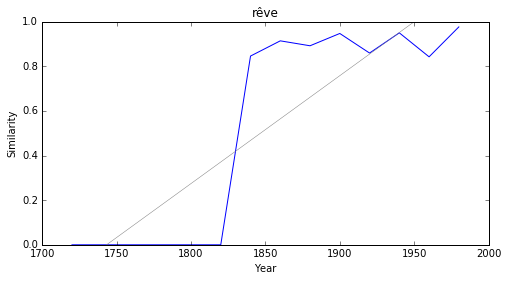

métier


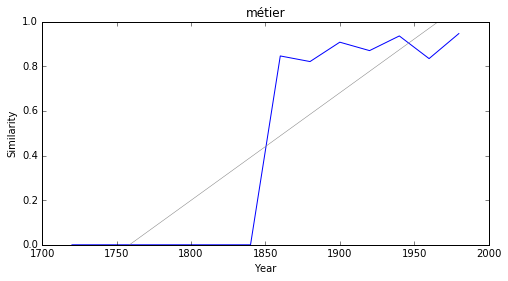

pire


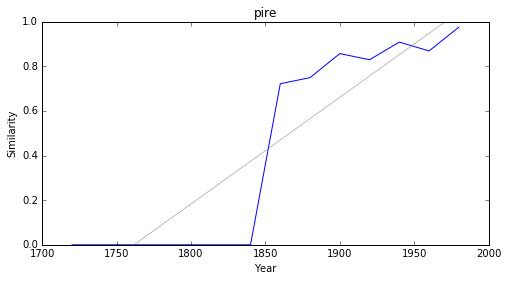

formule


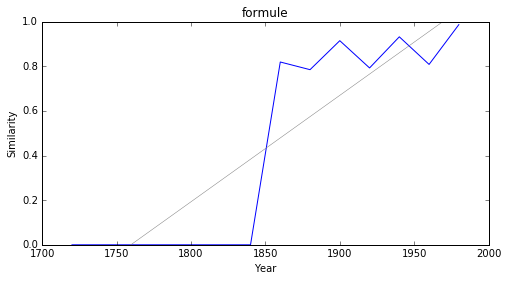

mystique


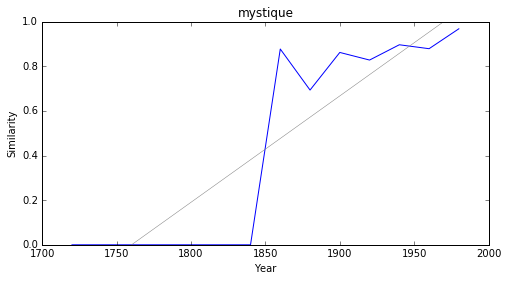

problème


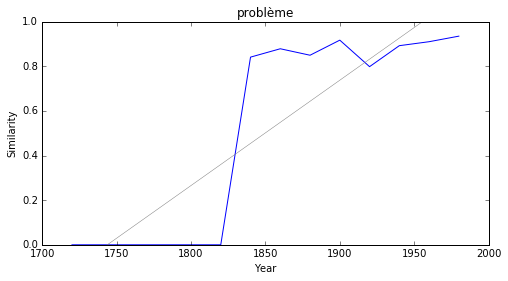

responsabilité


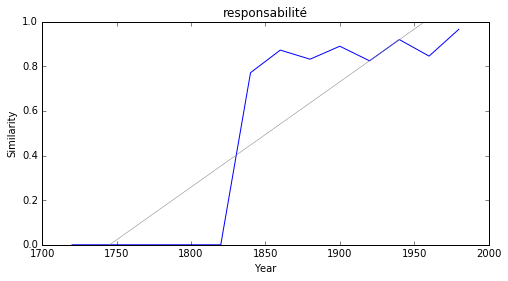

attitude


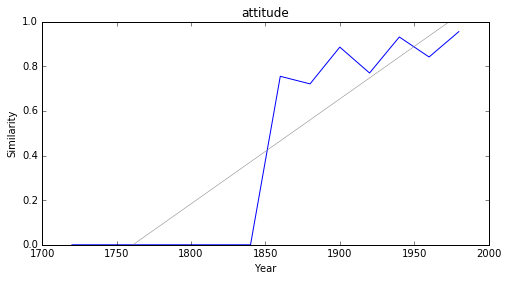

vision


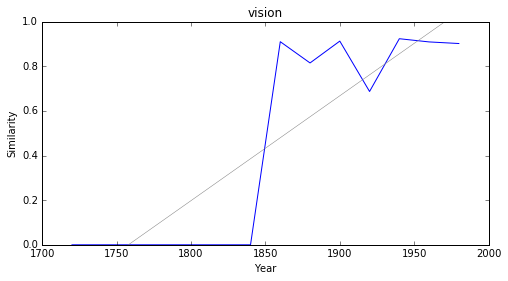

In [10]:
import pandas as pd
from IPython.display import Markdown, display
pd.set_option('display.max_rows', 1000)

for word in testList :
    display(Markdown("### <i><b>"+word+"</i></b>"))
    df1 = pd.DataFrame(entries[word], columns=('token', 'slope', 'p'))
    print(df1.sort_values('slope', ascending=False).head(10))
    print('\n\n')
    
    for i, row in df1.sort_values('slope', ascending=False).head(10).iterrows():
        plot_cosine_series(word, row['token'], 8, 4)

# Decreasing

This is the same process here : we want to see which terms tend to <b>disassociate</b> themselves from "littérature" (by default, which you can change with the trained models). Then again, you have to check the p values. "transplantation", "choeur" and "philé" are not considered significant, "chaldéen" is, and "destination", "morceau", etc. are as well. The fact that those are less significant is logical : the fewer the terms, the more erratic their series tend to be.

### <i><b>littérature</i></b>

             token     slope             p
424       monarque -0.005364  3.770473e-05
146      émulation -0.005345  3.031541e-05
158       vertueux -0.004584  5.651689e-04
266         avoyer -0.004378  9.070469e-04
654       quelques -0.004015  9.987445e-05
451  perfectionner -0.003982  1.532957e-04
749     modération -0.003971  2.634368e-04
171            sur -0.003900  1.558353e-04
530           deux -0.003850  8.959045e-07
349          notre -0.003751  4.159363e-07



monarque


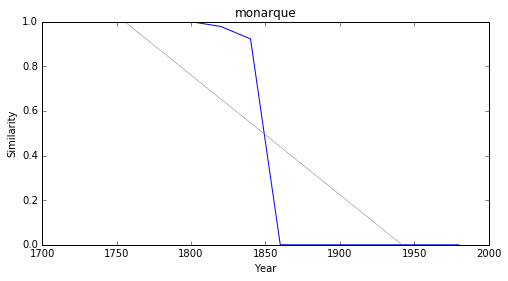

émulation


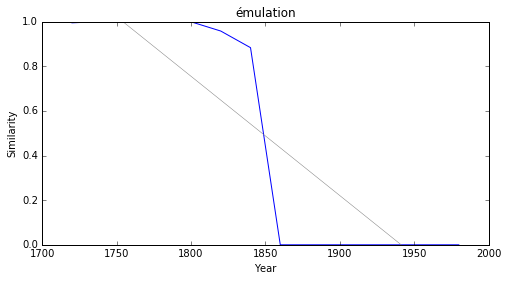

vertueux


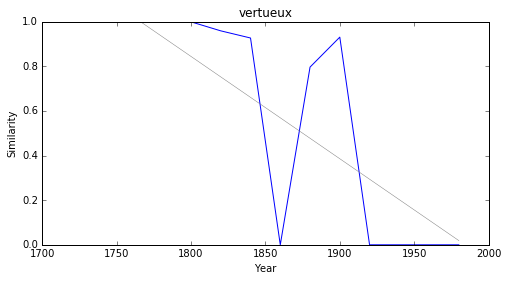

avoyer


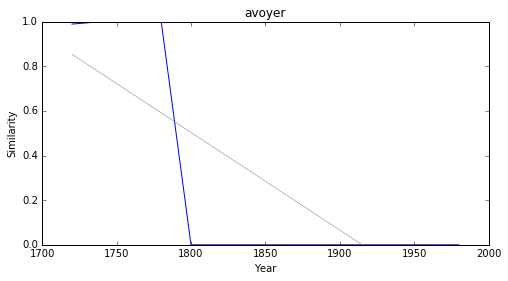

quelques


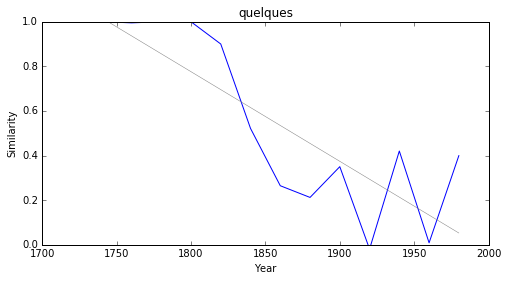

perfectionner


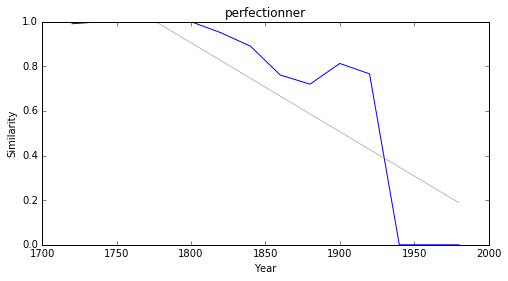

modération


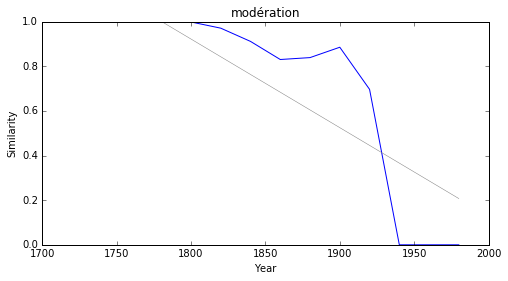

sur


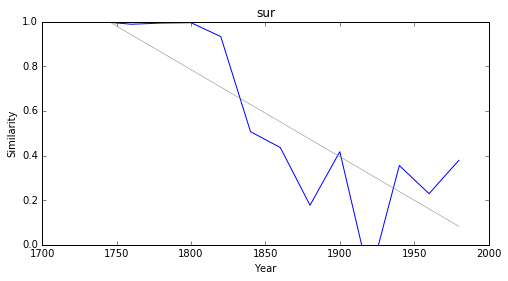

deux


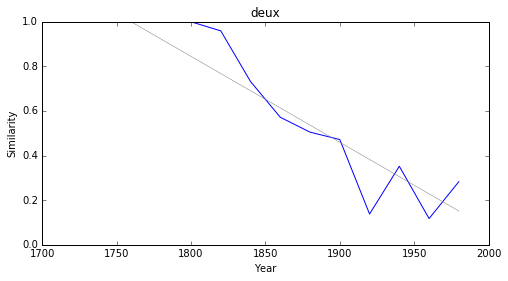

notre


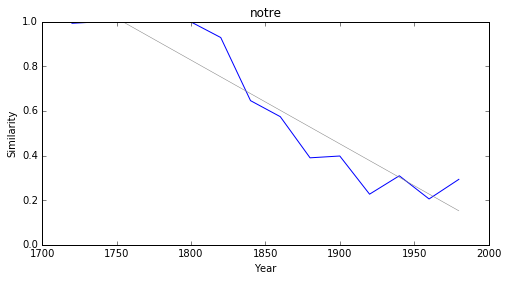

### <i><b>science</i></b>

             token     slope         p
768             an -0.005378  0.000002
416       monarque -0.005341  0.000027
143      émulation -0.005314  0.000019
640       quelques -0.004643  0.000092
752           sans -0.004473  0.000054
368              à -0.004429  0.000061
261         avoyer -0.004386  0.000895
544          après -0.004379  0.000016
20          depuis -0.004192  0.000032
438  perfectionner -0.004100  0.000026



an


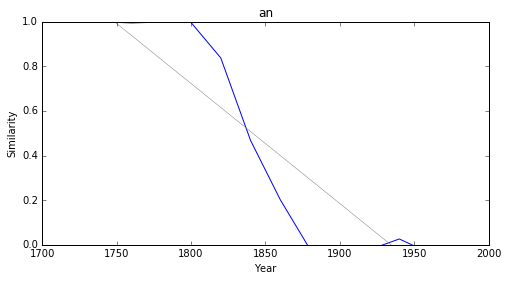

monarque


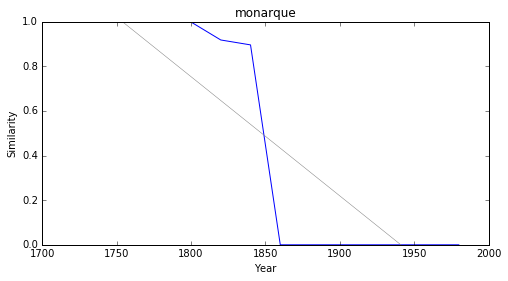

émulation


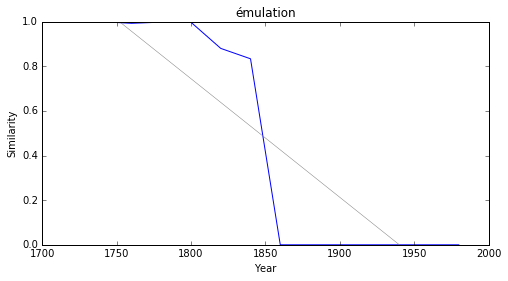

quelques


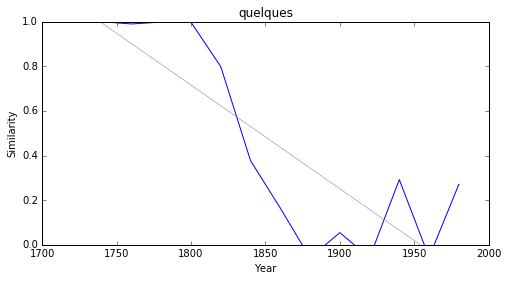

sans


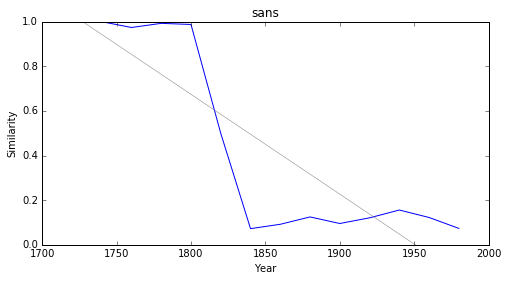

à


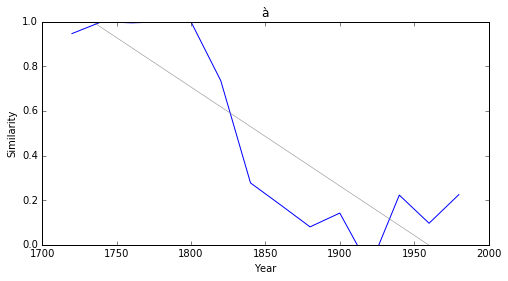

avoyer


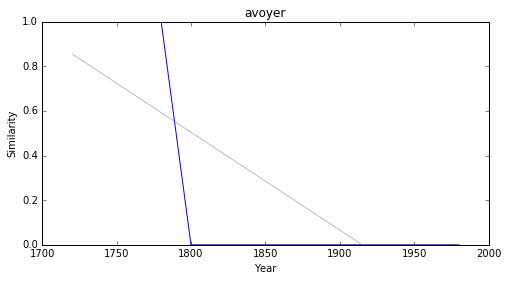

après


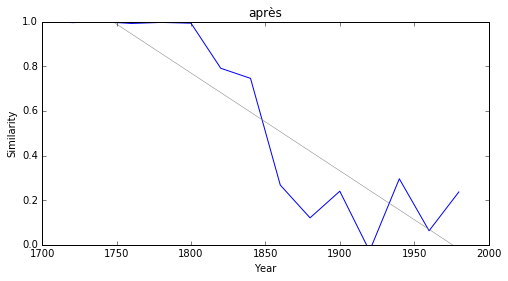

depuis


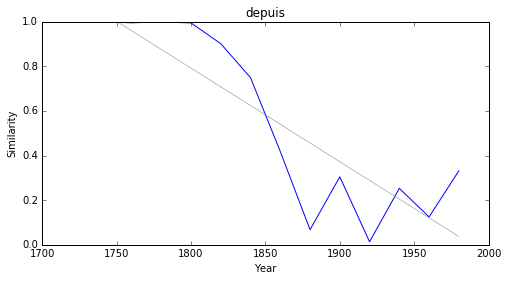

perfectionner


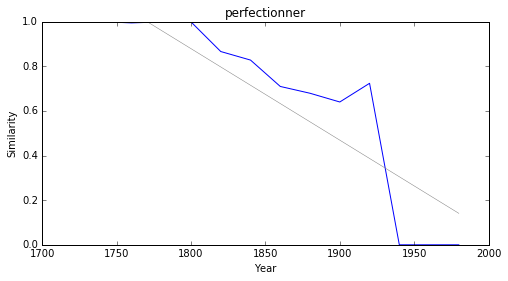

### <i><b>savoir</i></b>

         token     slope         p
387      après -0.005197  0.000009
98   émulation -0.005174  0.000005
139    premier -0.005163  0.000014
272   monarque -0.005123  0.000005
12      depuis -0.005108  0.000028
128        vos -0.005017  0.000003
236    dernier -0.004956  0.000047
510         où -0.004955  0.000125
220      notre -0.004920  0.000311
457   quelques -0.004815  0.000057



après


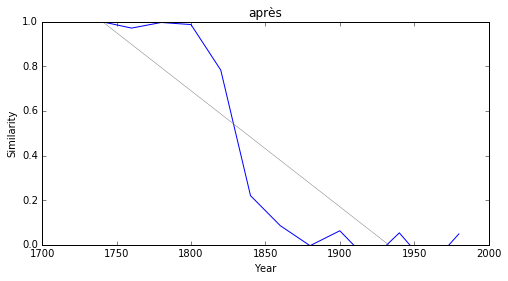

émulation


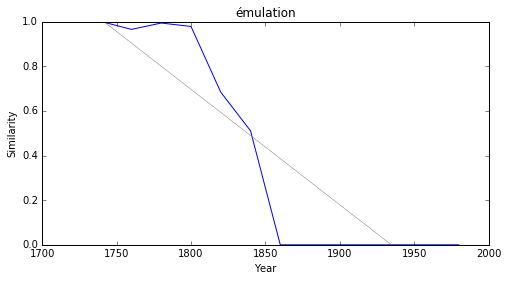

premier


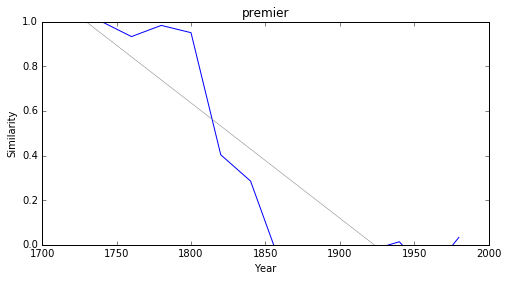

monarque


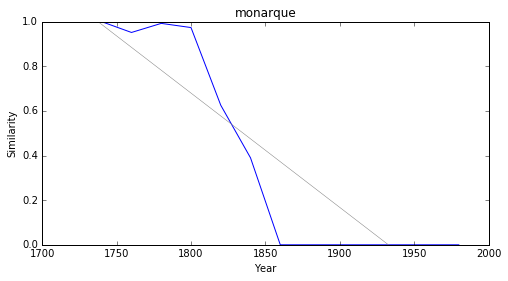

depuis


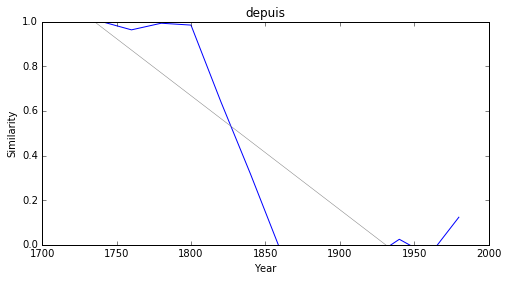

vos


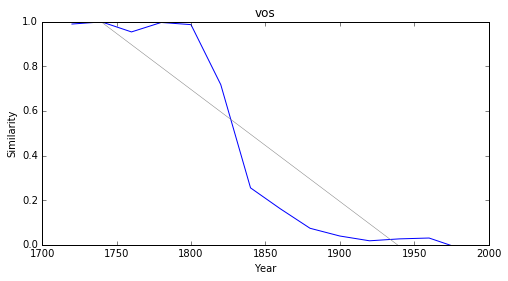

dernier


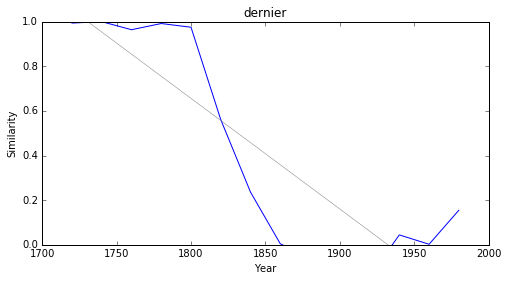

où


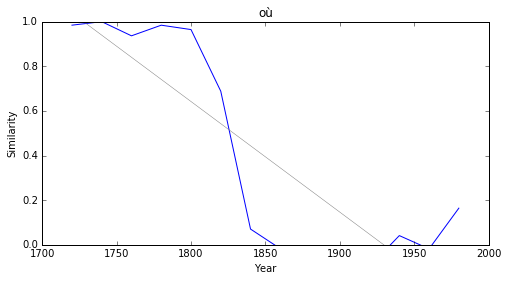

notre


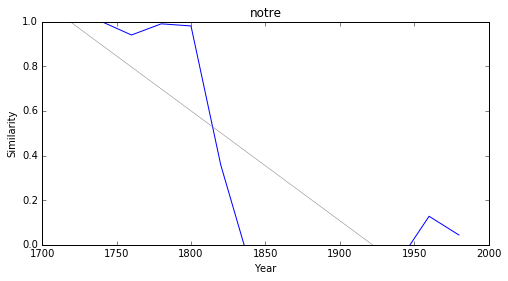

quelques


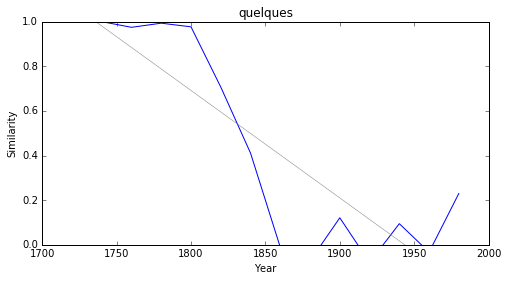

### <i><b>histoire</i></b>

             token     slope         p
400       monarque -0.005307  0.000033
730        aujourd -0.004518  0.000073
632       quelques -0.004440  0.000032
188      françoise -0.004374  0.000910
495            hui -0.004355  0.000103
427  perfectionner -0.004319  0.000003
252         avoyer -0.004311  0.000977
452      concourir -0.004251  0.001639
437           avec -0.004233  0.000093
715        quelque -0.004152  0.000315



monarque


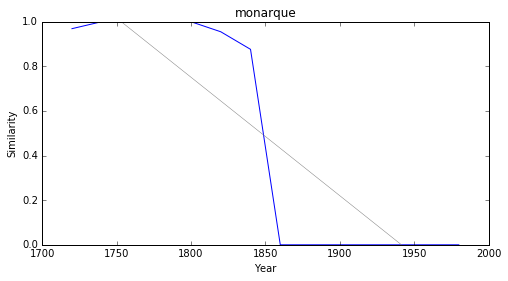

aujourd


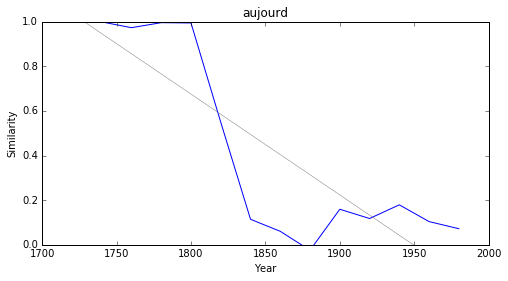

quelques


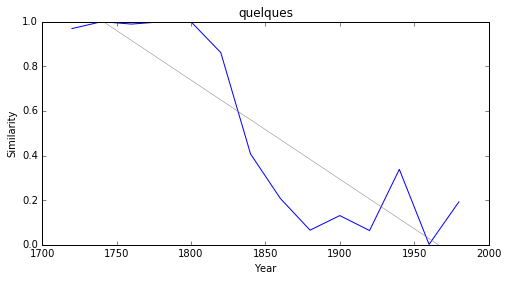

françoise


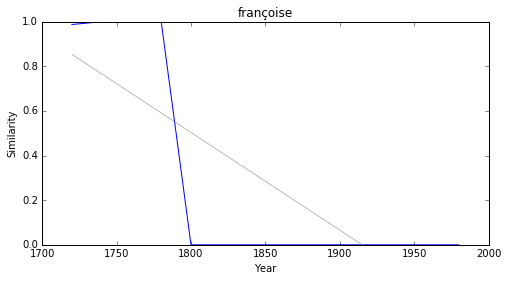

hui


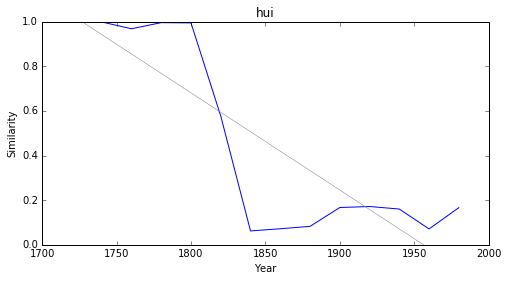

perfectionner


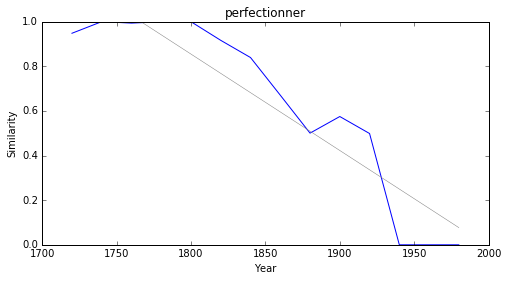

avoyer


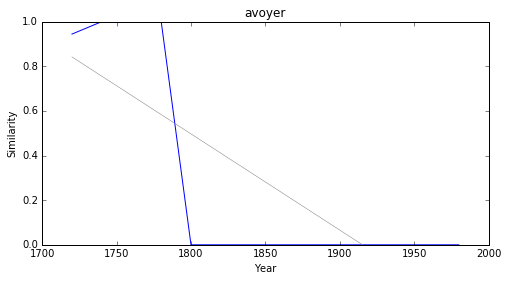

concourir


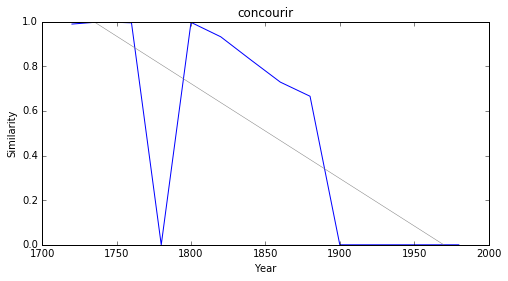

avec


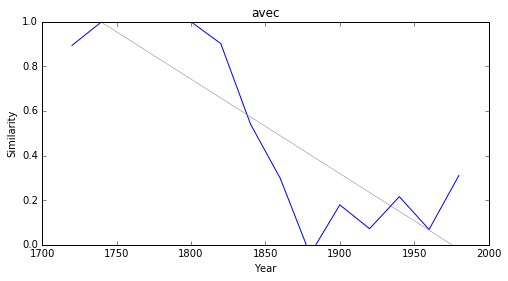

quelque


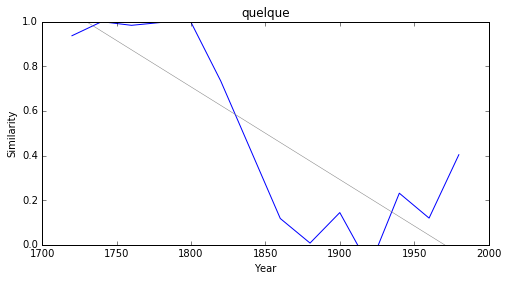

### <i><b>lettre</i></b>

         token     slope         p
138   monarque -0.005277  0.000025
846         au -0.004609  0.000357
807      leurs -0.004527  0.000086
697         se -0.004489  0.000070
3          aux -0.004427  0.000290
862        son -0.004381  0.000090
105     avoyer -0.004352  0.000875
162         du -0.004310  0.000071
534  françoise -0.004302  0.000930
62     daigner -0.004206  0.000086



monarque


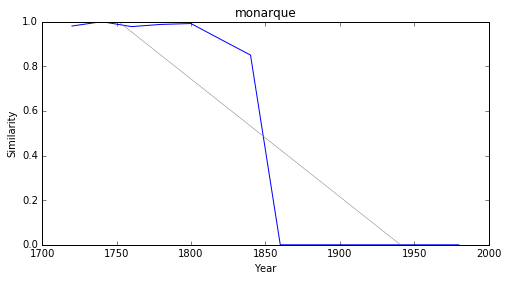

au


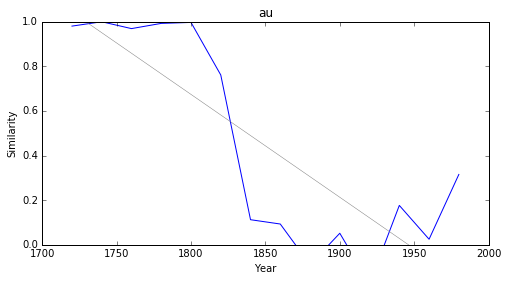

leurs


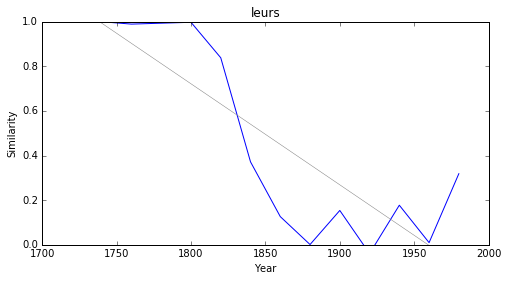

se


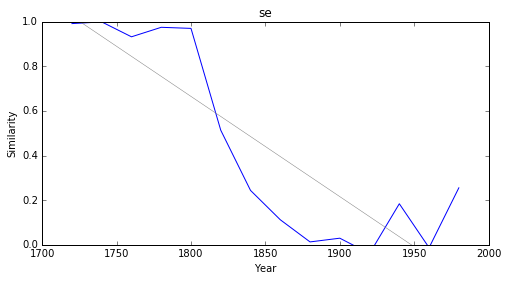

aux


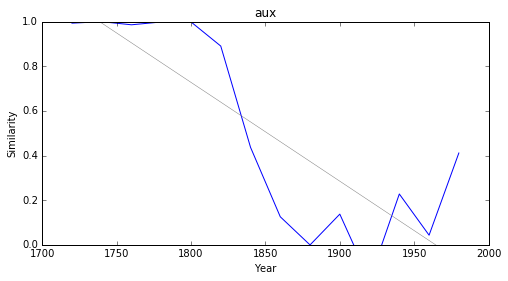

son


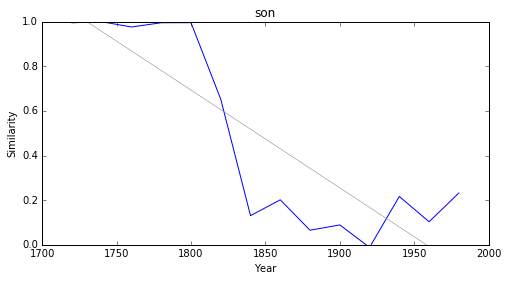

avoyer


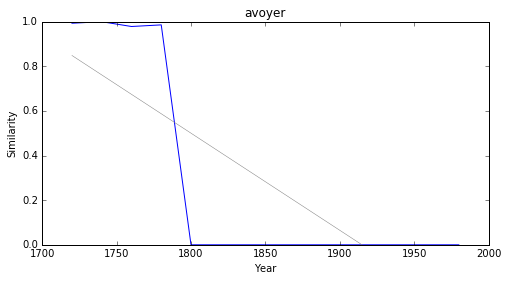

du


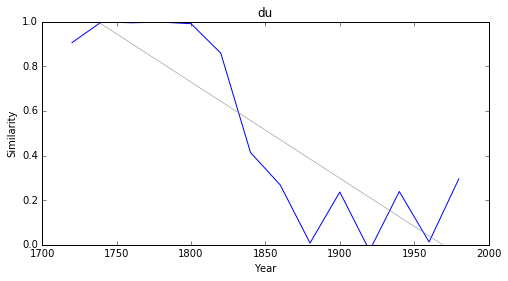

françoise


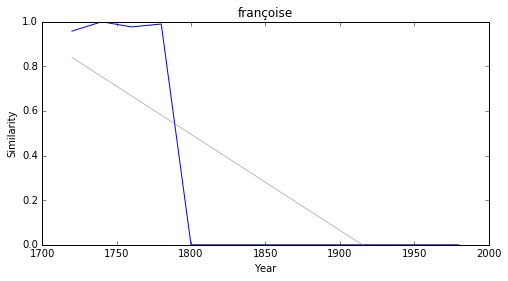

daigner


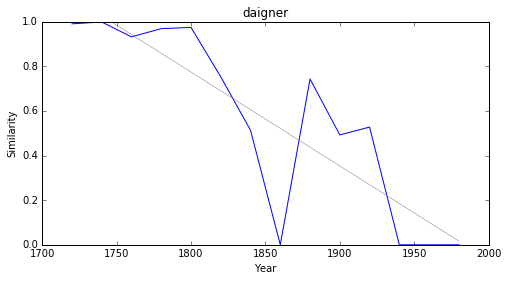

### <i><b>critique</i></b>

             token     slope         p
133       monarque -0.005348  0.000028
741             an -0.004880  0.000009
804       vertueux -0.004554  0.000714
230             où -0.004454  0.000387
570      françoise -0.004384  0.000890
96          avoyer -0.004365  0.000915
561            sur -0.004160  0.000569
432           deux -0.003996  0.000142
893  perfectionner -0.003988  0.000230
503     modération -0.003941  0.000356



monarque


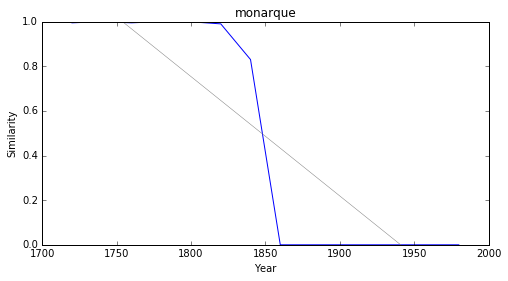

an


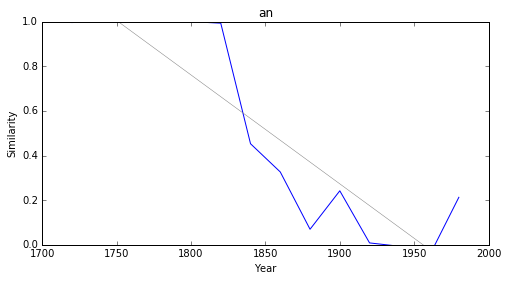

vertueux


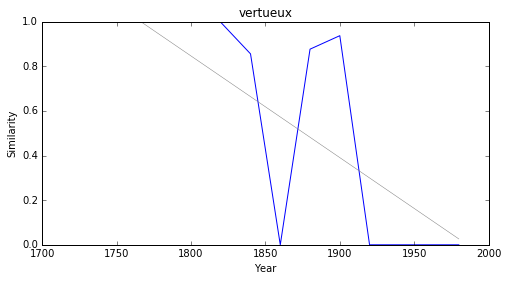

où


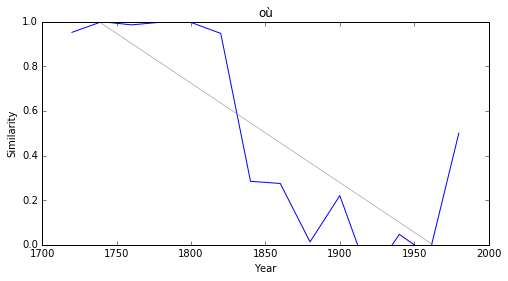

françoise


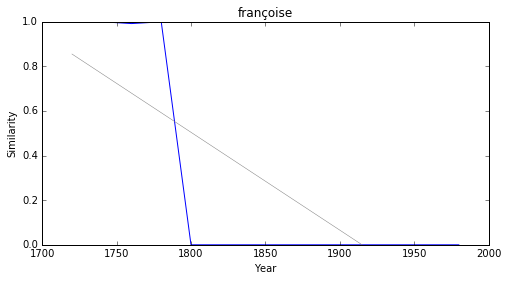

avoyer


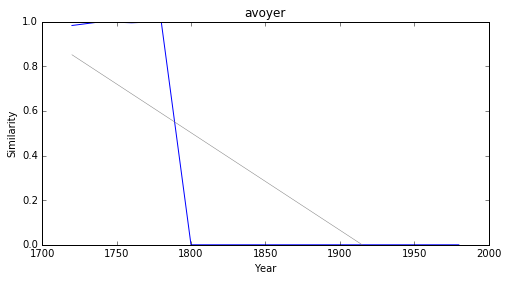

sur


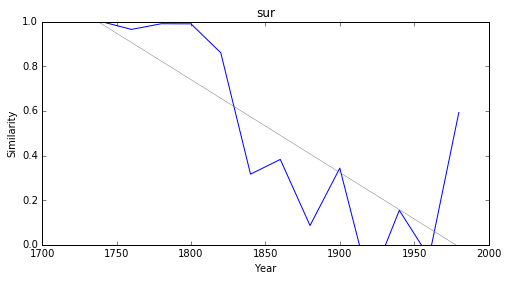

deux


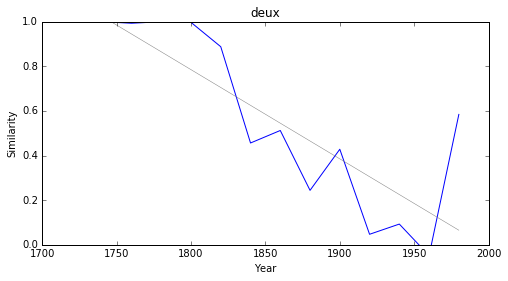

perfectionner


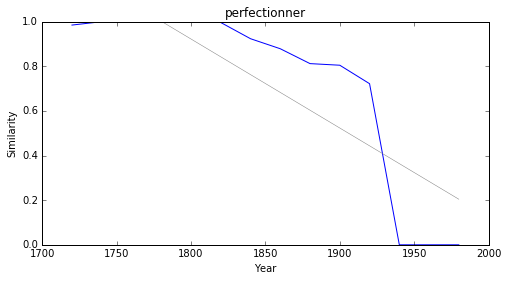

modération


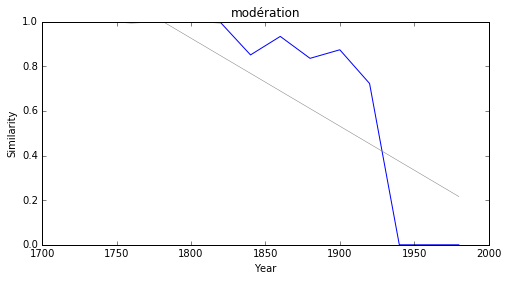

### <i><b>esprit</i></b>

         token     slope         p
432         au -0.005647  0.000057
487      après -0.005413  0.000077
18      depuis -0.005301  0.000076
362   monarque -0.005261  0.000018
119  émulation -0.005227  0.000015
456       deux -0.005045  0.000079
264      année -0.004969  0.000074
638         où -0.004899  0.000303
167    premier -0.004788  0.000104
322          à -0.004624  0.000070



au


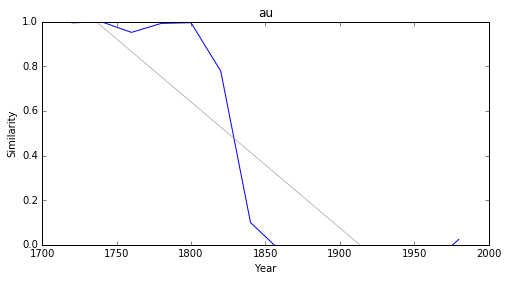

après


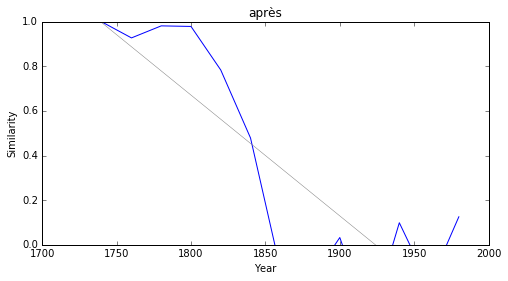

depuis


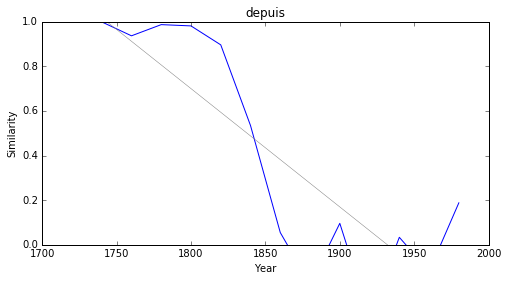

monarque


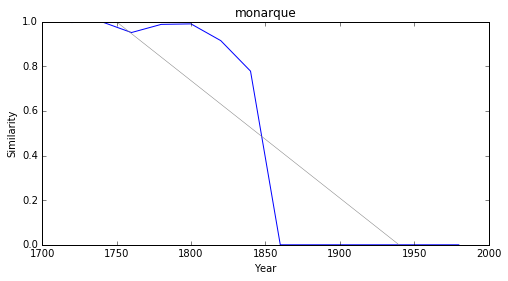

émulation


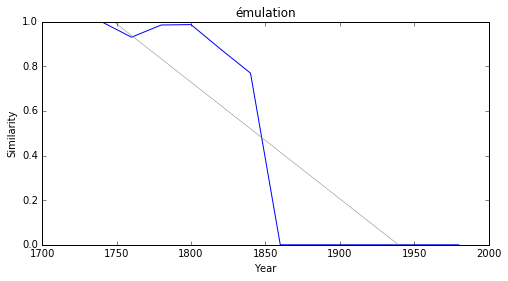

deux


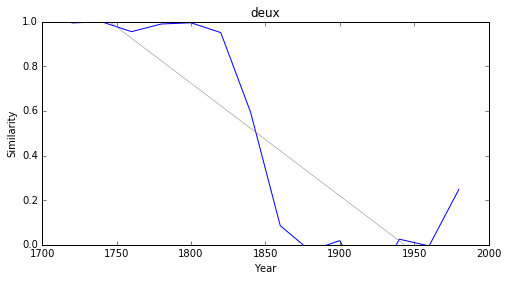

année


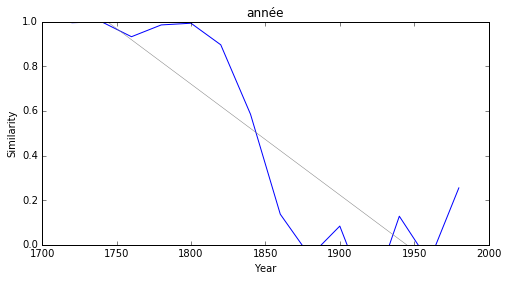

où


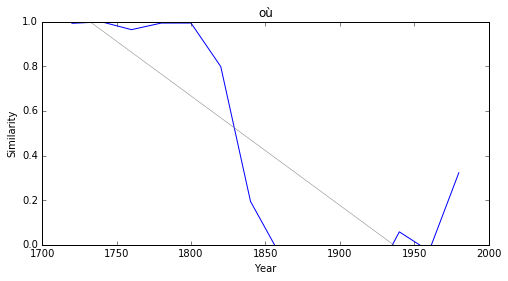

premier


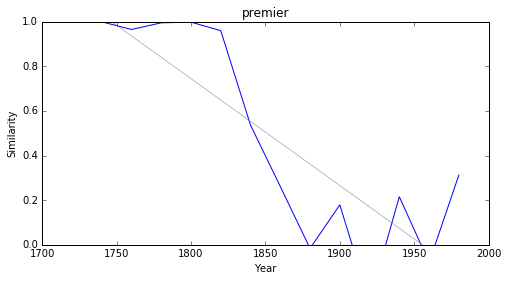

à


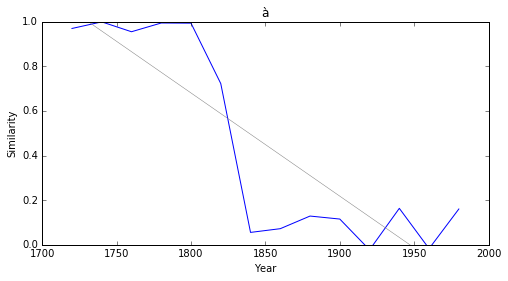

### <i><b>langue</i></b>

         token     slope         p
416   monarque -0.005266  0.000059
131  émulation -0.005228  0.000053
684      cette -0.004510  0.000139
4          aux -0.004373  0.000097
489         du -0.004349  0.000034
192  françoise -0.004332  0.000945
756    aujourd -0.004278  0.000109
255     avoyer -0.004240  0.001063
467  concourir -0.004194  0.003080
347      leurs -0.004148  0.000074



monarque


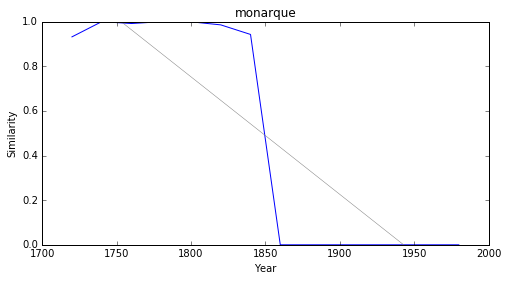

émulation


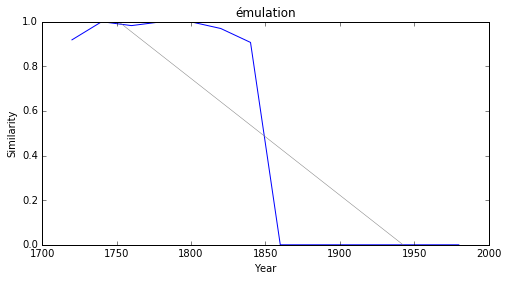

cette


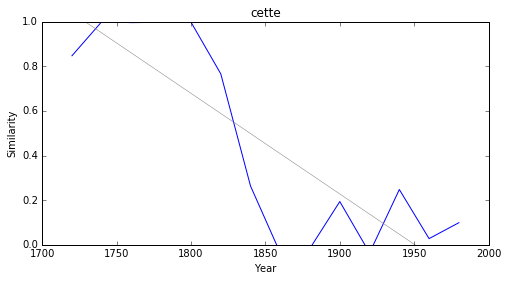

aux


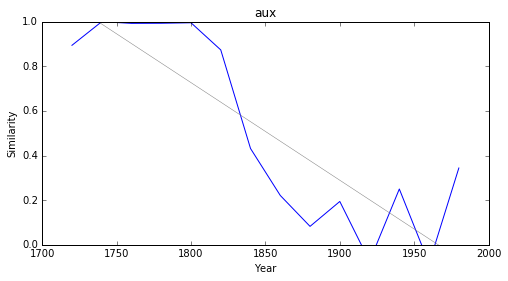

du


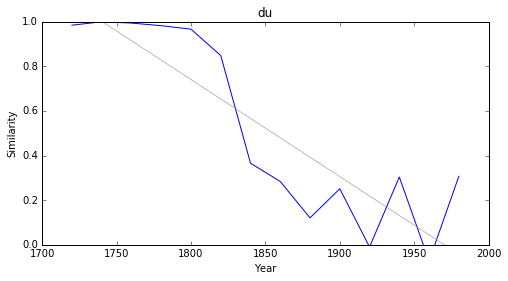

françoise


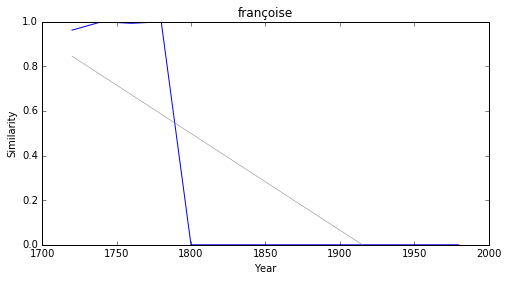

aujourd


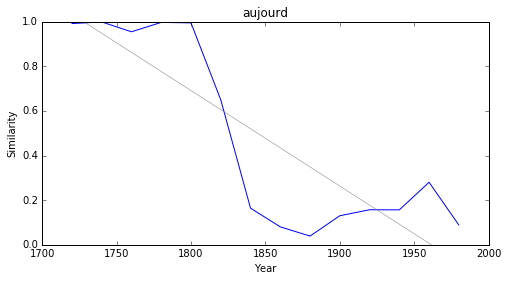

avoyer


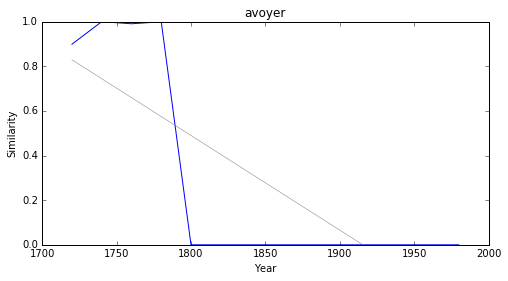

concourir


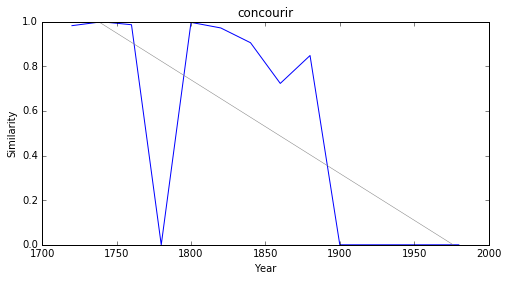

leurs


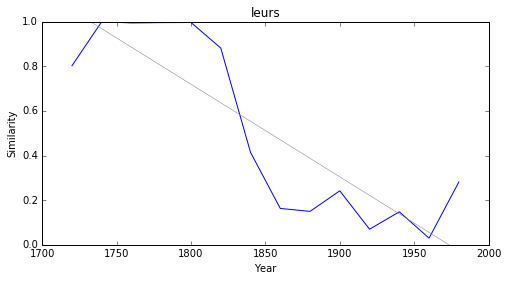

### <i><b>politique</i></b>

             token     slope         p
436       monarque -0.005359  0.000033
817             an -0.005110  0.000019
287         avoyer -0.004385  0.000897
585          après -0.004321  0.000127
694       quelques -0.004261  0.000201
311         écrire -0.004171  0.000019
405          aller -0.004170  0.000084
360          mieux -0.004144  0.000194
463  perfectionner -0.004125  0.000024
204           donc -0.004083  0.000200



monarque


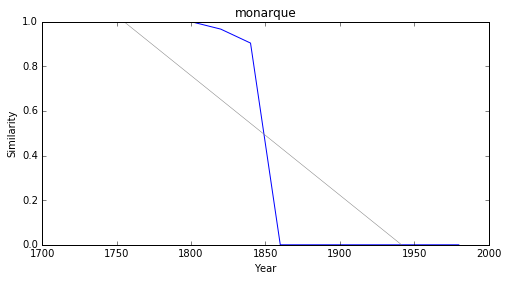

an


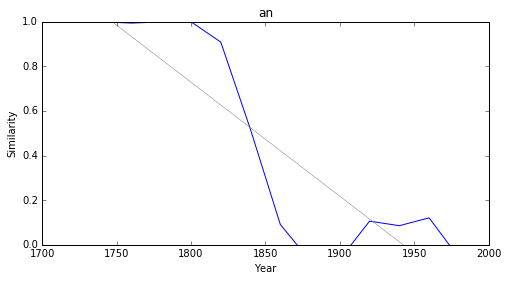

avoyer


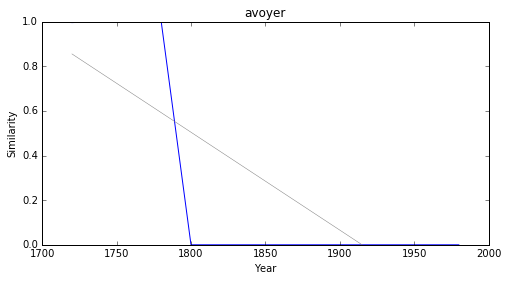

après


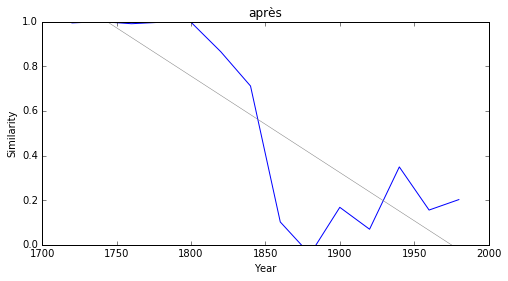

quelques


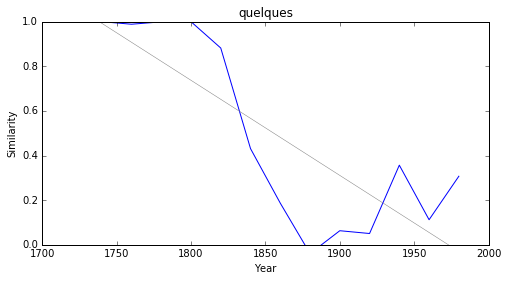

écrire


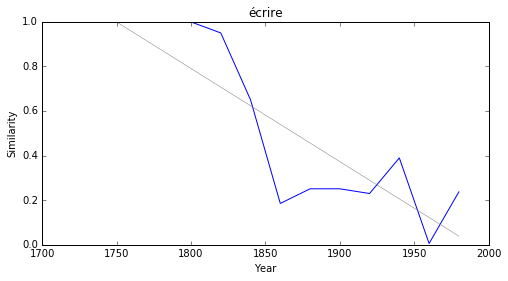

aller


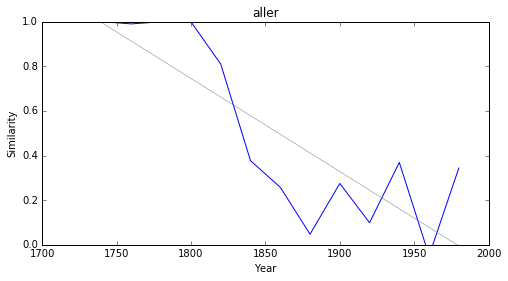

mieux


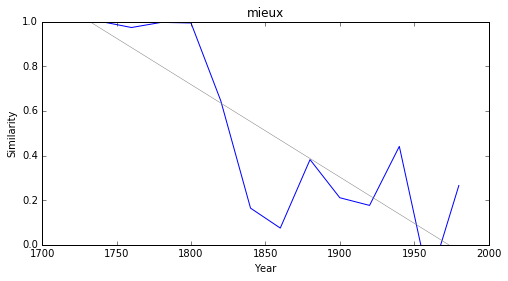

perfectionner


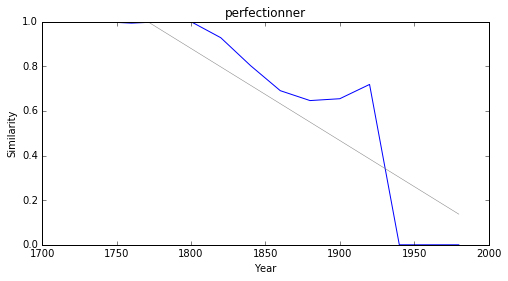

donc


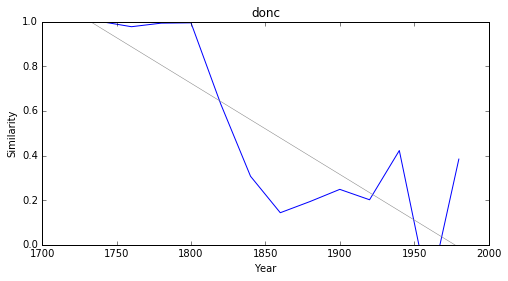

### <i><b>pouvoir</i></b>

        token     slope         p
390     louis -0.005923  0.000007
117       vos -0.005837  0.000019
227     votre -0.005734  0.000045
493        an -0.005700  0.000016
127   premier -0.005442  0.000005
142       mon -0.005192  0.000004
352     après -0.004938  0.000003
413  quelques -0.004904  0.000028
341       son -0.004883  0.000104
202       nos -0.004828  0.000505



louis


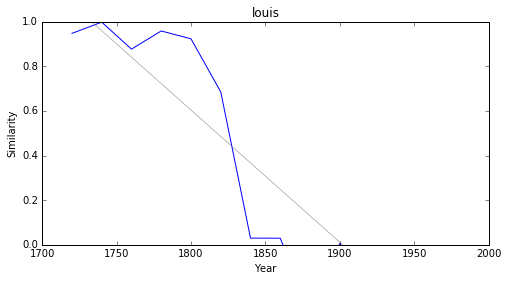

vos


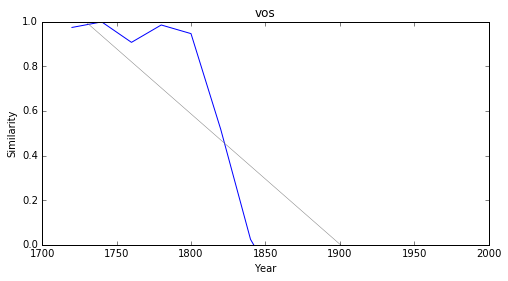

votre


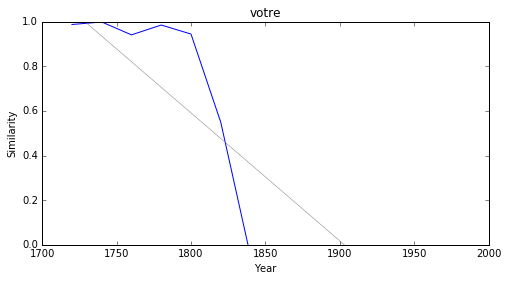

an


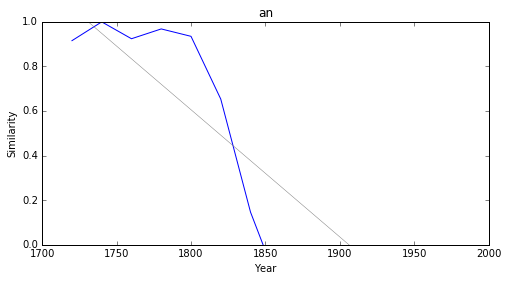

premier


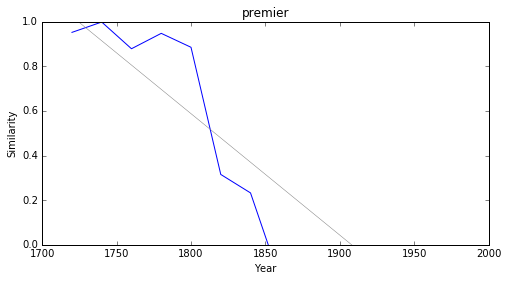

mon


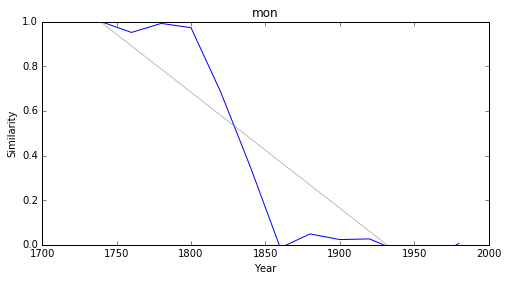

après


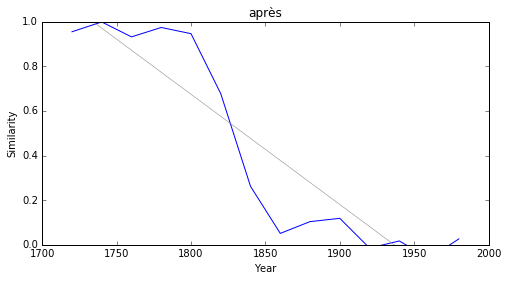

quelques


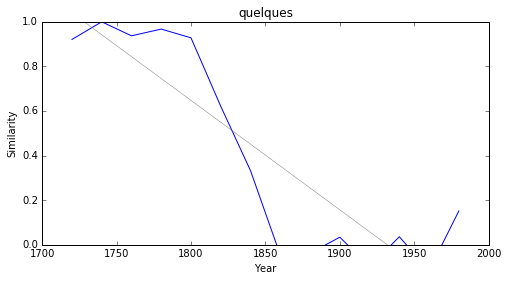

son


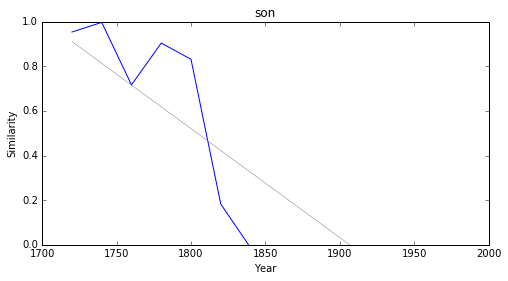

nos


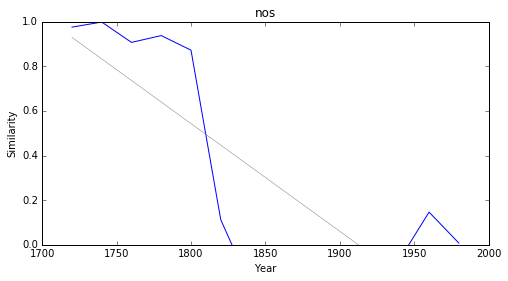

### <i><b>droit</i></b>

             token     slope         p
125      émulation -0.005359  0.000031
746             an -0.004807  0.000224
238         avoyer -0.004386  0.000892
304          notre -0.004304  0.000227
627       quelques -0.004163  0.001644
404  perfectionner -0.004086  0.000074
496           deux -0.004002  0.000189
8             dont -0.003960  0.000358
734           sans -0.003941  0.000022
202       précepte -0.003906  0.002010



émulation


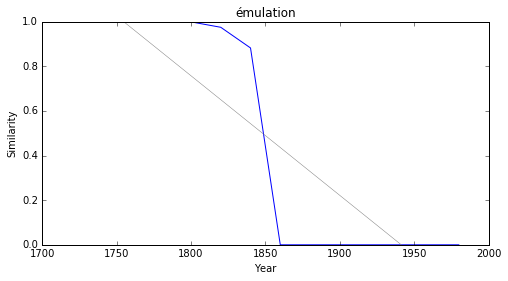

an


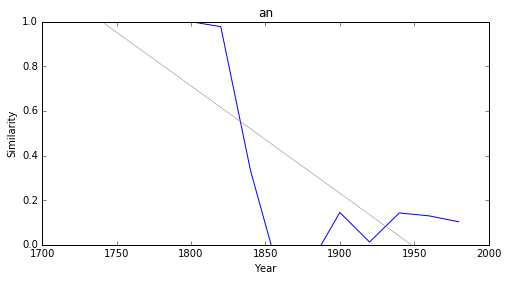

avoyer


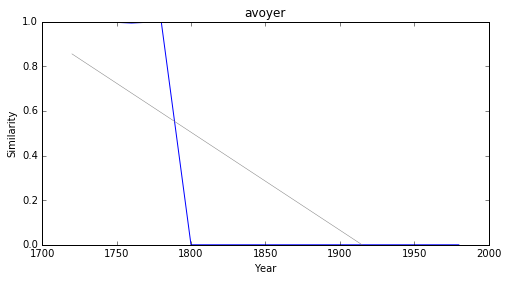

notre


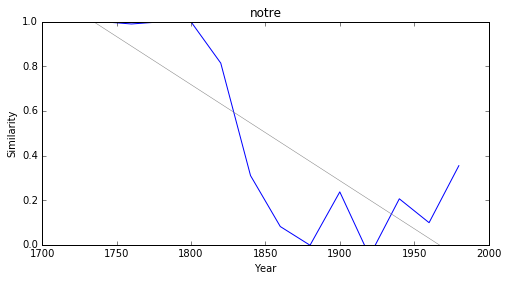

quelques


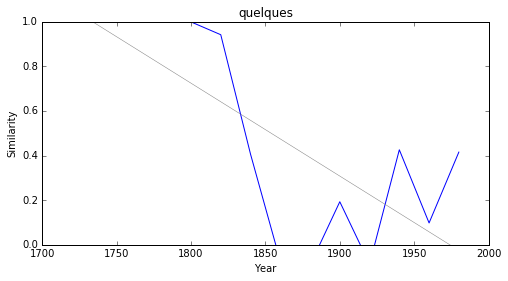

perfectionner


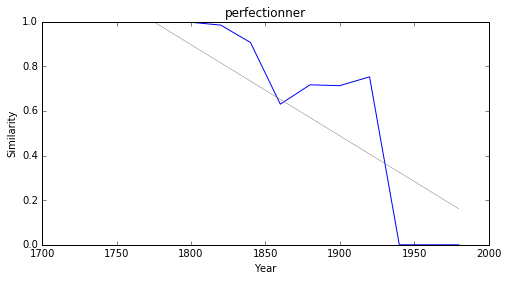

deux


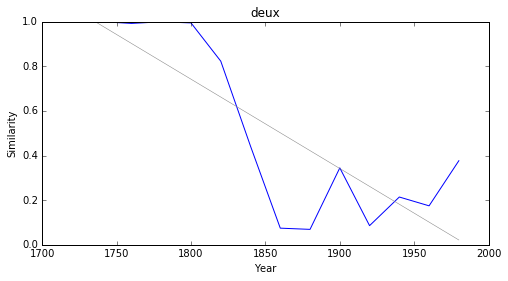

dont


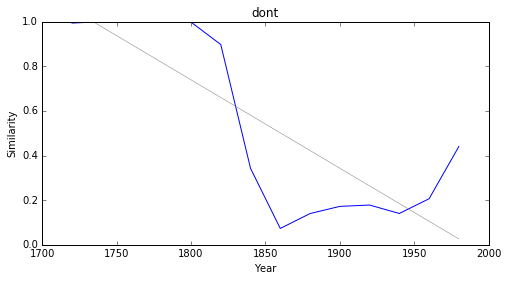

sans


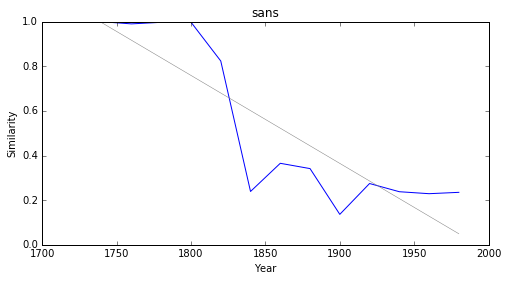

précepte


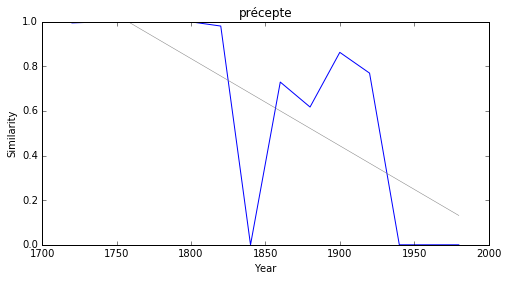

### <i><b>loi</i></b>

             token     slope         p
427       monarque -0.005338  0.000024
796             an -0.004498  0.000077
265         avoyer -0.004385  0.000897
344          notre -0.004045  0.000011
756             où -0.004039  0.000241
457  perfectionner -0.004024  0.000050
375              à -0.003851  0.000382
671       quelques -0.003813  0.001268
582          après -0.003649  0.000333
4              aux -0.003466  0.000127



monarque


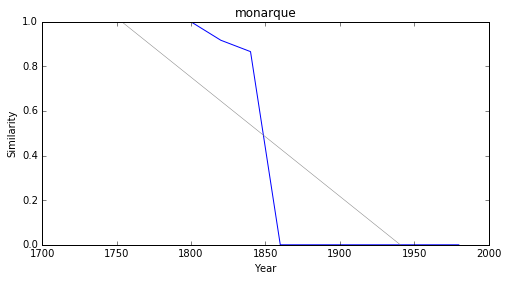

an


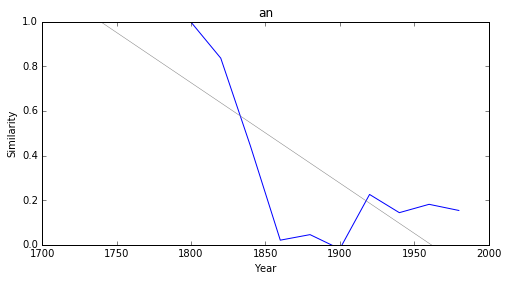

avoyer


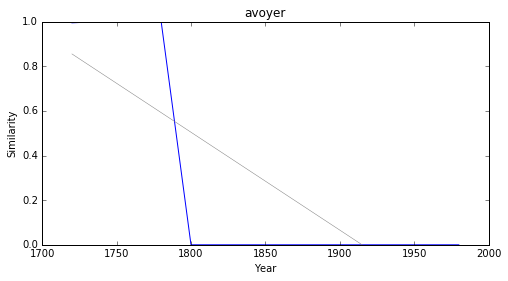

notre


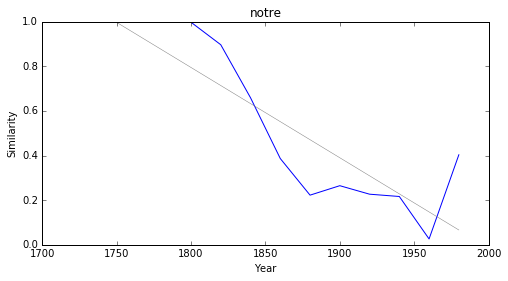

où


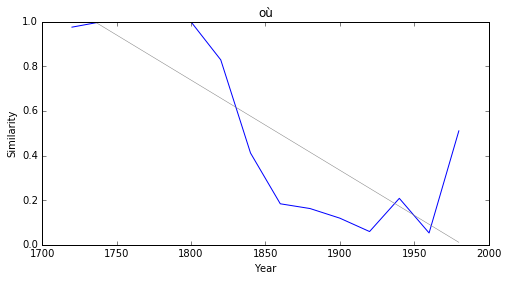

perfectionner


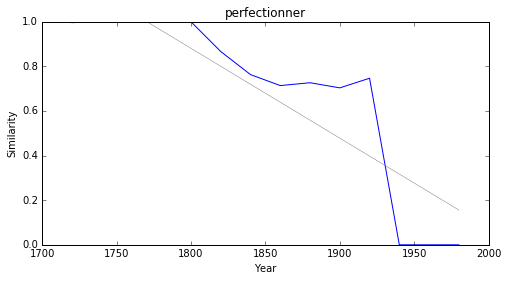

à


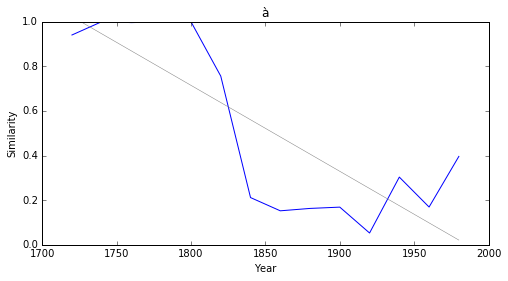

quelques


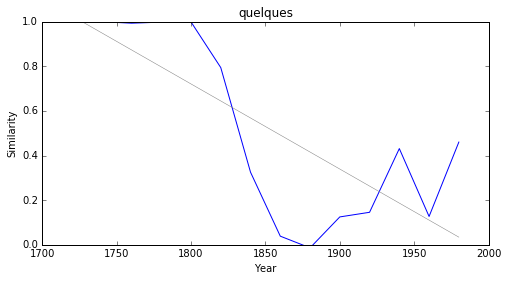

après


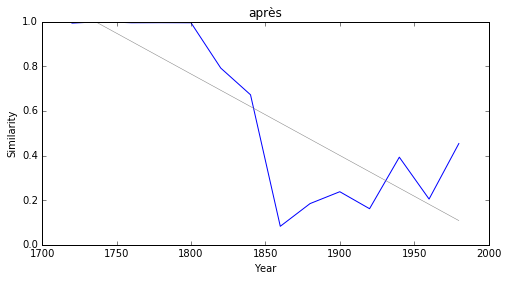

aux


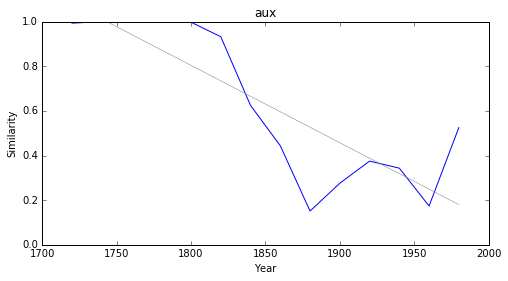

### <i><b>génie</i></b>

         token     slope         p
395   monarque -0.005348  0.000029
126  émulation -0.005328  0.000027
750         an -0.004915  0.000027
714         où -0.004439  0.000077
237     avoyer -0.004378  0.000889
469         du -0.004370  0.000005
650      cette -0.004219  0.000689
319      notre -0.004142  0.000016
623   quelques -0.004141  0.001512
5          aux -0.004114  0.000022



monarque


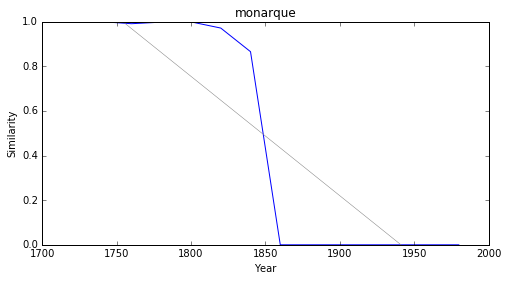

émulation


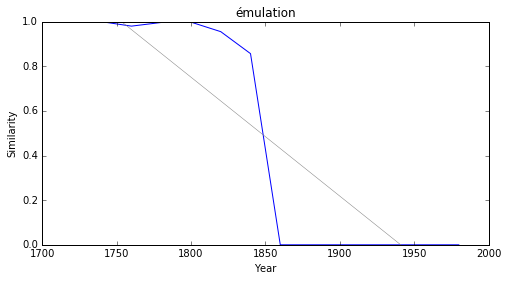

an


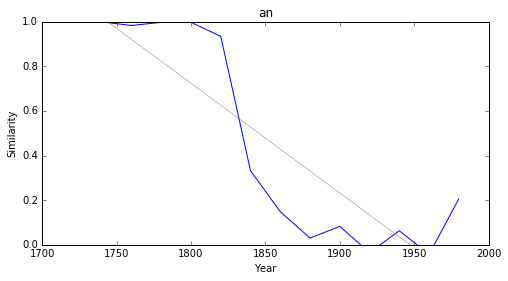

où


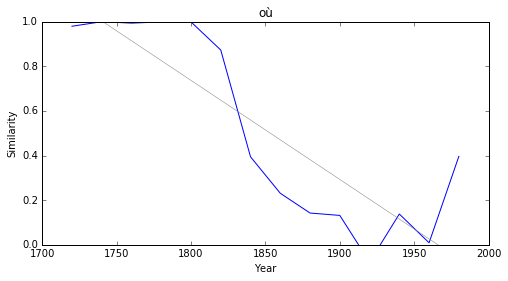

avoyer


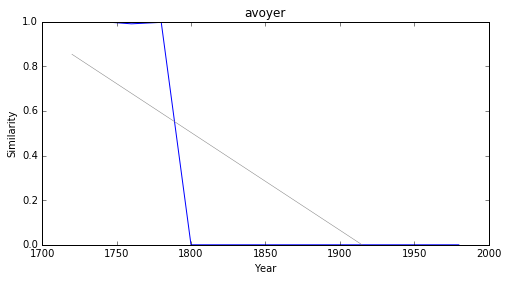

du


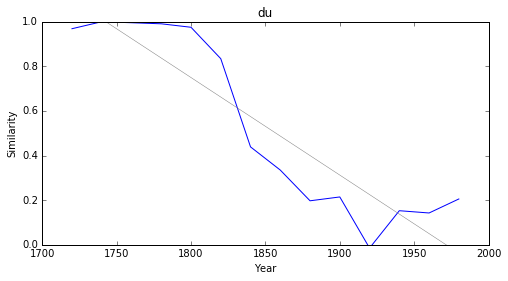

cette


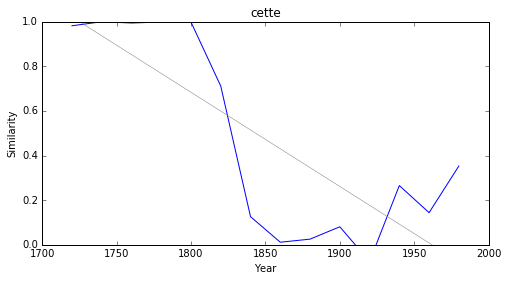

notre


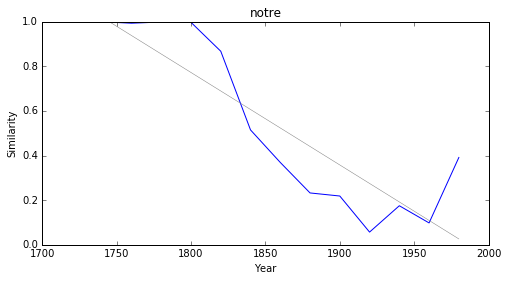

quelques


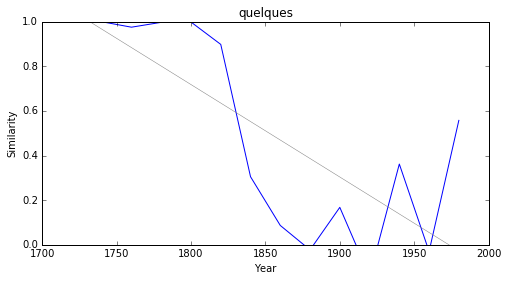

aux


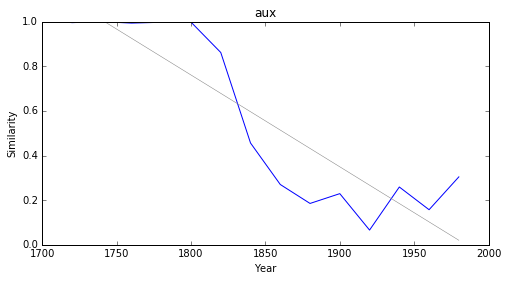

In [11]:
for word in testList :
    display(Markdown("### <i><b>"+word+"</i></b>"))
    df2 = pd.DataFrame(entries[word], columns=('token', 'slope', 'p'))
    print(df2.sort_values('slope', ascending=True).head(10))
    print('\n\n')
    
    for i, row in df2.sort_values('slope', ascending=True).head(10).iterrows():
        plot_cosine_series(word, row['token'], 8, 4)

# Intersected neighbors

In this part, we show which significant terms tend to be, throughout time, the nearest neighbours to the main entry. That is to say that these vectors follow the same evolution through time as the main entry and are very near to the "littérature" vector. At this stage, we only ask for significant terms (filter above : "if fit.pvalues[1] < 0.05").

In [12]:
def intersect_neighbor_vocab(anchor, topn=2000):
    
    vocabs = []
    
    for year, model in models.items():
        similar = model.most_similar(anchor, topn=topn)
        vocabs.append(set([s[0] for s in similar]))
        
    return set.intersection(*vocabs)

In [13]:
entries={}

for word in testList:
    data = []
    for token in intersect_neighbor_vocab(word):
    
        series = cosine_series(word, token)
        fit = lin_reg(series)
    
        if fit.pvalues[1] < 0.05:
            data.append((token, fit.params[1], fit.pvalues[1]))
    entries[word]=data

In [14]:
import pandas as pd

### <i><b>littérature</i></b>

        token     slope         p
36     langue -0.000282  0.017420
22    univers -0.000358  0.008763
19      image -0.000359  0.044790
21    qualité -0.000407  0.007795
5      patrie -0.000410  0.003119
51    langage -0.000430  0.014317
52        don -0.000442  0.009857
3   espérance -0.000462  0.008445
2   caractère -0.000468  0.007240
24     beauté -0.000477  0.000357



langue


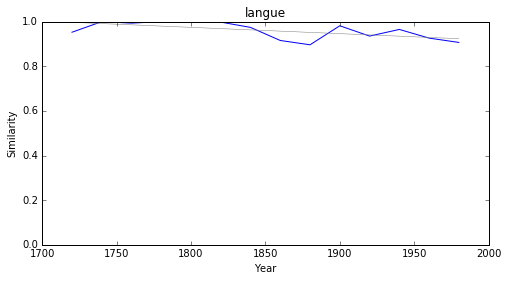

univers


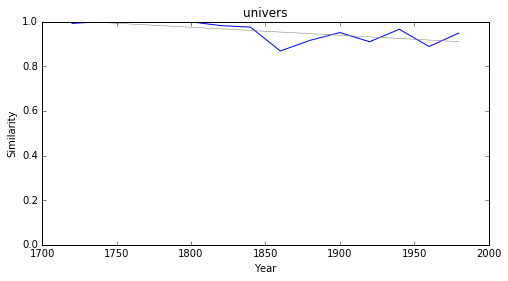

image


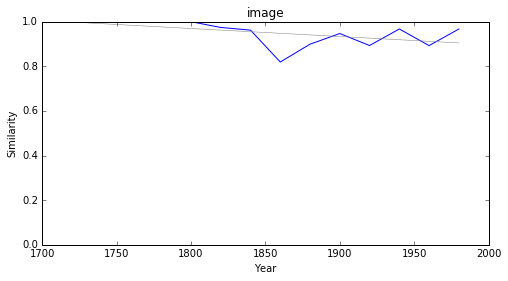

qualité


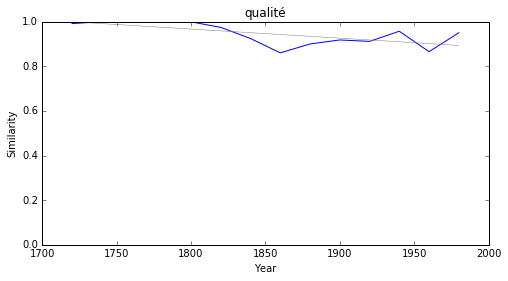

patrie


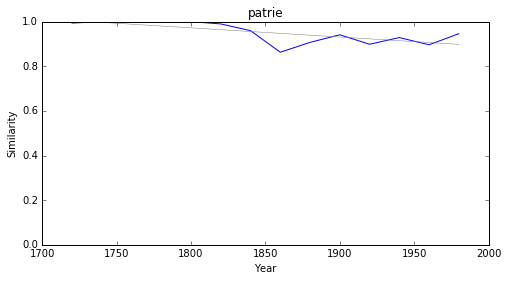

langage


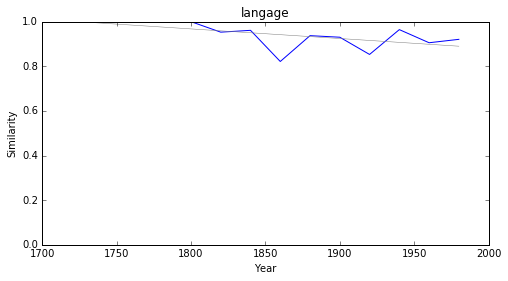

don


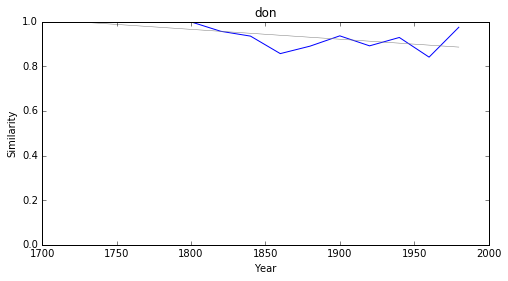

espérance


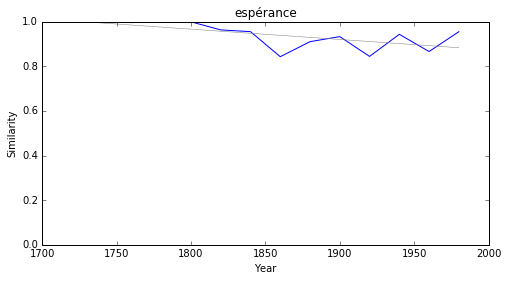

caractère


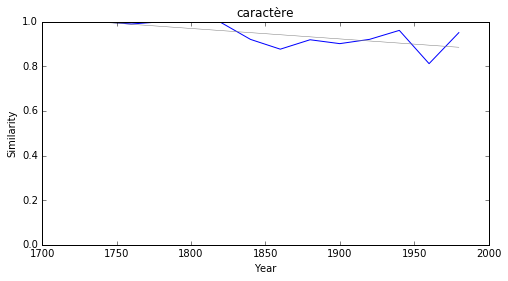

beauté


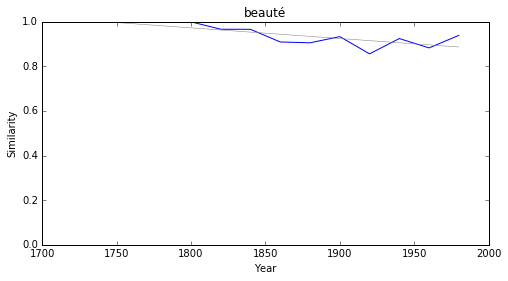

### <i><b>science</i></b>

        token     slope         p
44    société -0.000464  0.017859
59     action -0.000478  0.005139
56     nation -0.000535  0.002742
55   religion -0.000549  0.000445
34        art -0.000550  0.000204
48     langue -0.000555  0.002520
4   politique -0.000596  0.013046
6         loi -0.000604  0.003087
28      forme -0.000626  0.006946
50   grandeur -0.000628  0.000994



société


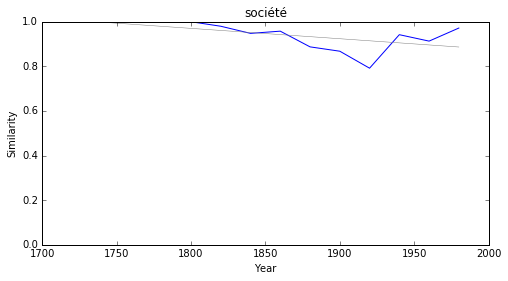

action


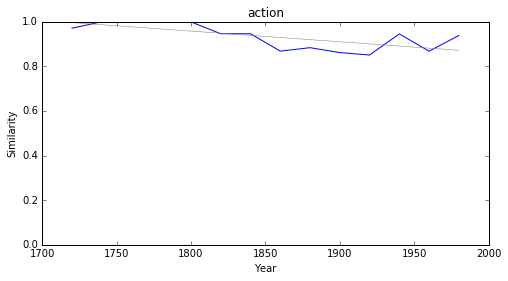

nation


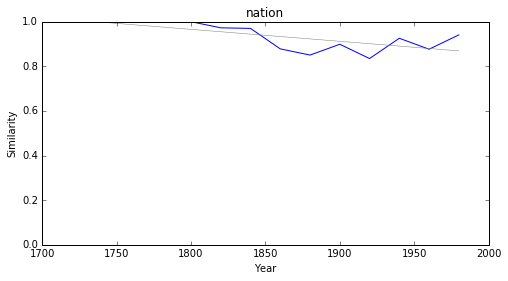

religion


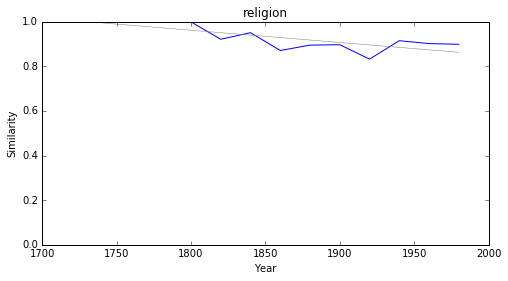

art


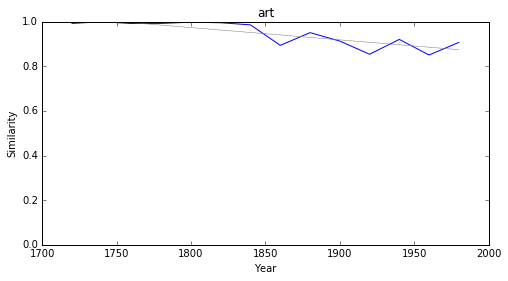

langue


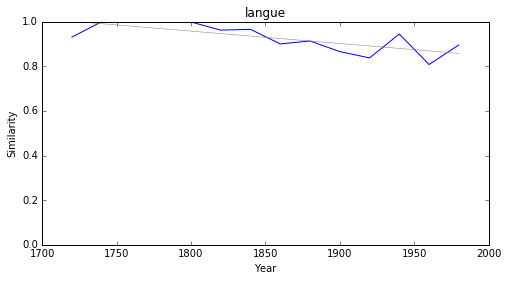

politique


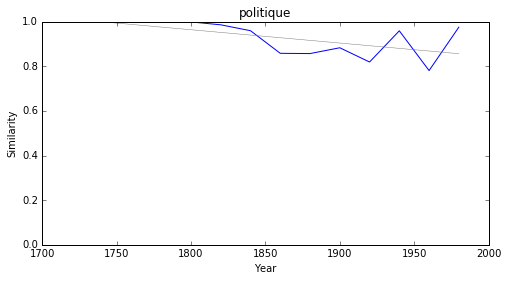

loi


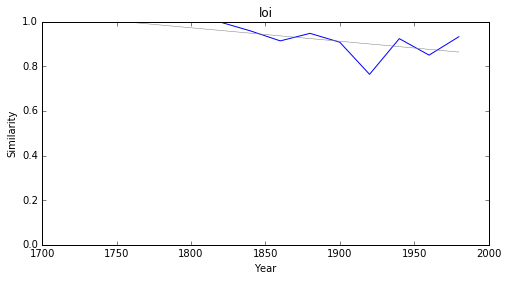

forme


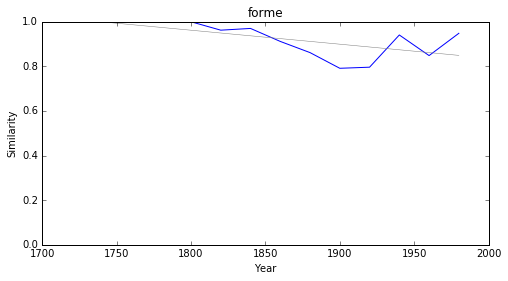

grandeur


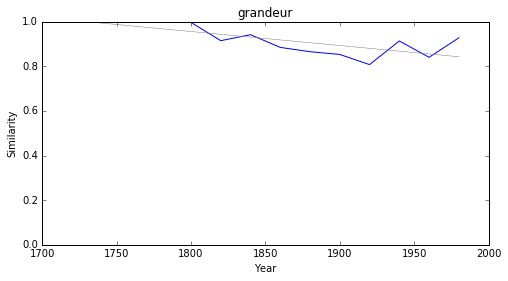

### <i><b>savoir</i></b>

           token     slope         p
54       vouloir -0.000384  0.000448
228       croire -0.000448  0.000118
11     connaître -0.000513  0.000446
136        aimer -0.000575  0.001318
6        oublier -0.000576  0.000473
69      entendre -0.000593  0.001596
226     craindre -0.000619  0.000006
158      manquer -0.000634  0.001200
134      ignorer -0.000665  0.015294
175  reconnaître -0.000679  0.001343



vouloir


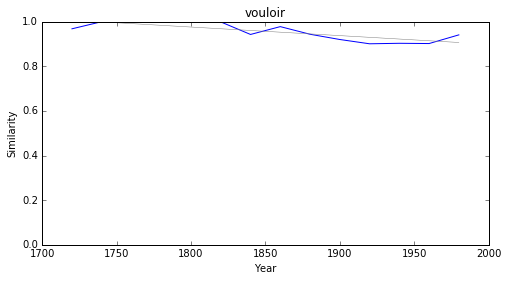

croire


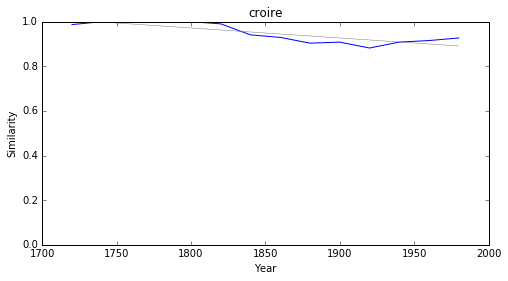

connaître


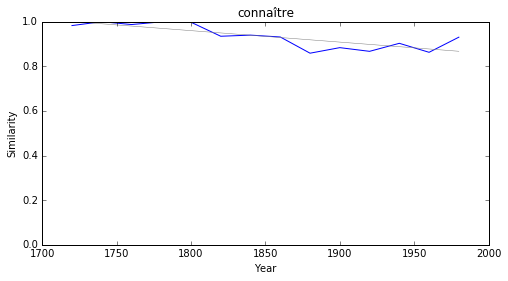

aimer


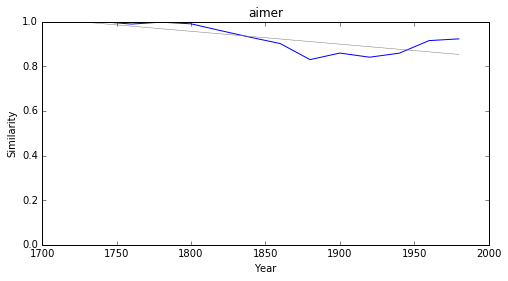

oublier


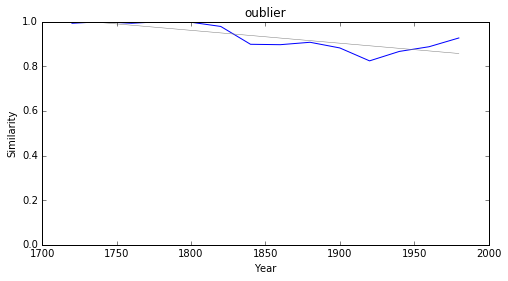

entendre


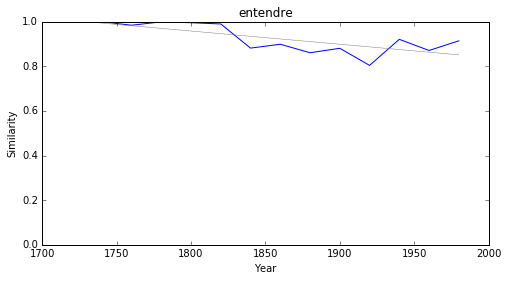

craindre


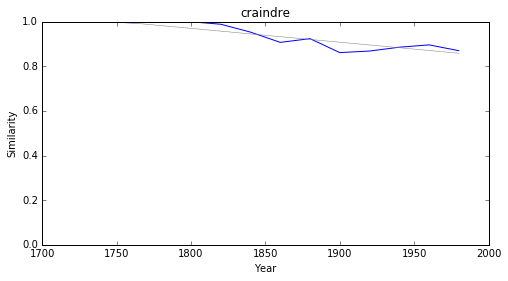

manquer


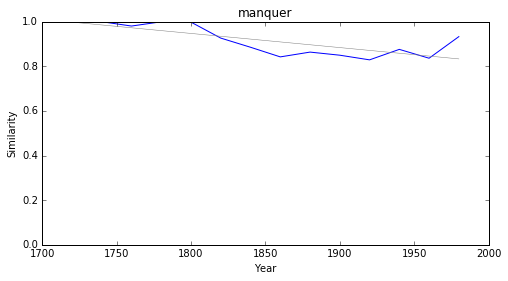

ignorer


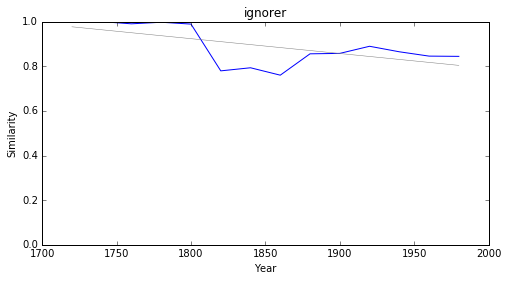

reconnaître


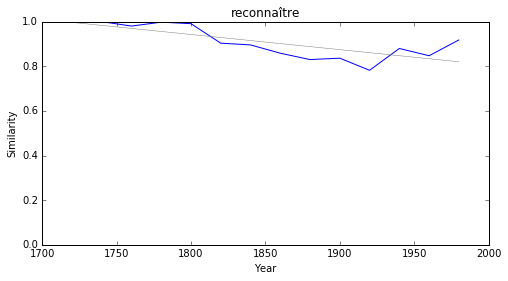

### <i><b>histoire</i></b>

          token     slope         p
56       langue -0.000725  0.006179
77          art -0.000738  0.016382
45      science -0.000793  0.016904
46  littérature -0.000822  0.001318
8       univers -0.000829  0.024863
2        patrie -0.000852  0.007920
12      société -0.000860  0.022038
28        terre -0.000880  0.043278
66       lettre -0.000881  0.001647
44      dignité -0.000947  0.006643



langue


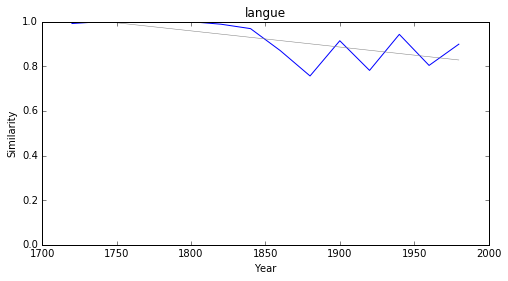

art


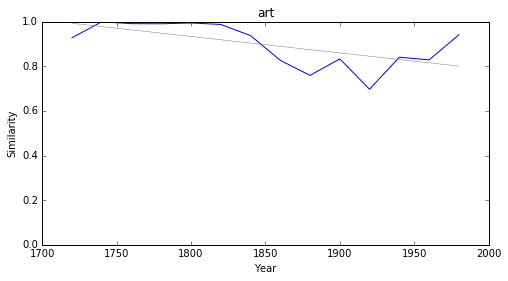

science


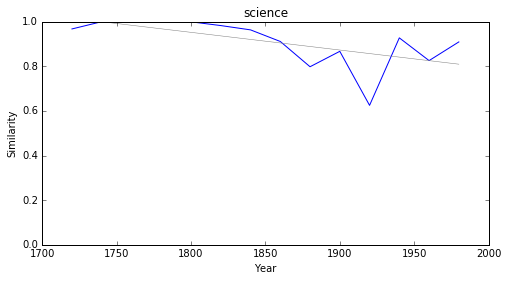

littérature


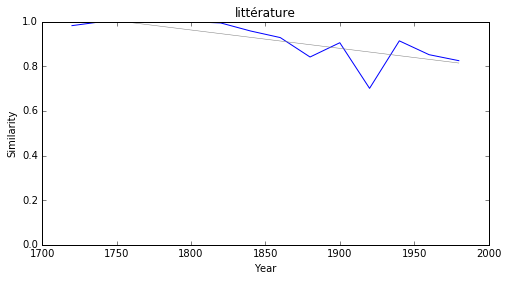

univers


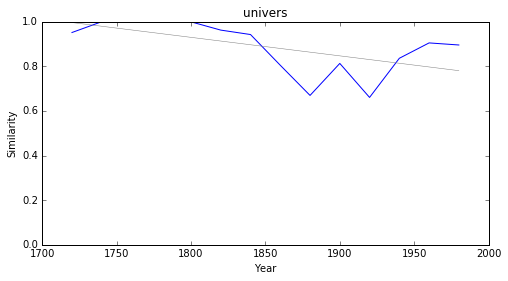

patrie


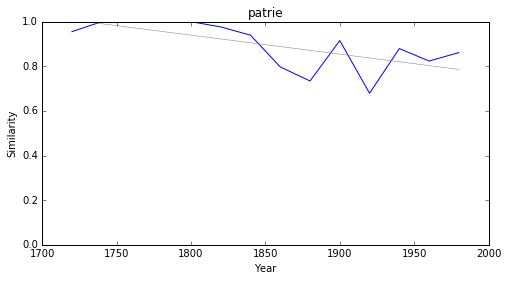

société


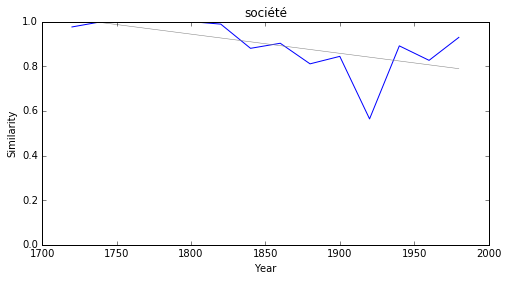

terre


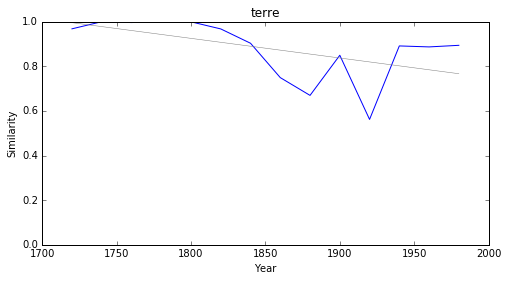

lettre


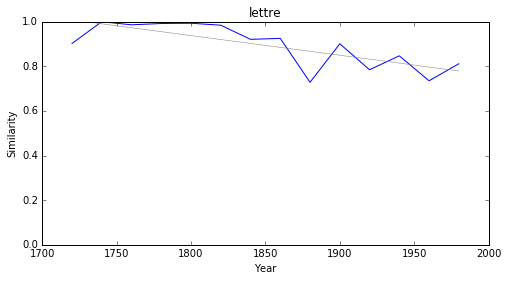

dignité


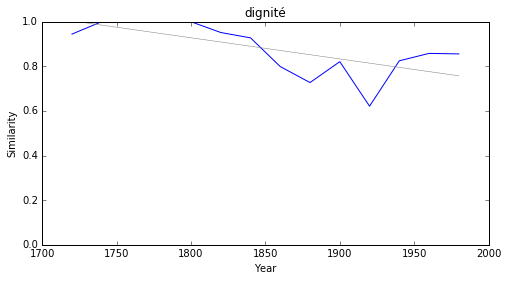

### <i><b>lettre</i></b>

          token     slope         p
20        trait -0.000402  0.024242
25       partie -0.000412  0.029246
11    recherche -0.000417  0.027924
24        héros -0.000442  0.012062
38     destiner -0.000444  0.019457
18         côté -0.000472  0.026340
37       traité -0.000480  0.021739
12    éducation -0.000492  0.010948
32      charger -0.000501  0.048159
27  imagination -0.000503  0.004697



trait


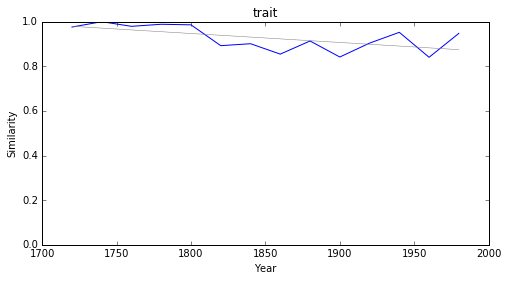

partie


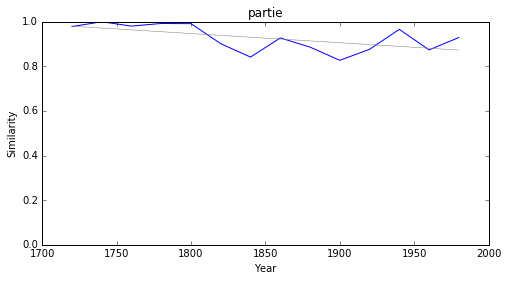

recherche


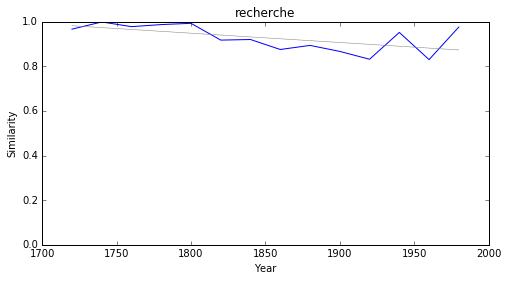

héros


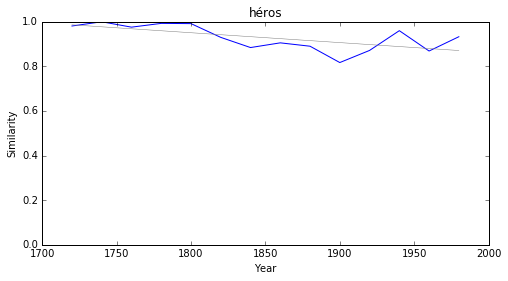

destiner


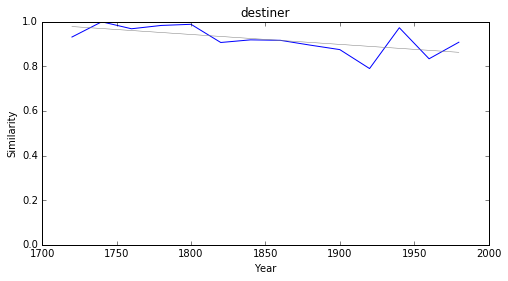

côté


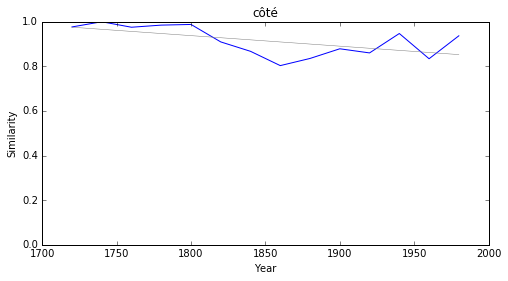

traité


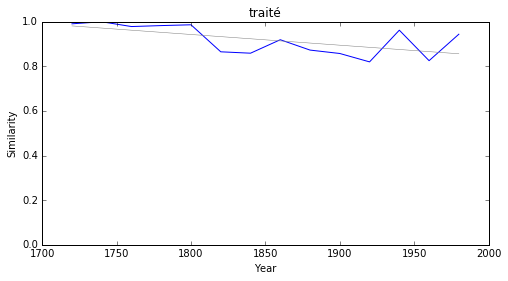

éducation


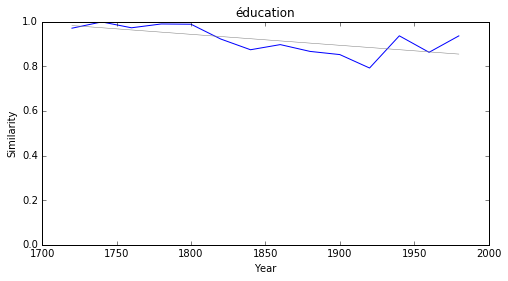

charger


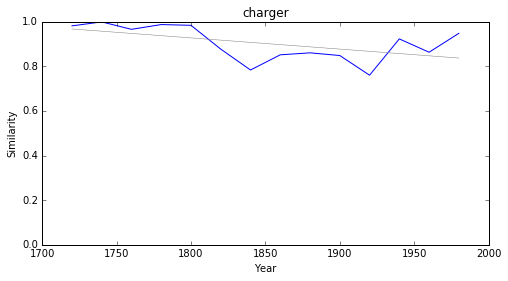

imagination


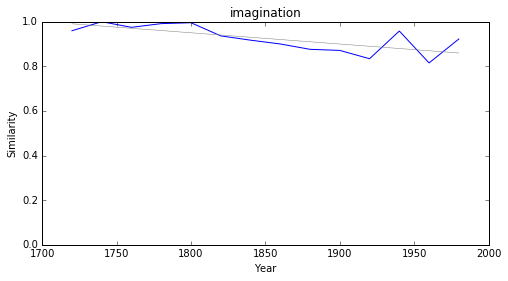

### <i><b>critique</i></b>

          token     slope         p
12        règle -0.000550  0.005382
8        beauté -0.000559  0.005562
6         trait -0.000595  0.003677
17      profond -0.000606  0.006997
14      douceur -0.000636  0.007083
11  particulier -0.000663  0.011756
3     véritable -0.000680  0.008775
9        modèle -0.000685  0.006417
13   perfection -0.000705  0.006239
2     espérance -0.000716  0.004804



règle


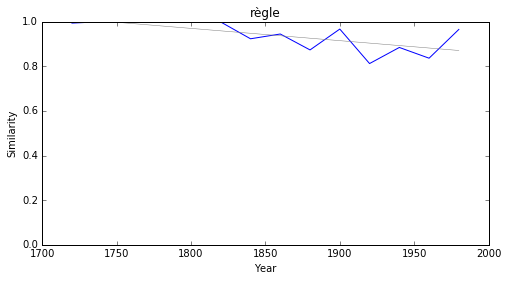

beauté


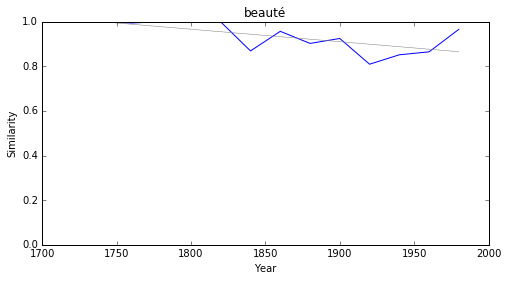

trait


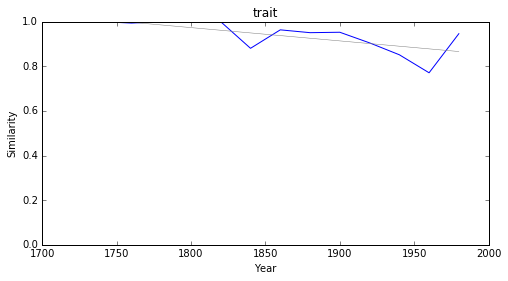

profond


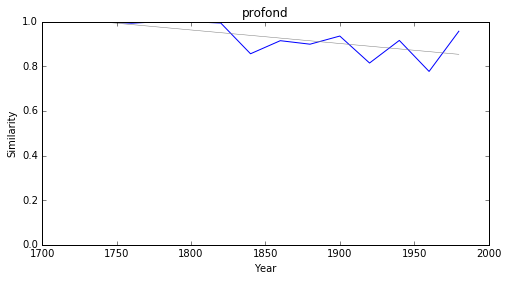

douceur


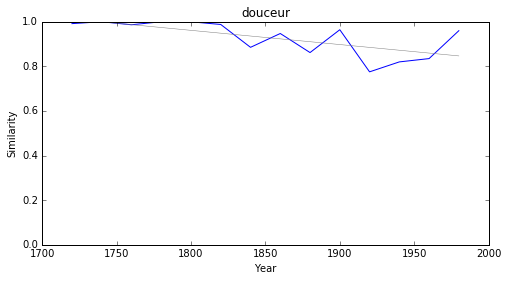

particulier


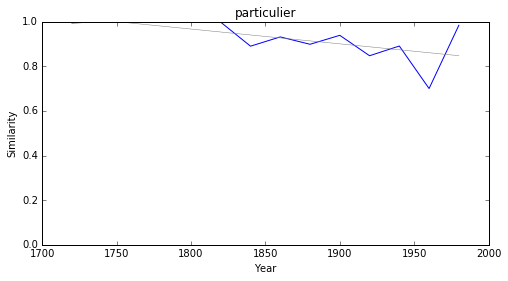

véritable


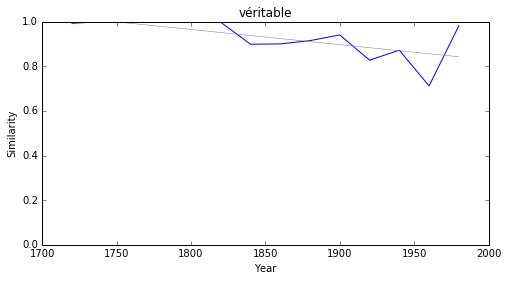

modèle


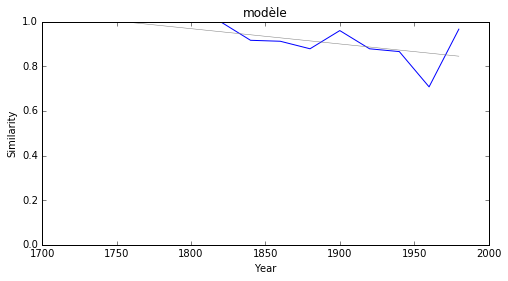

perfection


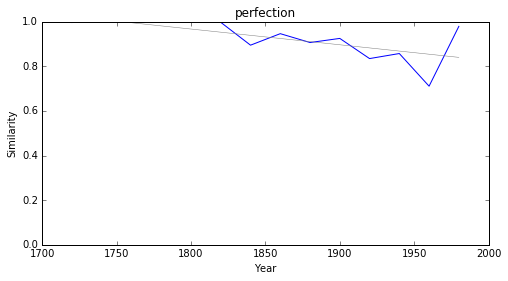

espérance


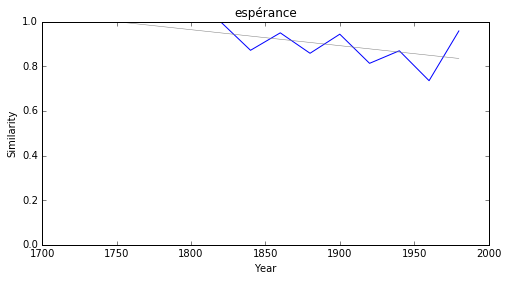

### <i><b>esprit</i></b>

         token     slope         p
86      nature -0.000359  0.005167
36       amour -0.000362  0.021600
103        art -0.000420  0.013728
51      action -0.000586  0.006601
102     beauté -0.000590  0.009604
112       goût -0.000621  0.001594
78      langue -0.000646  0.012348
61     science -0.000650  0.019212
50       génie -0.000664  0.003330
88   caractère -0.000666  0.000627



nature


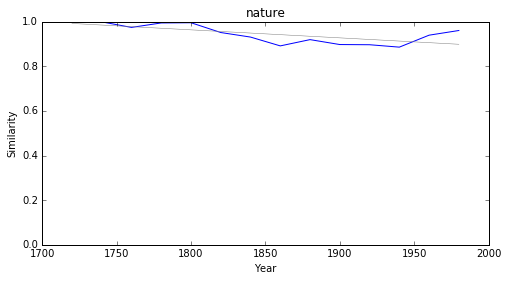

amour


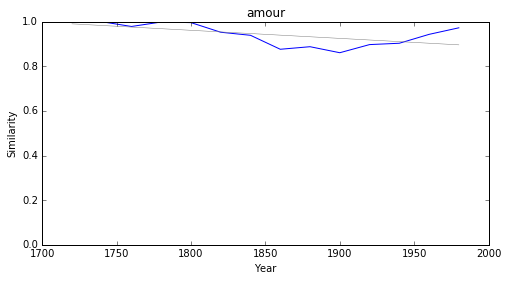

art


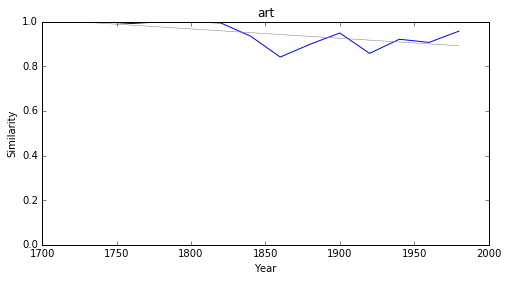

action


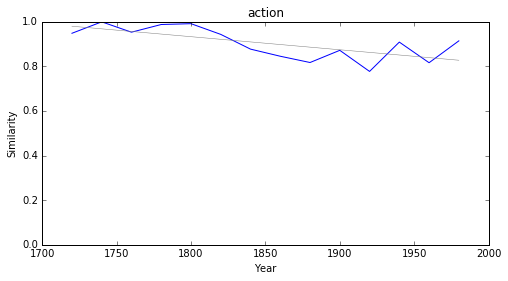

beauté


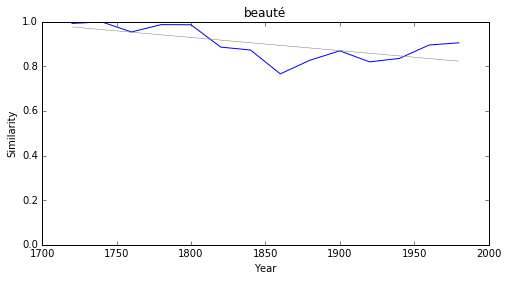

goût


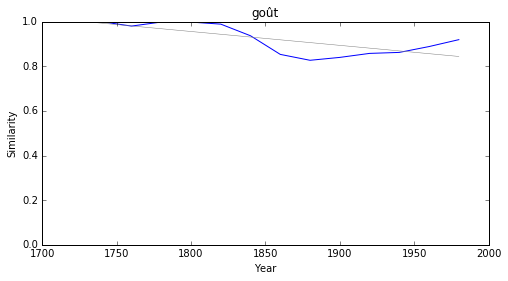

langue


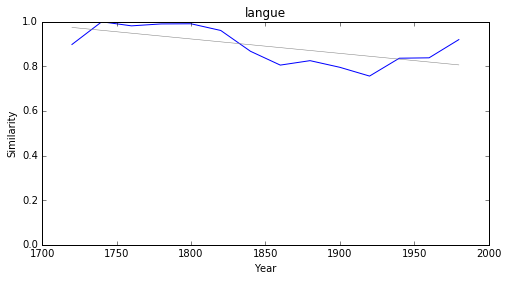

science


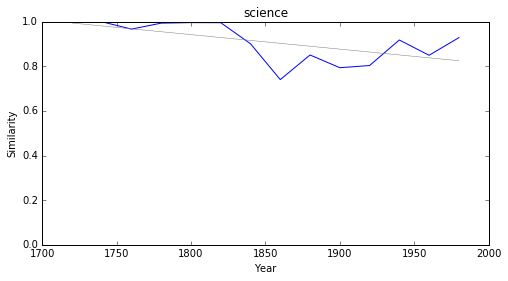

génie


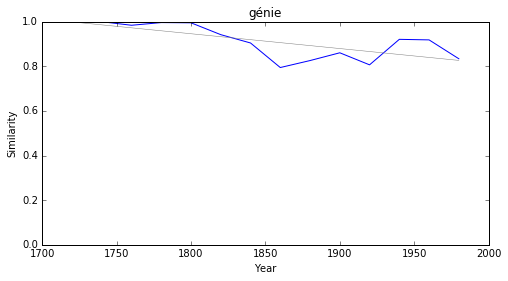

caractère


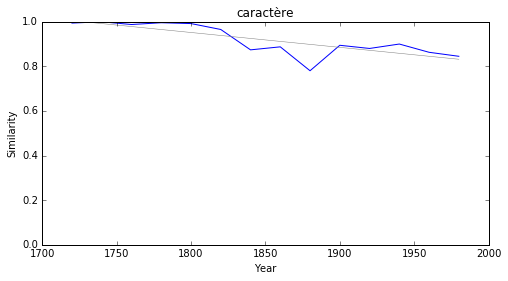

### <i><b>langue</i></b>

          token     slope         p
48  littérature -0.000282  0.017420
72      qualité -0.000295  0.024053
6         image -0.000314  0.043354
47      dignité -0.000320  0.025900
16      langage -0.000328  0.011648
78         goût -0.000335  0.009239
74        héros -0.000370  0.011563
49         pays -0.000390  0.011516
73       beauté -0.000399  0.003037
26    espérance -0.000416  0.000869



littérature


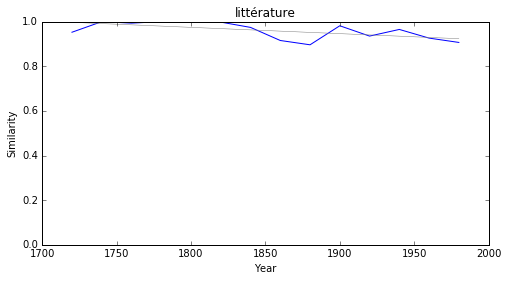

qualité


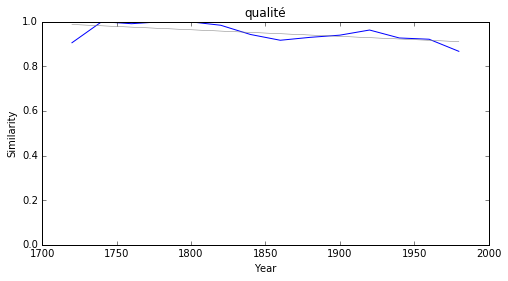

image


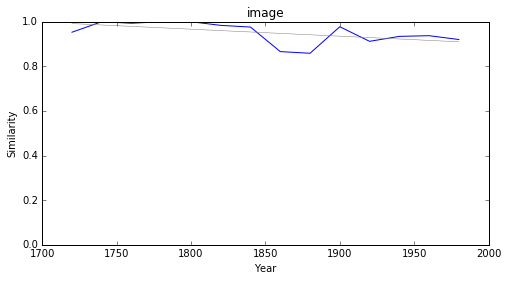

dignité


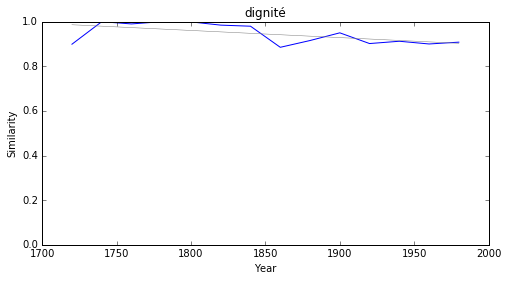

langage


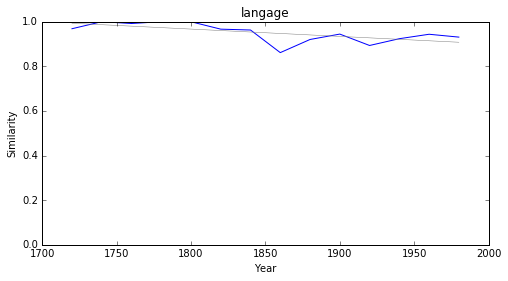

goût


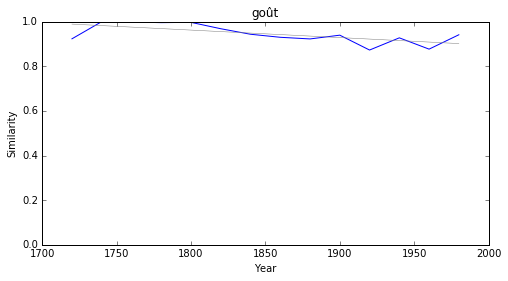

héros


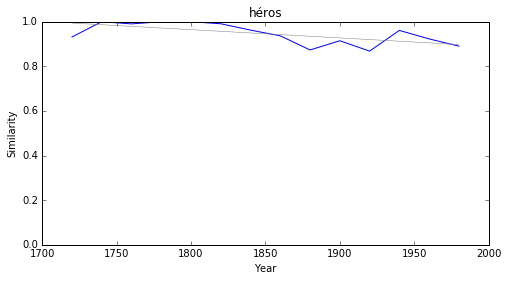

pays


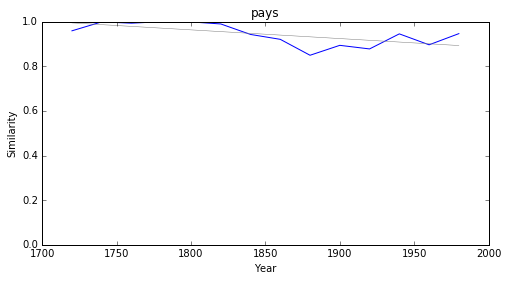

beauté


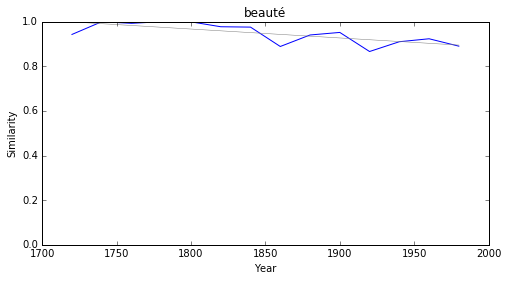

espérance


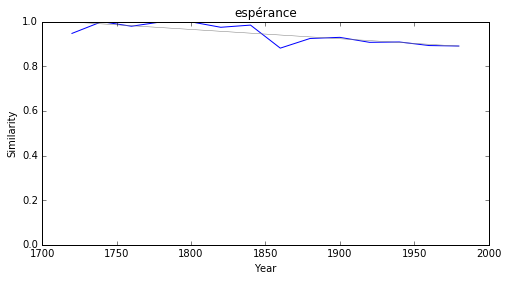

### <i><b>politique</i></b>

       token     slope         p
13      état -0.000519  0.005482
3    science -0.000596  0.013046
33   société -0.000616  0.007524
47    action -0.000623  0.004092
45    nation -0.000655  0.000427
10     ordre -0.000738  0.001287
43  religion -0.000741  0.001000
21     forme -0.000744  0.000816
38  grandeur -0.000757  0.002029
1     peuple -0.000799  0.003364



état


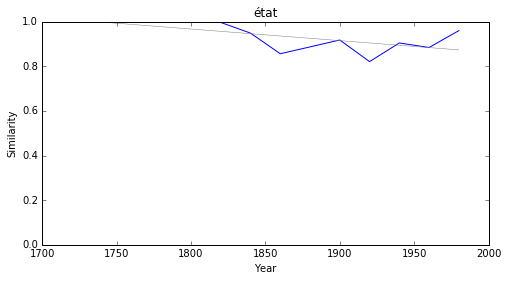

science


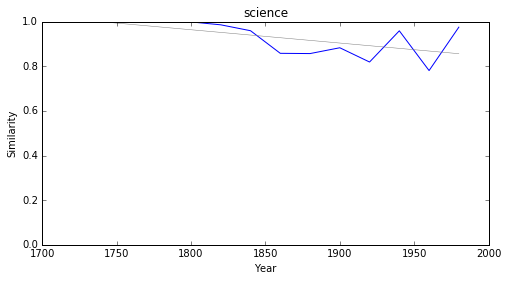

société


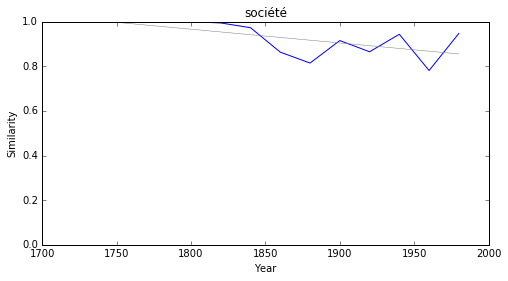

action


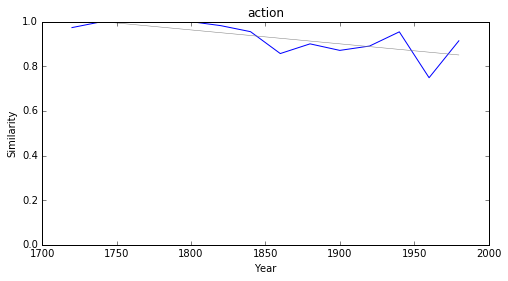

nation


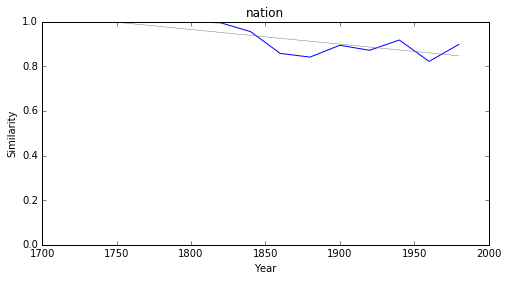

ordre


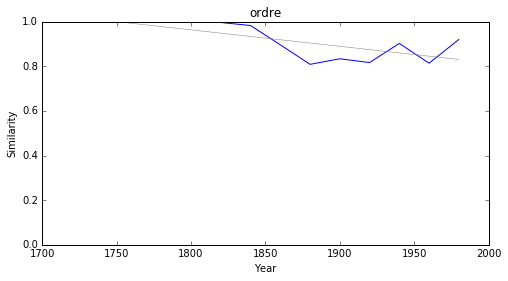

religion


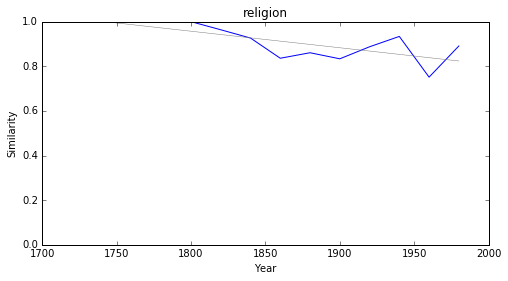

forme


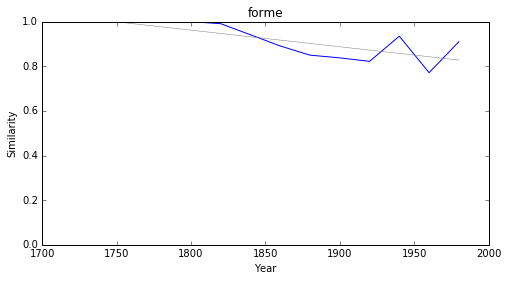

grandeur


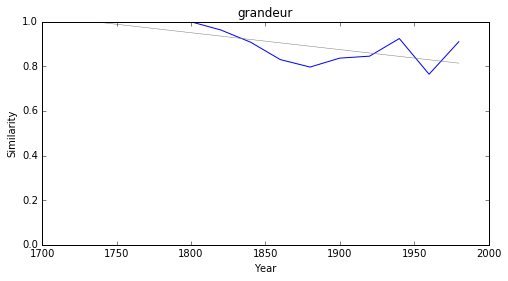

peuple


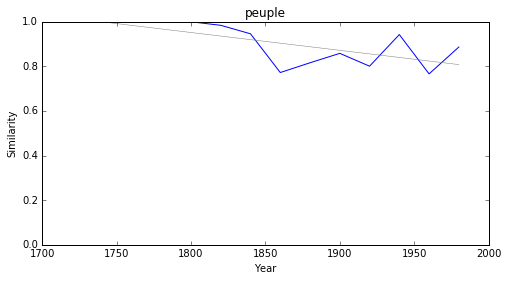

### <i><b>pouvoir</i></b>

        token     slope         p
107    savoir -0.000798  0.001342
195       mal -0.000847  0.005122
120    sentir -0.000949  0.000910
158    jamais -0.001012  0.000749
135   étonner -0.001013  0.000549
34   personne -0.001049  0.000211
105   souvent -0.001060  0.002151
89       rien -0.001082  0.000903
147     mieux -0.001117  0.001646
16       quoi -0.001128  0.000754



savoir


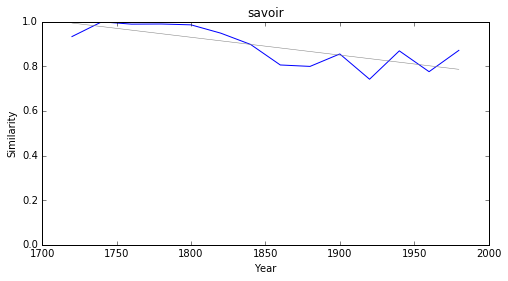

mal


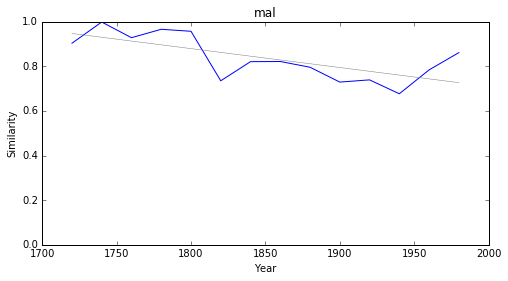

sentir


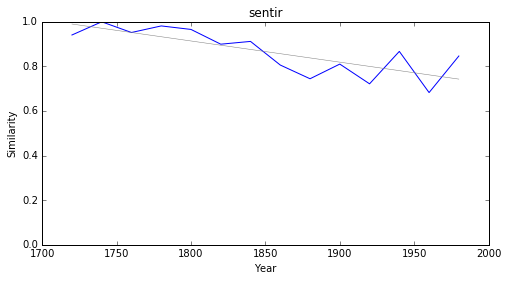

jamais


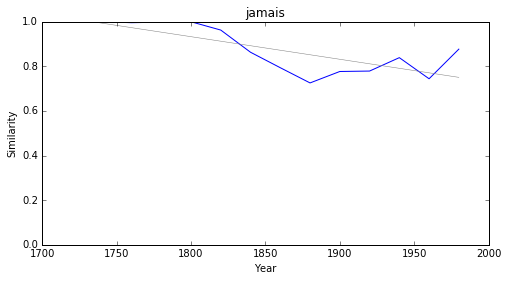

étonner


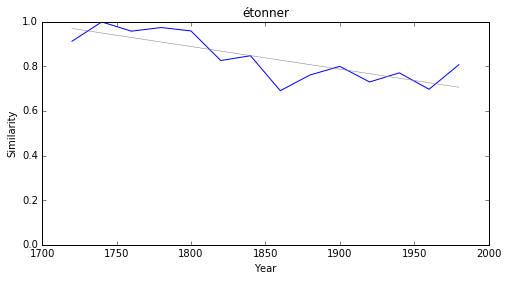

personne


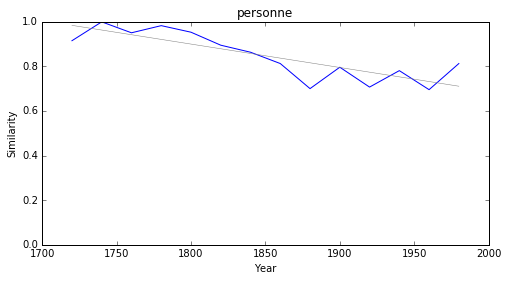

souvent


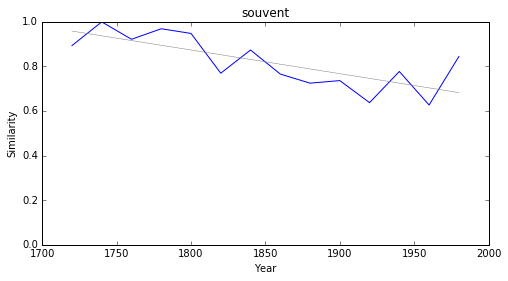

rien


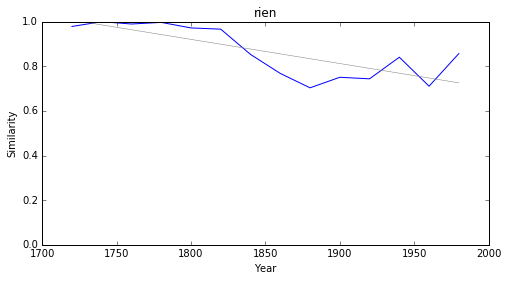

mieux


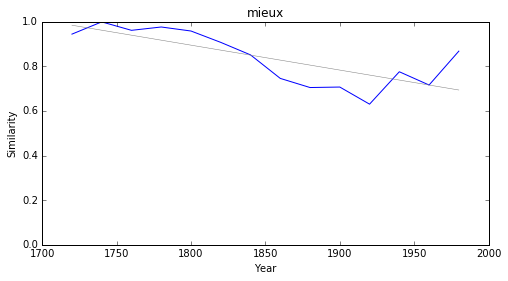

quoi


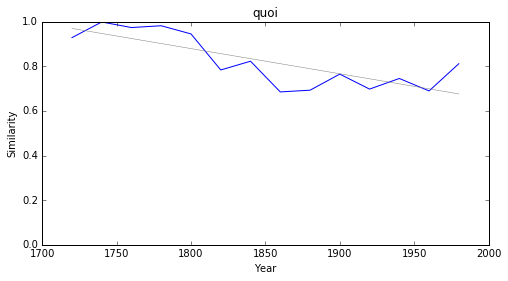

### <i><b>droit</i></b>

       token     slope         p
23    avenir -0.000300  0.009778
30  principe -0.000405  0.040424
29     vertu -0.000425  0.010405
69     genre -0.000439  0.043664
0    manière -0.000439  0.022579
47   intérêt -0.000440  0.046103
70    nature -0.000443  0.020718
24   bonheur -0.000451  0.020333
59      idée -0.000459  0.030283
14     sujet -0.000461  0.021079



avenir


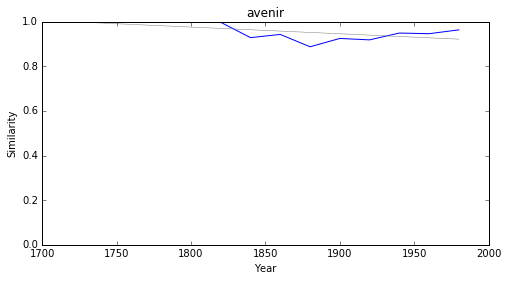

principe


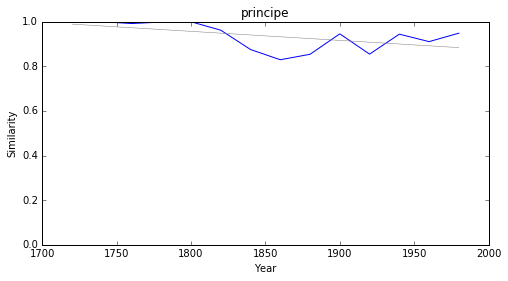

vertu


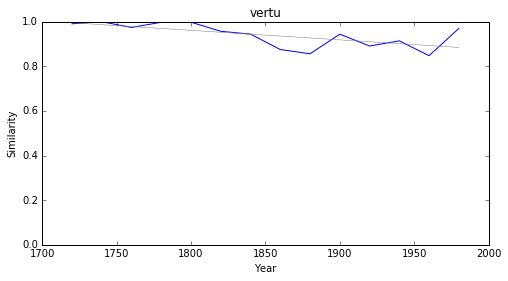

genre


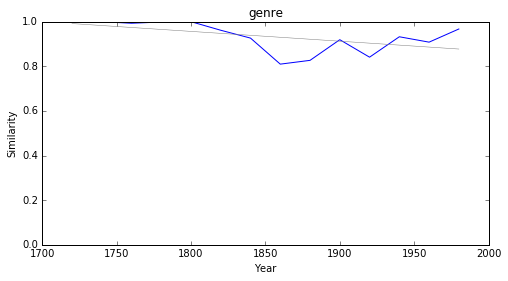

manière


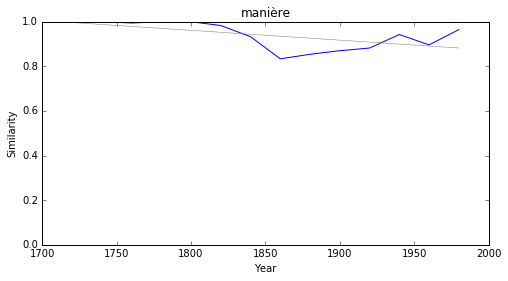

intérêt


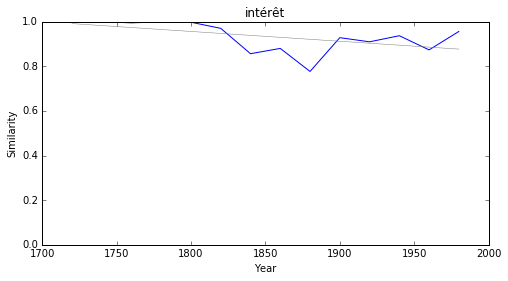

nature


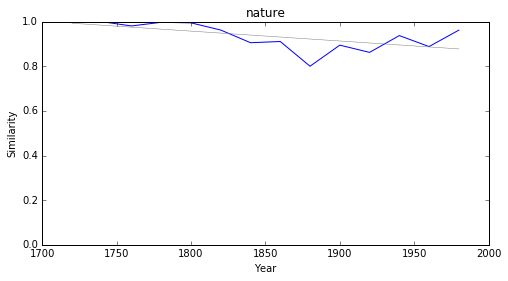

bonheur


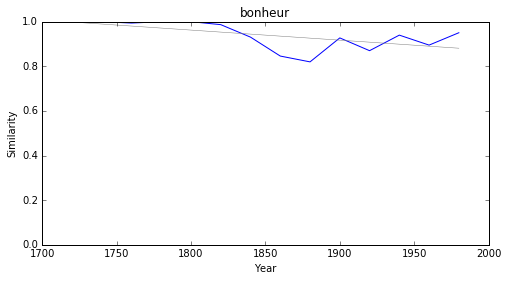

idée


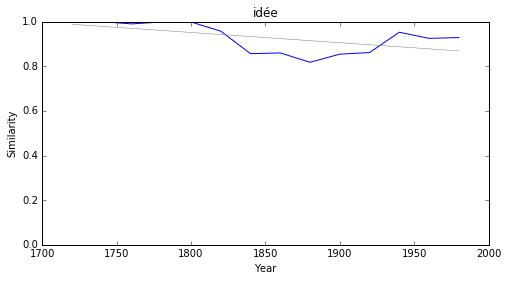

sujet


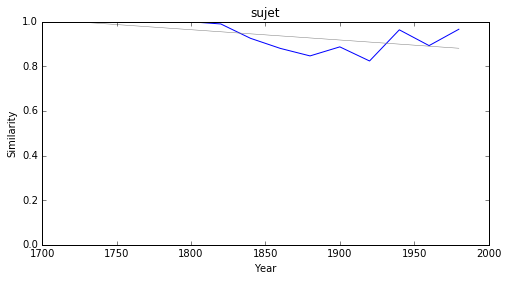

### <i><b>loi</i></b>

           token     slope         p
30      principe -0.000207  0.016692
46      religion -0.000240  0.036426
50        action -0.000258  0.019941
1        intérêt -0.000276  0.047473
15         moyen -0.000283  0.047555
39      grandeur -0.000292  0.044016
31       société -0.000301  0.001167
4        dignité -0.000349  0.028464
28  gouvernement -0.000356  0.005039
10       progrès -0.000358  0.018541



principe


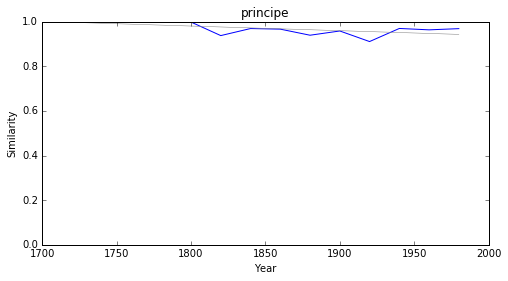

religion


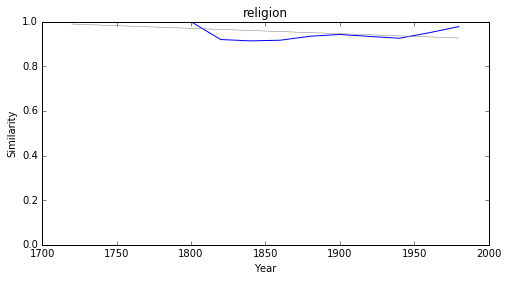

action


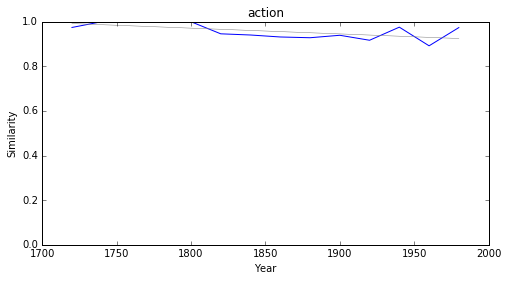

intérêt


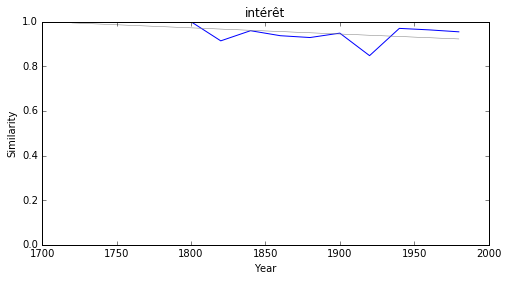

moyen


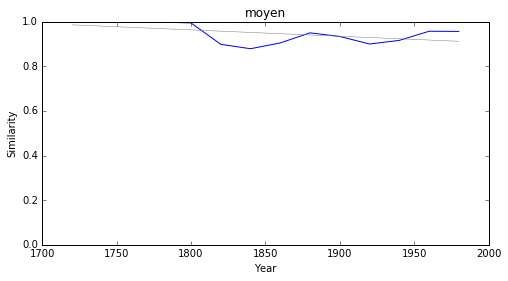

grandeur


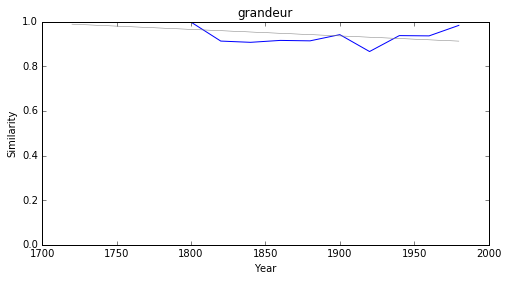

société


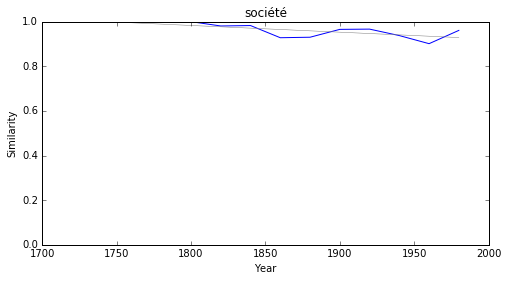

dignité


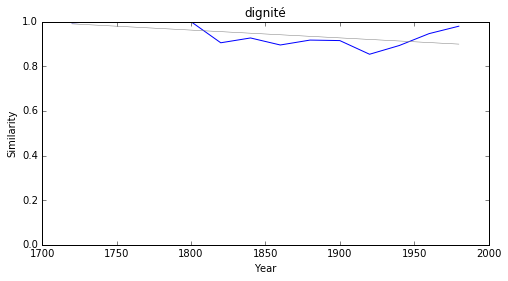

gouvernement


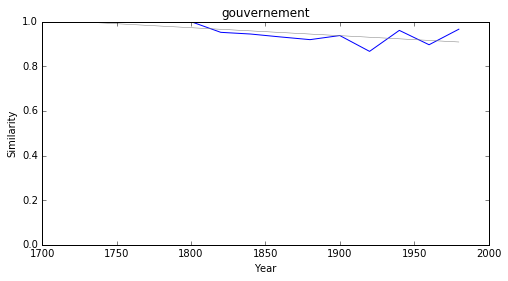

progrès


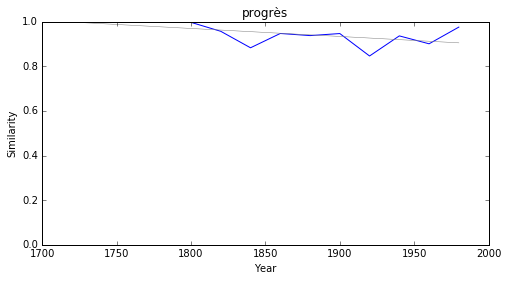

### <i><b>génie</i></b>

        token     slope         p
65  caractère -0.000273  0.023537
73     beauté -0.000293  0.017323
30      vertu -0.000297  0.022369
44    intérêt -0.000299  0.029190
72    qualité -0.000337  0.044257
31   principe -0.000341  0.010920
14    langage -0.000350  0.028150
51      moyen -0.000354  0.012222
55      objet -0.000382  0.021550
9     univers -0.000406  0.037509



caractère


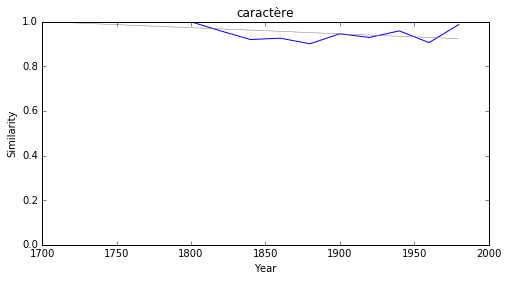

beauté


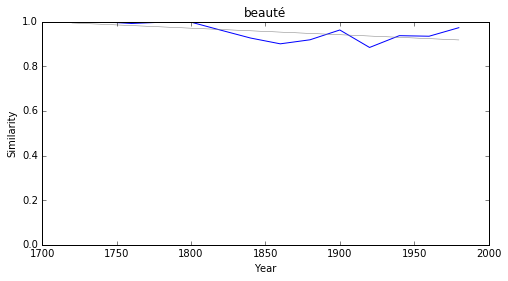

vertu


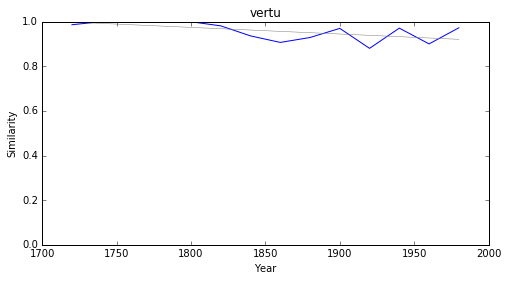

intérêt


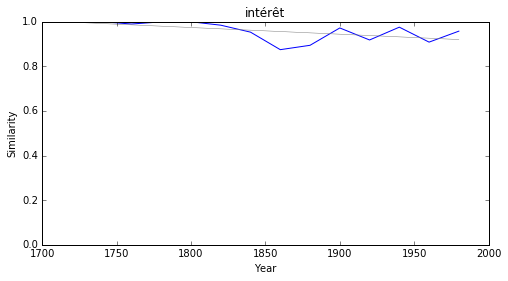

qualité


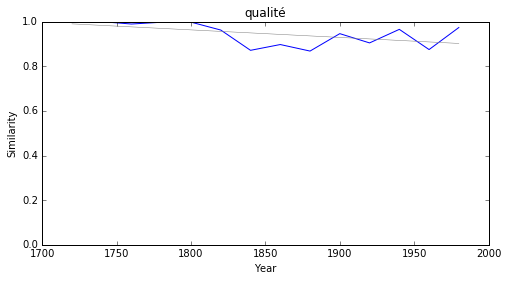

principe


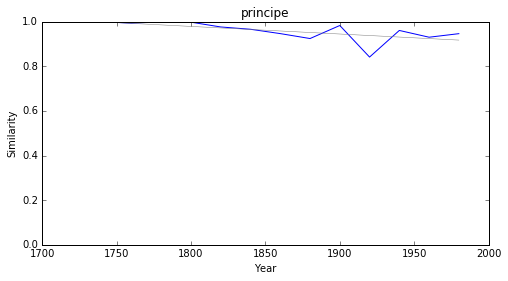

langage


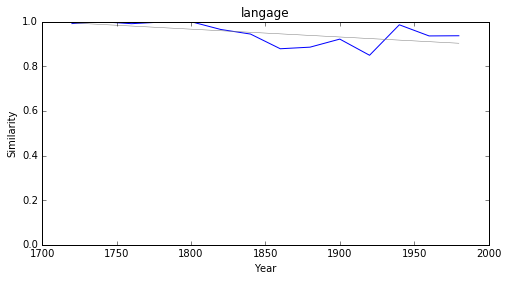

moyen


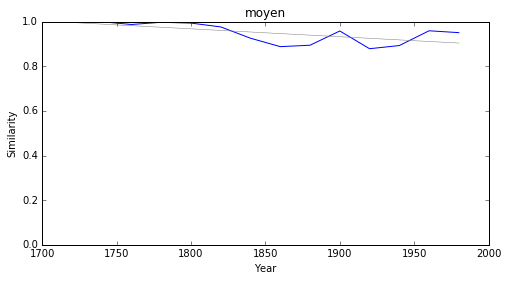

objet


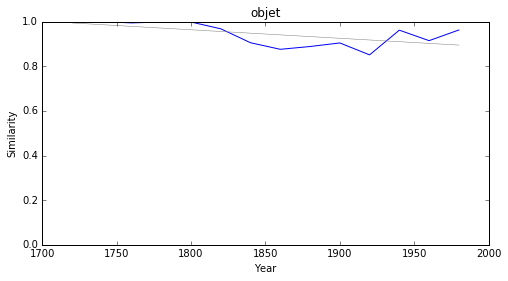

univers


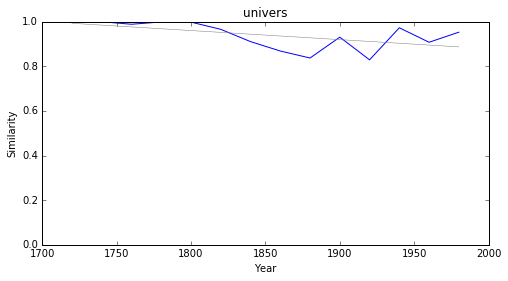

In [15]:
from IPython.display import Markdown, display

for word in testList :
    display(Markdown("### <i><b>"+word+"</i></b>"))
    df3 = pd.DataFrame(entries[word], columns=('token', 'slope', 'p'))
    print(df3.sort_values('slope', ascending=False).head(10))
    print('\n\n')
    
    for i, row in df3.sort_values('slope', ascending=False).head(10).iterrows():
        plot_cosine_series(word, row['token'], 8, 4)